## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

./camera_cal/calibration6.jpg


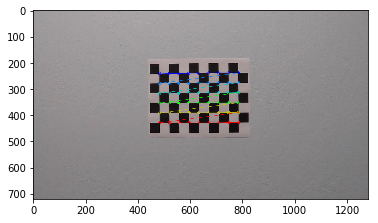

./camera_cal/calibration7.jpg


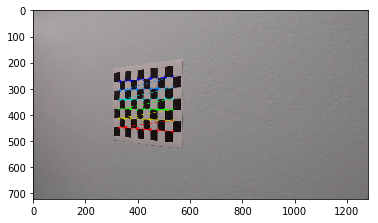

./camera_cal/calibration3.jpg


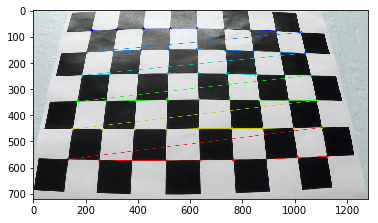

./camera_cal/calibration2.jpg


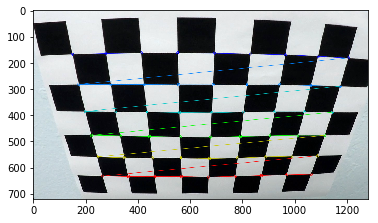

./camera_cal/calibration20.jpg


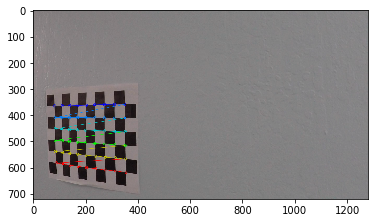

./camera_cal/calibration19.jpg


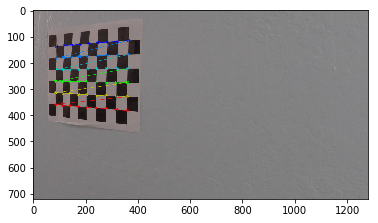

./camera_cal/calibration18.jpg


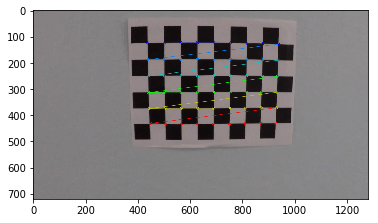

./camera_cal/calibration15.jpg


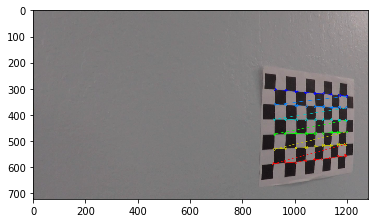

./camera_cal/calibration14.jpg


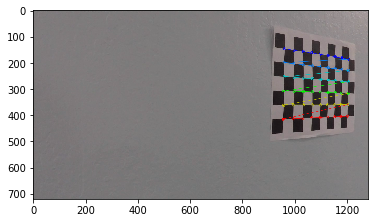

./camera_cal/calibration16.jpg


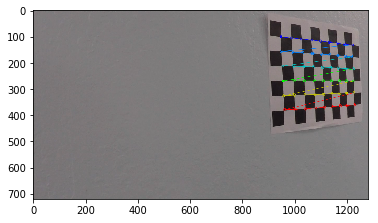

./camera_cal/calibration17.jpg


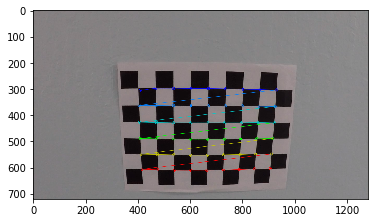

./camera_cal/calibration13.jpg


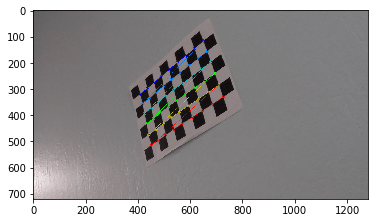

./camera_cal/calibration12.jpg


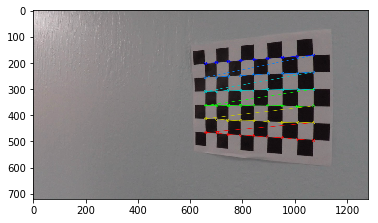

./camera_cal/calibration10.jpg


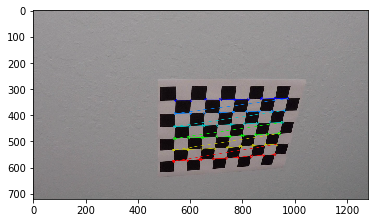

./camera_cal/calibration11.jpg


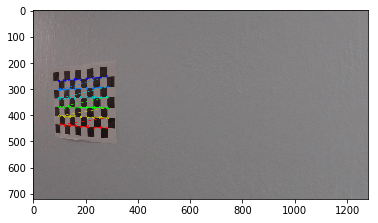

./camera_cal/calibration9.jpg


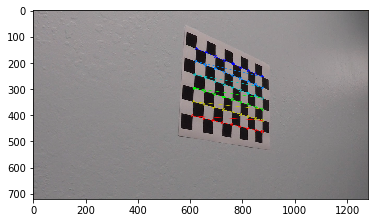

./camera_cal/calibration8.jpg


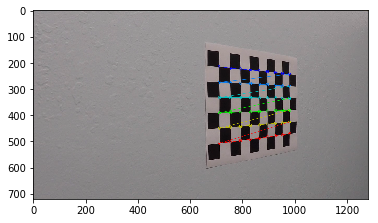

dict_keys([2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [64]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

imgs={}

# Step through the list and search for chessboard corners
for i,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgsIn=[]



    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

        print(fname)
        plt.imshow(img)
        imgsIn.append(img)
        imgsIn.append(objp)
        imgsIn.append(corners)
   
        imgs[i]=imgsIn
        
        plt.show()
        

        
                
print(imgs.keys())




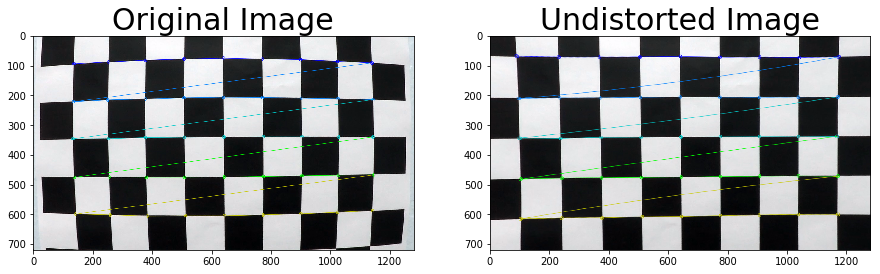

In [11]:
readImg2 = glob.glob('./camera_cal/calibration1.jpg')
unDistImg = cv2.imread('./camera_cal/calibration1.jpg')

def cal_undistort(img,objponts):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,5),None)#here 9,5 is used because only 9,5 are visiable

    img=cv2.drawChessboardCorners(img,(9,5),corners,ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1],None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    return dst,mtx,dist

undist,mtx,dist = cal_undistort(unDistImg, objpoints)

# Visualize undistortion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.imshow(unDistImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

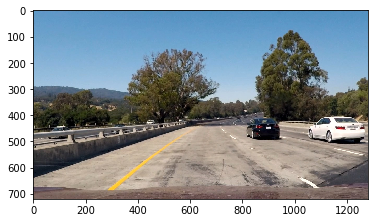

In [12]:
exampleImg=mpimg.imread('./test_images/test1.jpg')
plt.imshow(exampleImg)
plt.show()

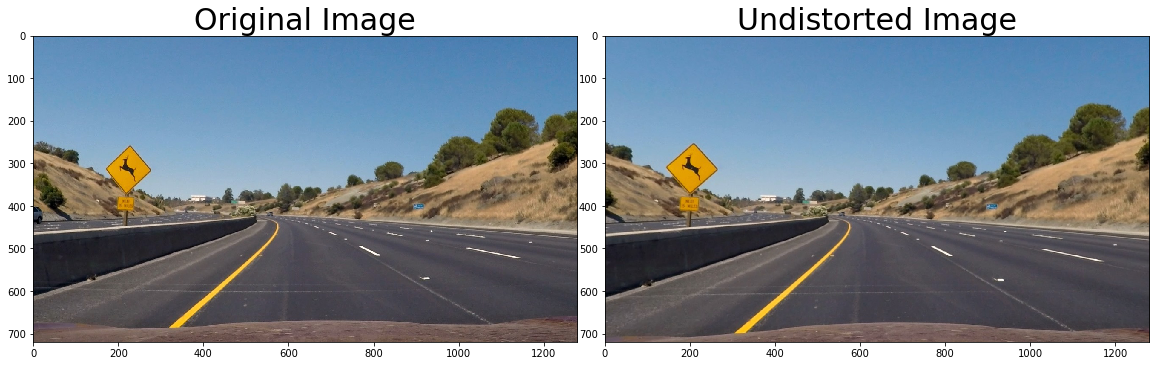

In [65]:
def undistort(img,mtx=mtx, dist=dist):

    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

exampleImg_undistort = undistort(exampleImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(exampleImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

In [67]:
def unWarpedImg(img,src,dst):
    M = cv2.getPerspectiveTransform(src, dst)

    Minv = cv2.getPerspectiveTransform(dst, src)

    warped=cv2.warpPerspective(img,M,img.shape[1::-1],flags=cv2.INTER_LINEAR)
    return warped,M,Minv







[580.0, 250.0, 1105.0, 745.0, 580.0]
[464.0, 682.0, 682.0, 464.0, 464.0]


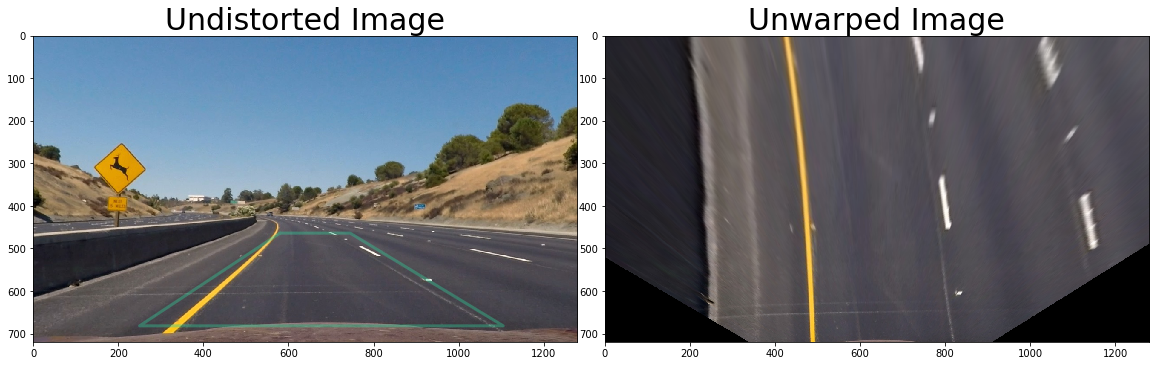

In [68]:
src = np.float32([(580,464),
                  (745,464), 
                  (250,682), 
                  (1105,682)])
dst = np.float32([(450,0),
                  (830,0),
                  (450,720),
                  (830,720)])
exampleImg_unwarp, M, Minv = unWarpedImg(exampleImg_undistort, src, dst)

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_undistort)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
print(x)
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
print(y)
ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)

ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(exampleImg_unwarp)
ax2.set_title('Unwarped Image', fontsize=30)
plt.show()


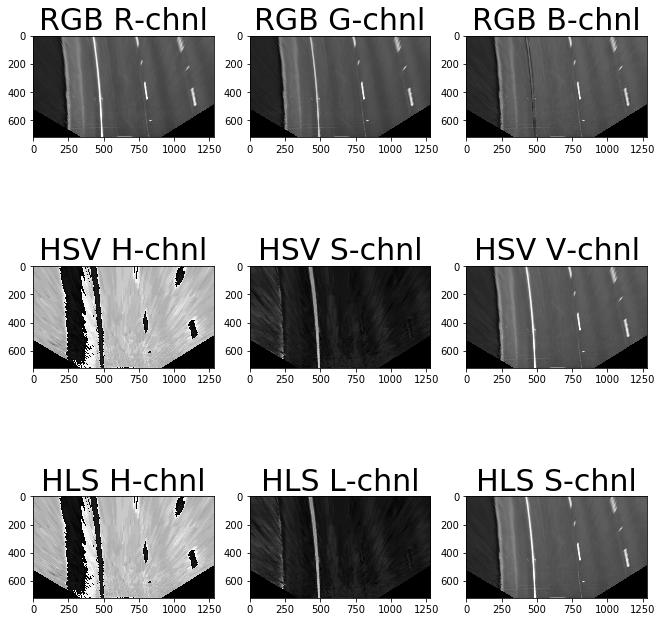

In [69]:
exampleImg_unwarp_R = exampleImg_unwarp[:,:,0]
exampleImg_unwarp_G = exampleImg_unwarp[:,:,1]
exampleImg_unwarp_B = exampleImg_unwarp[:,:,2]

exampleImg_unwarp_HSV = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HSV)
exampleImg_unwarp_H = exampleImg_unwarp_HSV[:,:,0]
exampleImg_unwarp_S = exampleImg_unwarp_HSV[:,:,1]
exampleImg_unwarp_V = exampleImg_unwarp_HSV[:,:,2]

exampleImg_unwarp_HLS = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HLS)
exampleImg_unwarp_h = exampleImg_unwarp_HSV[:,:,0]
exampleImg_unwarp_l = exampleImg_unwarp_HSV[:,:,1]
exampleImg_unwarp_s = exampleImg_unwarp_HSV[:,:,2]

# fig,axs=plt.subplot(1,0,figsize=(11,11))
# axs=axs.ravel()
fig, axs = plt.subplots(3,3, figsize=(11, 12))
# fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(exampleImg_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-chnl', fontsize=30)
axs[1].imshow(exampleImg_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-chnl', fontsize=30)
axs[2].imshow(exampleImg_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-chnl', fontsize=30)

axs[3].imshow(exampleImg_unwarp_H, cmap='gray')
axs[3].set_title('HSV H-chnl', fontsize=30)
axs[4].imshow(exampleImg_unwarp_S, cmap='gray')
axs[4].set_title('HSV S-chnl', fontsize=30)
axs[5].imshow(exampleImg_unwarp_V, cmap='gray')
axs[5].set_title('HSV V-chnl', fontsize=30)

axs[6].imshow(exampleImg_unwarp_h, cmap='gray')
axs[6].set_title('HLS H-chnl', fontsize=30)
axs[7].imshow(exampleImg_unwarp_l, cmap='gray')
axs[7].set_title('HLS L-chnl', fontsize=30)
axs[8].imshow(exampleImg_unwarp_s, cmap='gray')
axs[8].set_title('HLS S-chnl', fontsize=30)

plt.show()




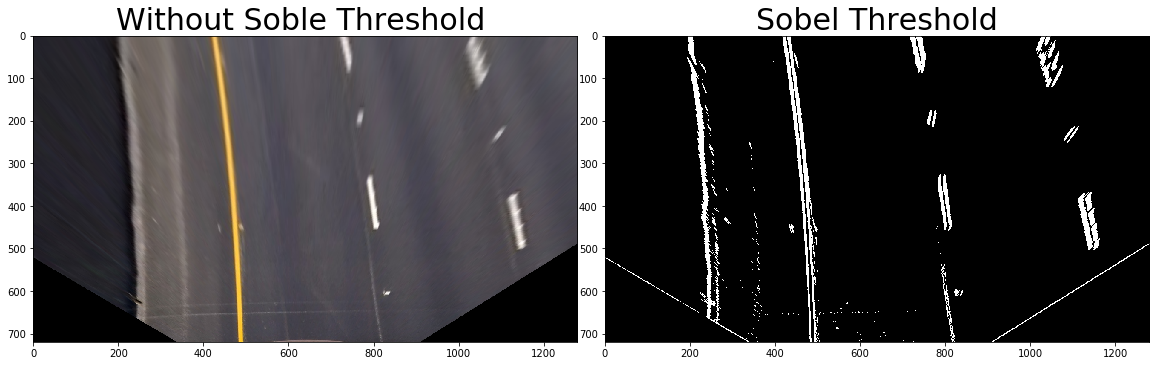

In [70]:
def abs_sobel_threshold(img,orient='x',thresh_min=0,thresh_max=255):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient=='x':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0))
    if orient=='y':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1))
    scaled_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=thresh_min) & (scaled_sobel<=thresh_max) ]=1
    return binary_output

sobelOperaterImg=abs_sobel_threshold(exampleImg_unwarp,orient='x',thresh_min=15,thresh_max=255)
# sobelOperaterImg=abs_sobel_threshold(exampleImg_unwarp,orient='y',thresh_min=5,thresh_max=25)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Without Soble Threshold ', fontsize=30)
ax2.imshow(sobelOperaterImg,cmap='gray')
ax2.set_title('Sobel Threshold', fontsize=30)
plt.show()



In [71]:
def mag_thresh(img,sobel_kernel=3,mag_thresh=(0,255),greyBool=True):
    if(greyBool):
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
        sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    else:
        sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=sobel_kernel)
        sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=sobel_kernel) 
    
    gradmag=np.sqrt(sobelx**2,sobely**2)
    scale_factor=np.max(gradmag)/255
    
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag>=mag_thresh[0])&(gradmag<=mag_thresh[1])]=1
    
    return binary_output


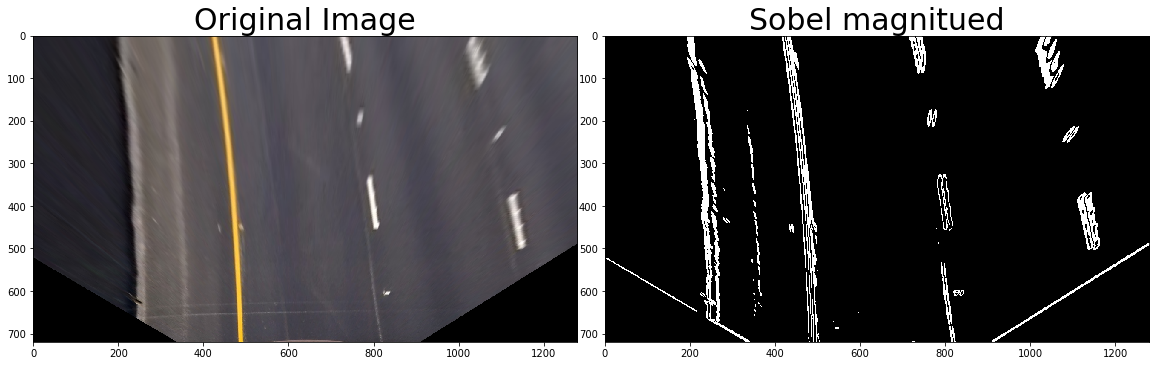

In [72]:
mag_thresh_val=mag_thresh(exampleImg_unwarp,sobel_kernel=15, mag_thresh=(20, 105))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(mag_thresh_val,cmap='gray')
ax2.set_title('Sobel magnitued', fontsize=30)
plt.show()


In [73]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.absolute(absgraddir)

    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

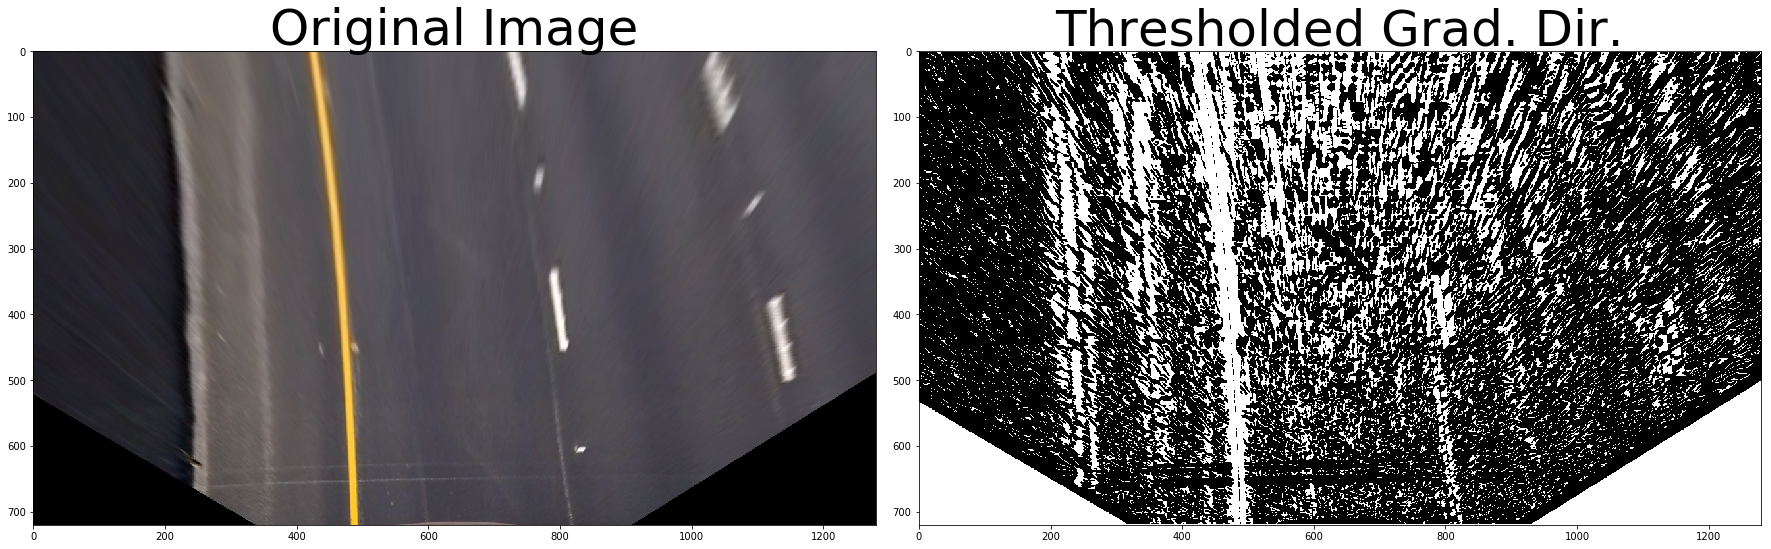

In [76]:
# dir_binary = dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=((np.pi)/40,(np.pi)/1.5))
dir_binary = dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=(-5, .21))


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


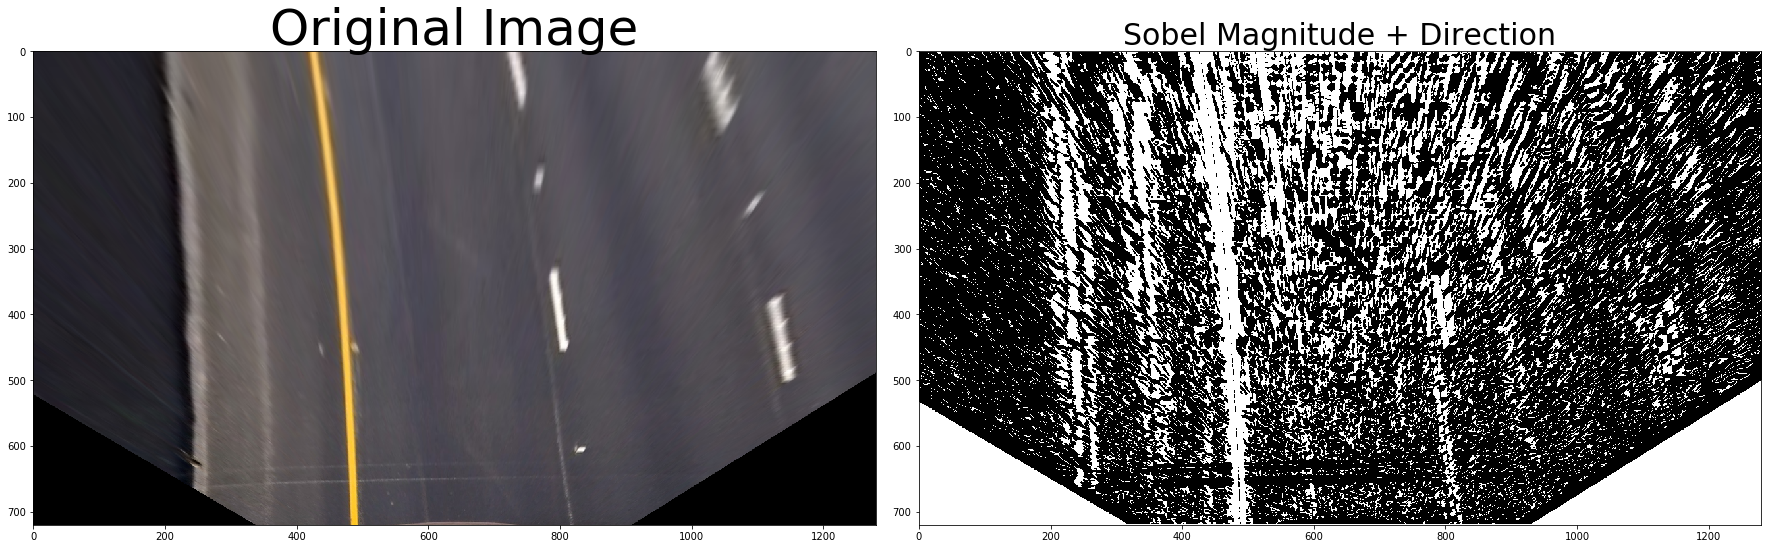

In [77]:
def comb(exampleImg_unwarp,greyBool=True):
    exampleImg_sobelMag=mag_thresh(exampleImg_unwarp,sobel_kernel=3, mag_thresh=(30, 100),greyBool=greyBool)
    exampleImg_sobelDir= dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=(-8, .1))
    sobelAbsoluteImgx=abs_sobel_threshold(exampleImg_unwarp,orient='x',thresh_min=20,thresh_max=200)
    sobelAbsoluteImgy=abs_sobel_threshold(exampleImg_unwarp,orient='y',thresh_min=5,thresh_max=200)



    combined = np.zeros_like(exampleImg_sobelMag)
    combined[((exampleImg_sobelMag == 1) & (exampleImg_sobelDir == 1)) | ((sobelAbsoluteImgx == 1) & (sobelAbsoluteImgy == 1))] = 1
    return combined
    # Visualize sobel magnitude + direction threshold

comb(exampleImg_unwarp,greyBool=True)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Sobel Magnitude + Direction', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

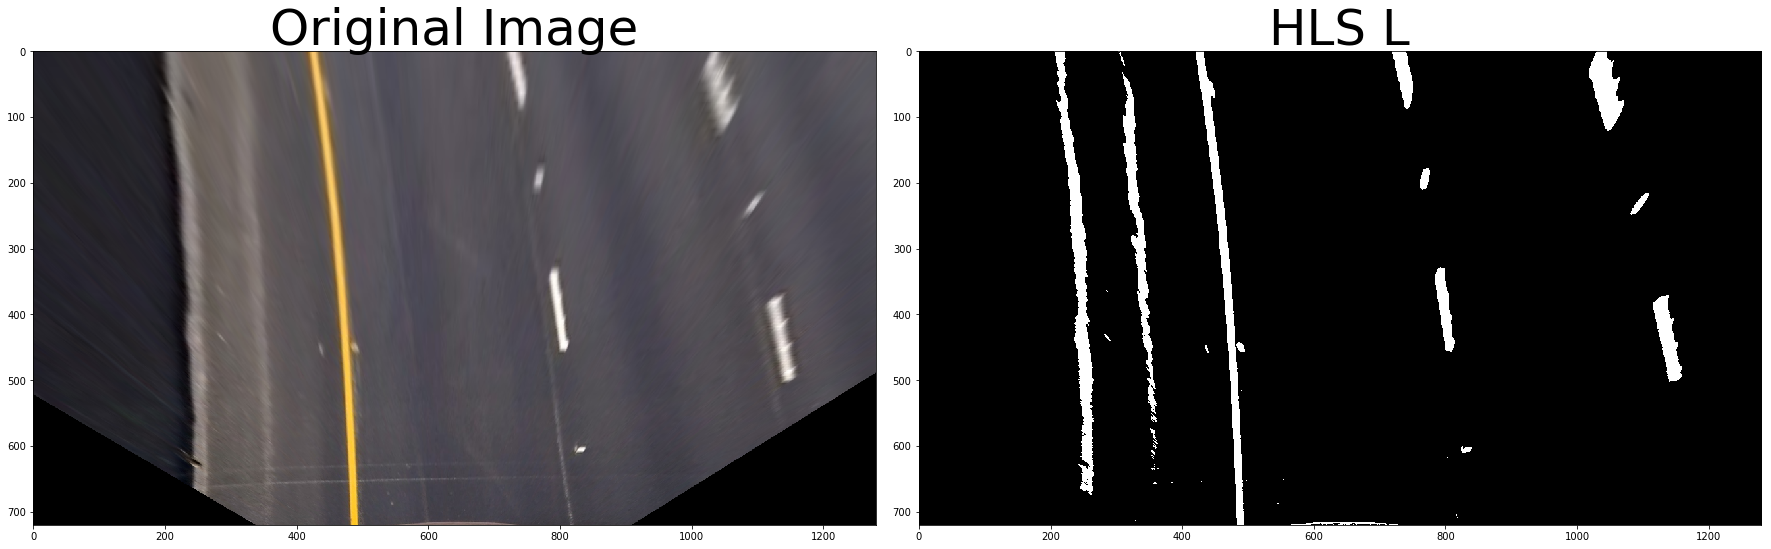

In [78]:

def hls_selectL(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,1]
    l_channel = hls_l*(255/np.max(hls_l))


    binary_output = np.zeros_like(l_channel)
    binary_output[(l_channel > thresh[0]) & (l_channel <= thresh[1])] = 1
    return binary_output
    
    
hls_binary = hls_selectL(exampleImg_unwarp, thresh=(120, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('HLS L', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

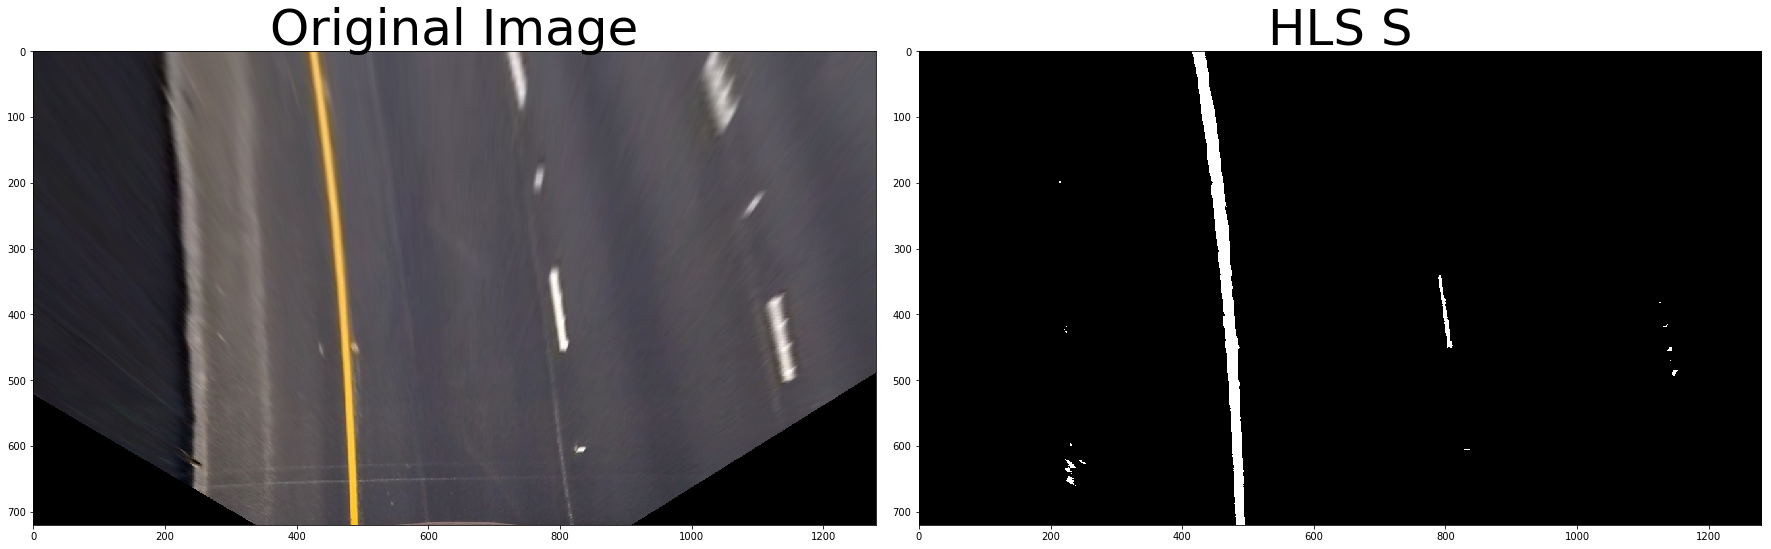

In [79]:
def hls_selectS(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,2]
    l_channel = hls_l*(255/np.max(hls_l))


    binary_output = np.zeros_like(l_channel)
    binary_output[(l_channel > thresh[0]) & (l_channel <= thresh[1])] = 1
    return binary_output
    
    
hls_binary = hls_selectS(exampleImg_unwarp, thresh=(90, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('HLS S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [80]:

def pipeline(img):
    img = np.copy(img)
    img_undistort = undistort(img)
    img_unwarp, M, Minv = unWarpedImg(img_undistort, src, dst)
    # Convert to HLS color space and separate the V channel
    sobelOperaterImg=abs_sobel_threshold(img_unwarp,orient='x',thresh_min=20,thresh_max=100)    
    print(sobelOperaterImg.shape)
    # Threshold color channel
#     hls_binary = hls_selectS(img_unwarp, thresh=(90, 255))
    hls_select_L = hls_selectL(img_unwarp, thresh=(90, 255))


    hls_binary_s = hls_selectS(img_unwarp, thresh=(90, 255))


    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sobelOperaterImg), sobelOperaterImg, hls_binary)) * 255
    combined = np.zeros_like(sobelOperaterImg)
    combined[ (hls_binary_s == 1)  & (hls_select_L == 1)] = 1
    return combined,Minv

['./test_images/test6.jpg', './test_images/test5.jpg', './test_images/test4.jpg', './test_images/test1.jpg', './test_images/test3.jpg', './test_images/test2.jpg', './test_images/straight_lines2.jpg', './test_images/straight_lines1.jpg']
./test_images/test6.jpg
(720, 1280)
./test_images/test5.jpg
(720, 1280)
./test_images/test4.jpg
(720, 1280)
./test_images/test1.jpg
(720, 1280)
./test_images/test3.jpg
(720, 1280)
./test_images/test2.jpg
(720, 1280)
./test_images/straight_lines2.jpg
(720, 1280)
./test_images/straight_lines1.jpg
(720, 1280)


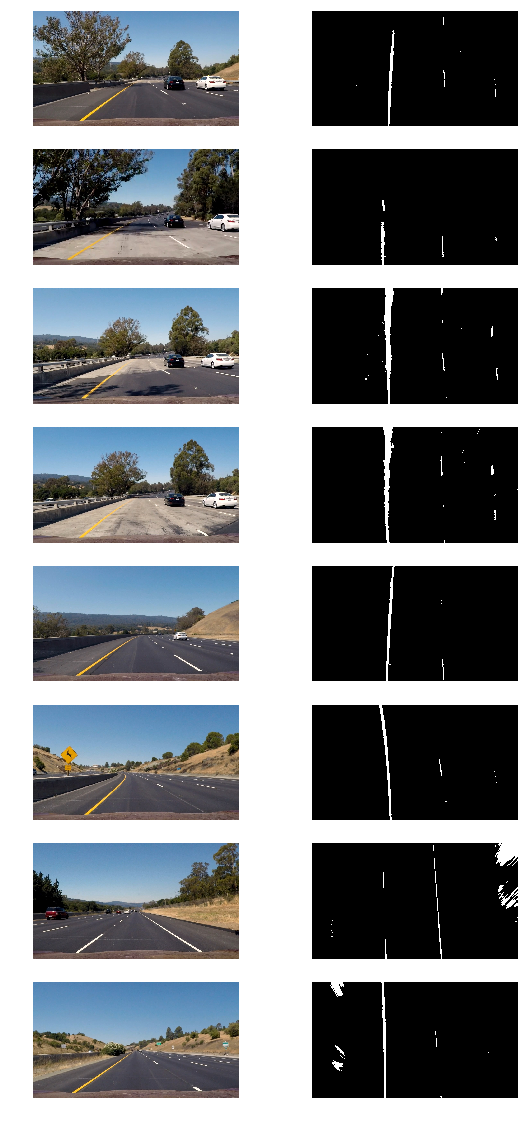

In [81]:
images = glob.glob('./test_images/*.jpg')
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
print(images)
i = 0
for image in images:
    print(image)
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bin, Minv = pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1

plt.show()



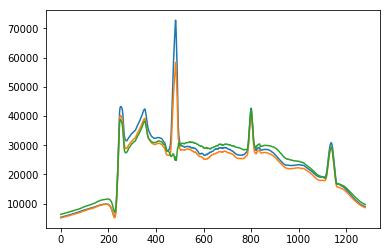

In [82]:
import numpy as np
histogram = np.sum(exampleImg_unwarp[exampleImg_unwarp.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.show()

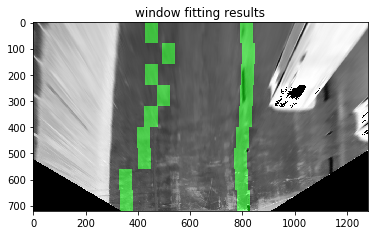

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
img = exampleImg_unwarp
warped = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(image[int(3*image.shape[0]/4):,:int(image.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(image[int(3*image.shape[0]/4):,int(image.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(image.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,image.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,image.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
	    # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
	    l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
	    r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
	    # Add graphic points from window mask here to total pixels found 
	    l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
	    r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage= np.dstack((warped, warped, warped))*255 # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()


In [85]:
# Define method to fit polynomial to binary image with lines extracted, using sliding window
def sliding_window_polyfit(img):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
    print('base pts:', leftx_base, rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data


In [115]:
# # Create an image to draw on and an image to show the selection window
# out_img = np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255
# window_img = np.zeros_like(out_img)
# # Color in left and right line pixels
# out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
# out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# # Generate a polygon to illustrate the search window area
# # And recast the x and y points into usable format for cv2.fillPoly()
# left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
# left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
#                               ploty])))])
# left_line_pts = np.hstack((left_line_window1, left_line_window2))
# right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
# right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
#                               ploty])))])
# right_line_pts = np.hstack((right_line_window1, right_line_window2))

# # Draw the lane onto the warped blank image
# cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
# cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
# result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
# plt.imshow(result)
# plt.plot(left_fitx, ploty, color='yellow')
# plt.plot(right_fitx, ploty, color='RED')
# plt.xlim(0, 1280)
# plt.ylim(720, 0)
# plt.show()

(720, 1280)
base pts: 482 799


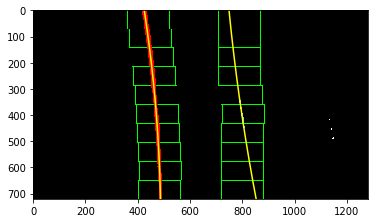

In [91]:
exampleImg = cv2.imread('./test_images/test2.jpg')
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
exampleImg_bin, Minv = pipeline(exampleImg)
    
left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_polyfit(exampleImg_bin)

h = exampleImg.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
#print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg_bin.shape[0]-1, exampleImg_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = exampleImg_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()


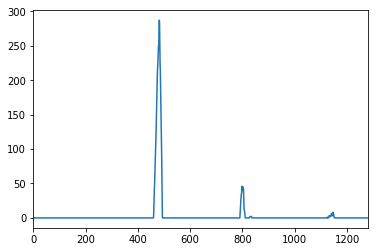

...


In [33]:
plt.plot(histogram)
plt.xlim(0, 1280)
plt.show()


In [113]:
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds


(720, 1280)


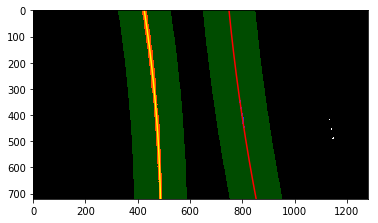

In [114]:
# visualize the result on example image
exampleImg2 = cv2.imread('./test_images/test2.jpg')
exampleImg2 = cv2.cvtColor(exampleImg2, cv2.COLOR_BGR2RGB)
exampleImg2_bin, Minv = pipeline(exampleImg2)   
margin = 100

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = polyfit_using_prev_fit(exampleImg2_bin, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg2_bin.shape[0]-1, exampleImg2_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

# Create an image to draw on and an image to show the selection window
out_img = np.uint8(np.dstack((exampleImg2_bin, exampleImg2_bin, exampleImg2_bin))*255)
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
nonzero = exampleImg2_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area (OLD FIT)
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='RED')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()


In [97]:
def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist


In [98]:
rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(exampleImg_bin, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example:', rad_l, 'm,', rad_r, 'm')
print('Distance from lane center for example:', d_center, 'm')

Radius of curvature for example: 510.162922529 m, 743.532898579 m
Distance from lane center for example: -0.292401631086 m


In [104]:
def draw_lane(original_img, binary_img, l_fit, r_fit, Minv):
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result


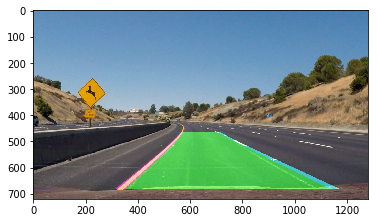

In [105]:
exampleImg_out1 = draw_lane(exampleImg, exampleImg_bin, left_fit, right_fit, Minv)
plt.imshow(exampleImg_out1)
plt.show()


In [106]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img


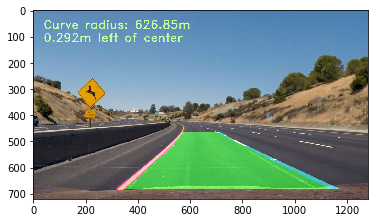

...


In [102]:
exampleImg_out2 = draw_data(exampleImg_out1, (rad_l+rad_r)/2, d_center)
plt.imshow(exampleImg_out2)
plt.show()


In [107]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


            



In [110]:
def process_image(img):
    new_img = np.copy(img)
    img_bin, Minv = pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, _ = sliding_window_polyfit(img_bin)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = polyfit_using_prev_fit(img_bin, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(350 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_lane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(img_bin, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds)
        img_out = draw_data(img_out1, (rad_l+rad_r)/2, d_center)
    else:
        img_out = new_img
    
    diagnostic_output = False
    if diagnostic_output:
        # put together multi-view output
        diag_img = np.zeros((720,1280,3), dtype=np.uint8)
        
        # original output (top left)
        diag_img[0:360,0:640,:] = cv2.resize(img_out,(640,360))
        
        # binary overhead view (top right)
        img_bin = np.dstack((img_bin*255, img_bin*255, img_bin*255))
        resized_img_bin = cv2.resize(img_bin,(640,360))
        diag_img[0:360,640:1280, :] = resized_img_bin
        
        # overhead with all fits added (bottom right)
        img_bin_fit = np.copy(img_bin)
        for i, fit in enumerate(l_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (20*i+100,0,20*i+100))
        for i, fit in enumerate(r_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (0,20*i+100,20*i+100))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, l_line.best_fit, (255,255,0))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, r_line.best_fit, (255,255,0))
        diag_img[360:720,640:1280,:] = cv2.resize(img_bin_fit,(640,360))
        
        # diagnostic data (bottom left)
        color_ok = (200,255,155)
        color_bad = (255,155,155)
        font = cv2.FONT_HERSHEY_DUPLEX
        if l_fit is not None:
            text = 'This fit L: ' + ' {:0.6f}'.format(l_fit[0]) +' {:0.6f}'.format(l_fit[1]) +' {:0.6f}'.format(l_fit[2])
        else:
            text = 'This fit L: None'
        cv2.putText(diag_img, text, (40,380), font, .5, color_ok, 1, cv2.LINE_AA)
        if r_fit is not None:
            text = 'This fit R: ' + ' {:0.6f}'.format(r_fit[0]) +' {:0.6f}'.format(r_fit[1]) +' {:0.6f}'.format(r_fit[2])
        else:
            text = 'This fit R: None'
        cv2.putText(diag_img, text, (40,400), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit L: ' + ' {:0.6f}'.format(l_line.best_fit[0]) + ' {:0.6f}'.format(l_line.best_fit[1]) + ' {:0.6f}'.format(l_line.best_fit[2])
        cv2.putText(diag_img, text, (40,440), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit R: ' + ' {:0.6f}'.format(r_line.best_fit[0]) + ' {:0.6f}'.format(r_line.best_fit[1]) +' {:0.6f}'.format(r_line.best_fit[2])
        cv2.putText(diag_img, text, (40,460), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Diffs L: ' + ' {:0.6f}'.format(l_line.diffs[0]) +' {:0.6f}'.format(l_line.diffs[1]) +' {:0.6f}'.format(l_line.diffs[2])
        if l_line.diffs[0] > 0.001 or l_line.diffs[1] > 1.0 or l_line.diffs[2] > 100.:diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,500), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Diffs R: ' + ' {:0.6f}'.format(r_line.diffs[0]) +' {:0.6f}'.format(r_line.diffs[1]) + ' {:0.6f}'.format(r_line.diffs[2])
        if r_line.diffs[0] > 0.001 or r_line.diffs[1] > 1.0 or r_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,520), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Good fit count L:' + str(len(l_line.current_fit))
        cv2.putText(diag_img, text, (40,560), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Good fit count R:' + str(len(r_line.current_fit))
        cv2.putText(diag_img, text, (40,580), font, .5, color_ok, 1, cv2.LINE_AA)
        
        img_out = diag_img
    return img_out


In [111]:
def plot_fit_onto_img(img, fit, plot_color):
    if fit is None:
        return img
    new_img = np.copy(img)
    h = new_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    plotx = fit[0]*ploty**2 + fit[1]*ploty + fit[2]
    pts = np.array([np.transpose(np.vstack([plotx, ploty]))])
    cv2.polylines(new_img, np.int32([pts]), isClosed=False, color=plot_color, thickness=8)
    return new_img


In [112]:
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

(720, 1280)
base pts: 476 822
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


  0%|          | 1/1261 [00:00<06:12,  3.38it/s]

(720, 1280)


  0%|          | 2/1261 [00:00<06:11,  3.39it/s]

(720, 1280)


  0%|          | 3/1261 [00:00<06:13,  3.36it/s]

(720, 1280)


  0%|          | 4/1261 [00:01<06:13,  3.36it/s]

(720, 1280)


  0%|          | 5/1261 [00:01<06:11,  3.38it/s]

(720, 1280)


  0%|          | 6/1261 [00:01<06:15,  3.34it/s]

(720, 1280)


  1%|          | 7/1261 [00:02<06:13,  3.36it/s]

(720, 1280)


  1%|          | 8/1261 [00:02<06:22,  3.28it/s]

(720, 1280)


  1%|          | 9/1261 [00:02<06:38,  3.14it/s]

(720, 1280)


  1%|          | 10/1261 [00:03<06:31,  3.20it/s]

(720, 1280)


  1%|          | 11/1261 [00:03<06:33,  3.18it/s]

(720, 1280)


  1%|          | 12/1261 [00:03<06:24,  3.24it/s]

(720, 1280)


  1%|          | 13/1261 [00:03<06:19,  3.29it/s]

(720, 1280)


  1%|          | 14/1261 [00:04<06:18,  3.29it/s]

(720, 1280)


  1%|          | 15/1261 [00:04<06:18,  3.29it/s]

(720, 1280)


  1%|▏         | 16/1261 [00:04<06:17,  3.30it/s]

(720, 1280)


  1%|▏         | 17/1261 [00:05<06:17,  3.30it/s]

(720, 1280)


  1%|▏         | 18/1261 [00:05<06:16,  3.31it/s]

(720, 1280)


  2%|▏         | 19/1261 [00:05<06:11,  3.34it/s]

(720, 1280)


  2%|▏         | 20/1261 [00:06<06:32,  3.16it/s]

(720, 1280)


  2%|▏         | 21/1261 [00:06<06:58,  2.96it/s]

(720, 1280)


  2%|▏         | 22/1261 [00:06<07:05,  2.91it/s]

(720, 1280)


  2%|▏         | 23/1261 [00:07<07:20,  2.81it/s]

(720, 1280)


  2%|▏         | 24/1261 [00:07<07:33,  2.73it/s]

(720, 1280)


  2%|▏         | 25/1261 [00:07<07:18,  2.82it/s]

(720, 1280)


  2%|▏         | 26/1261 [00:08<06:55,  2.97it/s]

(720, 1280)


  2%|▏         | 27/1261 [00:08<06:49,  3.01it/s]

(720, 1280)


  2%|▏         | 28/1261 [00:08<06:34,  3.13it/s]

(720, 1280)


  2%|▏         | 29/1261 [00:09<06:24,  3.20it/s]

(720, 1280)


  2%|▏         | 30/1261 [00:09<06:16,  3.27it/s]

(720, 1280)


  2%|▏         | 31/1261 [00:09<06:10,  3.32it/s]

(720, 1280)


  3%|▎         | 32/1261 [00:10<06:03,  3.38it/s]

(720, 1280)


  3%|▎         | 33/1261 [00:10<06:07,  3.34it/s]

(720, 1280)


  3%|▎         | 34/1261 [00:10<06:35,  3.10it/s]

(720, 1280)


  3%|▎         | 35/1261 [00:11<06:47,  3.01it/s]

(720, 1280)


  3%|▎         | 36/1261 [00:11<06:38,  3.07it/s]

(720, 1280)


  3%|▎         | 37/1261 [00:11<06:36,  3.09it/s]

(720, 1280)


  3%|▎         | 38/1261 [00:12<06:44,  3.03it/s]

(720, 1280)


  3%|▎         | 39/1261 [00:12<06:32,  3.11it/s]

(720, 1280)


  3%|▎         | 40/1261 [00:12<06:31,  3.12it/s]

(720, 1280)


  3%|▎         | 41/1261 [00:12<06:26,  3.16it/s]

(720, 1280)


  3%|▎         | 42/1261 [00:13<06:17,  3.23it/s]

(720, 1280)


  3%|▎         | 43/1261 [00:13<06:29,  3.13it/s]

(720, 1280)


  3%|▎         | 44/1261 [00:13<06:27,  3.14it/s]

(720, 1280)


  4%|▎         | 45/1261 [00:14<06:22,  3.18it/s]

(720, 1280)


  4%|▎         | 46/1261 [00:14<06:19,  3.20it/s]

(720, 1280)


  4%|▎         | 47/1261 [00:14<06:42,  3.01it/s]

(720, 1280)


  4%|▍         | 48/1261 [00:15<06:39,  3.04it/s]

(720, 1280)


  4%|▍         | 49/1261 [00:15<06:29,  3.11it/s]

(720, 1280)


  4%|▍         | 50/1261 [00:15<06:30,  3.10it/s]

(720, 1280)


  4%|▍         | 51/1261 [00:16<06:29,  3.10it/s]

(720, 1280)


  4%|▍         | 52/1261 [00:16<06:22,  3.16it/s]

(720, 1280)


  4%|▍         | 53/1261 [00:16<06:17,  3.20it/s]

(720, 1280)


  4%|▍         | 54/1261 [00:17<06:15,  3.21it/s]

(720, 1280)


  4%|▍         | 55/1261 [00:17<06:16,  3.20it/s]

(720, 1280)


  4%|▍         | 56/1261 [00:17<06:17,  3.19it/s]

(720, 1280)


  5%|▍         | 57/1261 [00:18<06:17,  3.19it/s]

(720, 1280)


  5%|▍         | 58/1261 [00:18<06:21,  3.15it/s]

(720, 1280)


  5%|▍         | 59/1261 [00:18<06:24,  3.13it/s]

(720, 1280)


  5%|▍         | 60/1261 [00:19<06:19,  3.17it/s]

(720, 1280)


  5%|▍         | 61/1261 [00:19<06:26,  3.11it/s]

(720, 1280)


  5%|▍         | 62/1261 [00:19<06:43,  2.97it/s]

(720, 1280)


  5%|▍         | 63/1261 [00:20<07:00,  2.85it/s]

(720, 1280)


  5%|▌         | 64/1261 [00:20<07:18,  2.73it/s]

(720, 1280)


  5%|▌         | 65/1261 [00:20<07:28,  2.67it/s]

(720, 1280)


  5%|▌         | 66/1261 [00:21<07:35,  2.62it/s]

(720, 1280)


  5%|▌         | 67/1261 [00:21<07:39,  2.60it/s]

(720, 1280)


  5%|▌         | 68/1261 [00:22<07:38,  2.60it/s]

(720, 1280)


  5%|▌         | 69/1261 [00:22<07:13,  2.75it/s]

(720, 1280)


  6%|▌         | 70/1261 [00:22<07:03,  2.81it/s]

(720, 1280)


  6%|▌         | 71/1261 [00:23<07:02,  2.82it/s]

(720, 1280)


  6%|▌         | 72/1261 [00:23<07:03,  2.81it/s]

(720, 1280)


  6%|▌         | 73/1261 [00:23<07:06,  2.79it/s]

(720, 1280)


  6%|▌         | 74/1261 [00:24<07:14,  2.73it/s]

(720, 1280)


  6%|▌         | 75/1261 [00:24<07:07,  2.77it/s]

(720, 1280)


  6%|▌         | 76/1261 [00:24<06:55,  2.85it/s]

(720, 1280)


  6%|▌         | 77/1261 [00:25<06:45,  2.92it/s]

(720, 1280)


  6%|▌         | 78/1261 [00:25<06:49,  2.89it/s]

(720, 1280)


  6%|▋         | 79/1261 [00:25<06:37,  2.97it/s]

(720, 1280)


  6%|▋         | 80/1261 [00:26<06:42,  2.93it/s]

(720, 1280)


  6%|▋         | 81/1261 [00:26<06:50,  2.88it/s]

(720, 1280)


  7%|▋         | 82/1261 [00:26<06:40,  2.95it/s]

(720, 1280)


  7%|▋         | 83/1261 [00:27<06:52,  2.85it/s]

(720, 1280)


  7%|▋         | 84/1261 [00:27<06:52,  2.85it/s]

(720, 1280)


  7%|▋         | 85/1261 [00:27<07:01,  2.79it/s]

(720, 1280)


  7%|▋         | 86/1261 [00:28<07:09,  2.73it/s]

(720, 1280)


  7%|▋         | 87/1261 [00:28<06:56,  2.82it/s]

(720, 1280)


  7%|▋         | 88/1261 [00:29<07:05,  2.76it/s]

(720, 1280)


  7%|▋         | 89/1261 [00:29<07:18,  2.67it/s]

(720, 1280)


  7%|▋         | 90/1261 [00:29<07:05,  2.75it/s]

(720, 1280)


  7%|▋         | 91/1261 [00:30<06:42,  2.91it/s]

(720, 1280)


  7%|▋         | 92/1261 [00:30<06:35,  2.96it/s]

(720, 1280)


  7%|▋         | 93/1261 [00:30<06:20,  3.07it/s]

(720, 1280)


  7%|▋         | 94/1261 [00:31<06:09,  3.15it/s]

(720, 1280)


  8%|▊         | 95/1261 [00:31<05:59,  3.25it/s]

(720, 1280)


  8%|▊         | 96/1261 [00:31<05:52,  3.30it/s]

(720, 1280)


  8%|▊         | 97/1261 [00:31<05:50,  3.32it/s]

(720, 1280)


  8%|▊         | 98/1261 [00:32<05:47,  3.35it/s]

(720, 1280)


  8%|▊         | 99/1261 [00:32<05:44,  3.38it/s]

(720, 1280)


  8%|▊         | 100/1261 [00:32<05:41,  3.40it/s]

(720, 1280)


  8%|▊         | 101/1261 [00:33<05:40,  3.41it/s]

(720, 1280)


  8%|▊         | 102/1261 [00:33<05:37,  3.43it/s]

(720, 1280)


  8%|▊         | 103/1261 [00:33<05:37,  3.43it/s]

(720, 1280)


  8%|▊         | 104/1261 [00:33<05:38,  3.42it/s]

(720, 1280)


  8%|▊         | 105/1261 [00:34<05:37,  3.42it/s]

(720, 1280)


  8%|▊         | 106/1261 [00:34<05:36,  3.43it/s]

(720, 1280)


  8%|▊         | 107/1261 [00:34<05:35,  3.44it/s]

(720, 1280)


  9%|▊         | 108/1261 [00:35<05:36,  3.43it/s]

(720, 1280)


  9%|▊         | 109/1261 [00:35<05:39,  3.39it/s]

(720, 1280)


  9%|▊         | 110/1261 [00:35<05:39,  3.39it/s]

(720, 1280)


  9%|▉         | 111/1261 [00:35<05:38,  3.40it/s]

(720, 1280)


  9%|▉         | 112/1261 [00:36<05:35,  3.43it/s]

(720, 1280)


  9%|▉         | 113/1261 [00:36<05:34,  3.44it/s]

(720, 1280)


  9%|▉         | 114/1261 [00:36<05:31,  3.46it/s]

(720, 1280)


  9%|▉         | 115/1261 [00:37<05:28,  3.49it/s]

(720, 1280)


  9%|▉         | 116/1261 [00:37<05:29,  3.47it/s]

(720, 1280)


  9%|▉         | 117/1261 [00:37<05:28,  3.49it/s]

(720, 1280)


  9%|▉         | 118/1261 [00:38<05:29,  3.47it/s]

(720, 1280)


  9%|▉         | 119/1261 [00:38<05:28,  3.48it/s]

(720, 1280)


 10%|▉         | 120/1261 [00:38<05:28,  3.47it/s]

(720, 1280)


 10%|▉         | 121/1261 [00:38<05:31,  3.44it/s]

(720, 1280)


 10%|▉         | 122/1261 [00:39<05:30,  3.45it/s]

(720, 1280)


 10%|▉         | 123/1261 [00:39<05:26,  3.49it/s]

(720, 1280)


 10%|▉         | 124/1261 [00:39<05:26,  3.49it/s]

(720, 1280)


 10%|▉         | 125/1261 [00:40<05:25,  3.49it/s]

(720, 1280)


 10%|▉         | 126/1261 [00:40<05:25,  3.49it/s]

(720, 1280)


 10%|█         | 127/1261 [00:40<05:23,  3.51it/s]

(720, 1280)


 10%|█         | 128/1261 [00:40<05:24,  3.49it/s]

(720, 1280)


 10%|█         | 129/1261 [00:41<05:24,  3.49it/s]

(720, 1280)


 10%|█         | 130/1261 [00:41<05:25,  3.48it/s]

(720, 1280)


 10%|█         | 131/1261 [00:41<05:24,  3.48it/s]

(720, 1280)


 10%|█         | 132/1261 [00:42<05:24,  3.48it/s]

(720, 1280)


 11%|█         | 133/1261 [00:42<05:24,  3.48it/s]

(720, 1280)


 11%|█         | 134/1261 [00:42<05:26,  3.45it/s]

(720, 1280)


 11%|█         | 135/1261 [00:42<05:26,  3.45it/s]

(720, 1280)


 11%|█         | 136/1261 [00:43<05:25,  3.46it/s]

(720, 1280)


 11%|█         | 137/1261 [00:43<05:24,  3.46it/s]

(720, 1280)


 11%|█         | 138/1261 [00:43<05:24,  3.46it/s]

(720, 1280)


 11%|█         | 139/1261 [00:44<05:23,  3.47it/s]

(720, 1280)


 11%|█         | 140/1261 [00:44<05:23,  3.47it/s]

(720, 1280)


 11%|█         | 141/1261 [00:44<05:25,  3.44it/s]

(720, 1280)


 11%|█▏        | 142/1261 [00:44<05:23,  3.46it/s]

(720, 1280)


 11%|█▏        | 143/1261 [00:45<05:22,  3.46it/s]

(720, 1280)


 11%|█▏        | 144/1261 [00:45<05:23,  3.45it/s]

(720, 1280)


 11%|█▏        | 145/1261 [00:45<05:22,  3.46it/s]

(720, 1280)


 12%|█▏        | 146/1261 [00:46<05:22,  3.45it/s]

(720, 1280)


 12%|█▏        | 147/1261 [00:46<05:20,  3.47it/s]

(720, 1280)


 12%|█▏        | 148/1261 [00:46<05:20,  3.47it/s]

(720, 1280)


 12%|█▏        | 149/1261 [00:46<05:21,  3.46it/s]

(720, 1280)


 12%|█▏        | 150/1261 [00:47<05:19,  3.48it/s]

(720, 1280)


 12%|█▏        | 151/1261 [00:47<05:21,  3.45it/s]

(720, 1280)


 12%|█▏        | 152/1261 [00:47<05:19,  3.47it/s]

(720, 1280)


 12%|█▏        | 153/1261 [00:48<05:18,  3.48it/s]

(720, 1280)


 12%|█▏        | 154/1261 [00:48<05:20,  3.45it/s]

(720, 1280)


 12%|█▏        | 155/1261 [00:48<05:22,  3.43it/s]

(720, 1280)


 12%|█▏        | 156/1261 [00:48<05:20,  3.45it/s]

(720, 1280)


 12%|█▏        | 157/1261 [00:49<05:19,  3.46it/s]

(720, 1280)


 13%|█▎        | 158/1261 [00:49<05:16,  3.49it/s]

(720, 1280)


 13%|█▎        | 159/1261 [00:49<05:15,  3.49it/s]

(720, 1280)


 13%|█▎        | 160/1261 [00:50<05:15,  3.49it/s]

(720, 1280)


 13%|█▎        | 161/1261 [00:50<05:16,  3.48it/s]

(720, 1280)


 13%|█▎        | 162/1261 [00:50<05:18,  3.45it/s]

(720, 1280)


 13%|█▎        | 163/1261 [00:50<05:16,  3.46it/s]

(720, 1280)


 13%|█▎        | 164/1261 [00:51<05:15,  3.48it/s]

(720, 1280)


 13%|█▎        | 165/1261 [00:51<05:15,  3.47it/s]

(720, 1280)


 13%|█▎        | 166/1261 [00:51<05:14,  3.48it/s]

(720, 1280)


 13%|█▎        | 167/1261 [00:52<05:13,  3.49it/s]

(720, 1280)


 13%|█▎        | 168/1261 [00:52<05:12,  3.49it/s]

(720, 1280)


 13%|█▎        | 169/1261 [00:52<05:13,  3.49it/s]

(720, 1280)


 13%|█▎        | 170/1261 [00:52<05:16,  3.45it/s]

(720, 1280)


 14%|█▎        | 171/1261 [00:53<05:16,  3.45it/s]

(720, 1280)


 14%|█▎        | 172/1261 [00:53<05:16,  3.44it/s]

(720, 1280)


 14%|█▎        | 173/1261 [00:53<05:18,  3.41it/s]

(720, 1280)


 14%|█▍        | 174/1261 [00:54<05:18,  3.41it/s]

(720, 1280)


 14%|█▍        | 175/1261 [00:54<05:14,  3.45it/s]

(720, 1280)


 14%|█▍        | 176/1261 [00:54<05:13,  3.46it/s]

(720, 1280)


 14%|█▍        | 177/1261 [00:55<05:12,  3.47it/s]

(720, 1280)


 14%|█▍        | 178/1261 [00:55<05:11,  3.48it/s]

(720, 1280)


 14%|█▍        | 179/1261 [00:55<05:11,  3.48it/s]

(720, 1280)


 14%|█▍        | 180/1261 [00:55<05:12,  3.46it/s]

(720, 1280)


 14%|█▍        | 181/1261 [00:56<05:12,  3.46it/s]

(720, 1280)


 14%|█▍        | 182/1261 [00:56<05:10,  3.47it/s]

(720, 1280)


 15%|█▍        | 183/1261 [00:56<05:11,  3.46it/s]

(720, 1280)


 15%|█▍        | 184/1261 [00:57<05:13,  3.44it/s]

(720, 1280)


 15%|█▍        | 185/1261 [00:57<05:11,  3.45it/s]

(720, 1280)


 15%|█▍        | 186/1261 [00:57<05:08,  3.48it/s]

(720, 1280)


 15%|█▍        | 187/1261 [00:57<05:09,  3.48it/s]

(720, 1280)


 15%|█▍        | 188/1261 [00:58<05:10,  3.46it/s]

(720, 1280)


 15%|█▍        | 189/1261 [00:58<05:10,  3.46it/s]

(720, 1280)


 15%|█▌        | 190/1261 [00:58<05:11,  3.44it/s]

(720, 1280)


 15%|█▌        | 191/1261 [00:59<05:11,  3.43it/s]

(720, 1280)


 15%|█▌        | 192/1261 [00:59<05:11,  3.43it/s]

(720, 1280)


 15%|█▌        | 193/1261 [00:59<05:12,  3.41it/s]

(720, 1280)


 15%|█▌        | 194/1261 [00:59<05:11,  3.43it/s]

(720, 1280)


 15%|█▌        | 195/1261 [01:00<05:09,  3.44it/s]

(720, 1280)


 16%|█▌        | 196/1261 [01:00<05:08,  3.46it/s]

(720, 1280)


 16%|█▌        | 197/1261 [01:00<05:06,  3.47it/s]

(720, 1280)


 16%|█▌        | 198/1261 [01:01<05:05,  3.48it/s]

(720, 1280)


 16%|█▌        | 199/1261 [01:01<05:04,  3.49it/s]

(720, 1280)


 16%|█▌        | 200/1261 [01:01<05:04,  3.48it/s]

(720, 1280)


 16%|█▌        | 201/1261 [01:01<05:07,  3.45it/s]

(720, 1280)


 16%|█▌        | 202/1261 [01:02<05:04,  3.47it/s]

(720, 1280)


 16%|█▌        | 203/1261 [01:02<05:03,  3.49it/s]

(720, 1280)


 16%|█▌        | 204/1261 [01:02<05:02,  3.49it/s]

(720, 1280)


 16%|█▋        | 205/1261 [01:03<05:01,  3.50it/s]

(720, 1280)


 16%|█▋        | 206/1261 [01:03<05:01,  3.49it/s]

(720, 1280)


 16%|█▋        | 207/1261 [01:03<05:01,  3.50it/s]

(720, 1280)


 16%|█▋        | 208/1261 [01:03<05:02,  3.48it/s]

(720, 1280)


 17%|█▋        | 209/1261 [01:04<05:04,  3.46it/s]

(720, 1280)


 17%|█▋        | 210/1261 [01:04<05:02,  3.47it/s]

(720, 1280)


 17%|█▋        | 211/1261 [01:04<05:01,  3.48it/s]

(720, 1280)


 17%|█▋        | 212/1261 [01:05<05:00,  3.49it/s]

(720, 1280)


 17%|█▋        | 213/1261 [01:05<05:00,  3.49it/s]

(720, 1280)


 17%|█▋        | 214/1261 [01:05<05:00,  3.48it/s]

(720, 1280)


 17%|█▋        | 215/1261 [01:05<05:01,  3.47it/s]

(720, 1280)


 17%|█▋        | 216/1261 [01:06<05:01,  3.47it/s]

(720, 1280)


 17%|█▋        | 217/1261 [01:06<05:03,  3.44it/s]

(720, 1280)


 17%|█▋        | 218/1261 [01:06<05:01,  3.46it/s]

(720, 1280)


 17%|█▋        | 219/1261 [01:07<04:59,  3.48it/s]

(720, 1280)


 17%|█▋        | 220/1261 [01:07<05:00,  3.47it/s]

(720, 1280)


 18%|█▊        | 221/1261 [01:07<04:58,  3.48it/s]

(720, 1280)


 18%|█▊        | 222/1261 [01:08<04:57,  3.50it/s]

(720, 1280)


 18%|█▊        | 223/1261 [01:08<04:56,  3.50it/s]

(720, 1280)


 18%|█▊        | 224/1261 [01:08<04:57,  3.49it/s]

(720, 1280)


 18%|█▊        | 225/1261 [01:08<04:57,  3.48it/s]

(720, 1280)


 18%|█▊        | 226/1261 [01:09<04:58,  3.46it/s]

(720, 1280)


 18%|█▊        | 227/1261 [01:09<04:58,  3.47it/s]

(720, 1280)


 18%|█▊        | 228/1261 [01:09<04:56,  3.48it/s]

(720, 1280)


 18%|█▊        | 229/1261 [01:10<04:57,  3.47it/s]

(720, 1280)


 18%|█▊        | 230/1261 [01:10<04:56,  3.48it/s]

(720, 1280)


 18%|█▊        | 231/1261 [01:10<04:54,  3.49it/s]

(720, 1280)


 18%|█▊        | 232/1261 [01:10<04:53,  3.50it/s]

(720, 1280)


 18%|█▊        | 233/1261 [01:11<04:53,  3.50it/s]

(720, 1280)


 19%|█▊        | 234/1261 [01:11<04:55,  3.47it/s]

(720, 1280)


 19%|█▊        | 235/1261 [01:11<04:54,  3.48it/s]

(720, 1280)


 19%|█▊        | 236/1261 [01:12<04:55,  3.47it/s]

(720, 1280)


 19%|█▉        | 237/1261 [01:12<04:55,  3.46it/s]

(720, 1280)


 19%|█▉        | 238/1261 [01:12<04:55,  3.46it/s]

(720, 1280)


 19%|█▉        | 239/1261 [01:12<04:55,  3.46it/s]

(720, 1280)


 19%|█▉        | 240/1261 [01:13<04:59,  3.41it/s]

(720, 1280)


 19%|█▉        | 241/1261 [01:13<04:59,  3.41it/s]

(720, 1280)


 19%|█▉        | 242/1261 [01:13<04:58,  3.42it/s]

(720, 1280)


 19%|█▉        | 243/1261 [01:14<04:58,  3.41it/s]

(720, 1280)


 19%|█▉        | 244/1261 [01:14<04:57,  3.42it/s]

(720, 1280)


 19%|█▉        | 245/1261 [01:14<04:56,  3.43it/s]

(720, 1280)


 20%|█▉        | 246/1261 [01:14<04:54,  3.45it/s]

(720, 1280)


 20%|█▉        | 247/1261 [01:15<04:52,  3.47it/s]

(720, 1280)


 20%|█▉        | 248/1261 [01:15<04:52,  3.47it/s]

(720, 1280)


 20%|█▉        | 249/1261 [01:15<04:51,  3.47it/s]

(720, 1280)


 20%|█▉        | 250/1261 [01:16<04:51,  3.47it/s]

(720, 1280)


 20%|█▉        | 251/1261 [01:16<04:49,  3.48it/s]

(720, 1280)


 20%|█▉        | 252/1261 [01:16<04:49,  3.49it/s]

(720, 1280)


 20%|██        | 253/1261 [01:16<04:49,  3.48it/s]

(720, 1280)


 20%|██        | 254/1261 [01:17<04:51,  3.45it/s]

(720, 1280)


 20%|██        | 255/1261 [01:17<04:52,  3.44it/s]

(720, 1280)


 20%|██        | 256/1261 [01:17<04:51,  3.45it/s]

(720, 1280)


 20%|██        | 257/1261 [01:18<04:51,  3.45it/s]

(720, 1280)


 20%|██        | 258/1261 [01:18<04:50,  3.45it/s]

(720, 1280)


 21%|██        | 259/1261 [01:18<04:56,  3.38it/s]

(720, 1280)


 21%|██        | 260/1261 [01:19<04:54,  3.40it/s]

(720, 1280)


 21%|██        | 261/1261 [01:19<04:51,  3.44it/s]

(720, 1280)


 21%|██        | 262/1261 [01:19<04:49,  3.45it/s]

(720, 1280)


 21%|██        | 263/1261 [01:19<04:48,  3.46it/s]

(720, 1280)


 21%|██        | 264/1261 [01:20<04:47,  3.47it/s]

(720, 1280)


 21%|██        | 265/1261 [01:20<04:46,  3.48it/s]

(720, 1280)


 21%|██        | 266/1261 [01:20<04:48,  3.45it/s]

(720, 1280)


 21%|██        | 267/1261 [01:21<04:47,  3.46it/s]

(720, 1280)


 21%|██▏       | 268/1261 [01:21<04:48,  3.45it/s]

(720, 1280)


 21%|██▏       | 269/1261 [01:21<04:46,  3.46it/s]

(720, 1280)


 21%|██▏       | 270/1261 [01:21<04:45,  3.47it/s]

(720, 1280)


 21%|██▏       | 271/1261 [01:22<04:44,  3.48it/s]

(720, 1280)


 22%|██▏       | 272/1261 [01:22<04:44,  3.47it/s]

(720, 1280)


 22%|██▏       | 273/1261 [01:22<04:44,  3.48it/s]

(720, 1280)


 22%|██▏       | 274/1261 [01:23<04:43,  3.48it/s]

(720, 1280)


 22%|██▏       | 275/1261 [01:23<04:43,  3.48it/s]

(720, 1280)


 22%|██▏       | 276/1261 [01:23<04:40,  3.51it/s]

(720, 1280)


 22%|██▏       | 277/1261 [01:23<04:42,  3.49it/s]

(720, 1280)


 22%|██▏       | 278/1261 [01:24<04:43,  3.47it/s]

(720, 1280)


 22%|██▏       | 279/1261 [01:24<04:41,  3.49it/s]

(720, 1280)


 22%|██▏       | 280/1261 [01:24<04:41,  3.49it/s]

(720, 1280)


 22%|██▏       | 281/1261 [01:25<04:39,  3.50it/s]

(720, 1280)


 22%|██▏       | 282/1261 [01:25<04:41,  3.48it/s]

(720, 1280)


 22%|██▏       | 283/1261 [01:25<04:40,  3.48it/s]

(720, 1280)


 23%|██▎       | 284/1261 [01:25<04:41,  3.47it/s]

(720, 1280)


 23%|██▎       | 285/1261 [01:26<04:41,  3.47it/s]

(720, 1280)


 23%|██▎       | 286/1261 [01:26<04:41,  3.46it/s]

(720, 1280)


 23%|██▎       | 287/1261 [01:26<04:42,  3.45it/s]

(720, 1280)


 23%|██▎       | 288/1261 [01:27<04:41,  3.46it/s]

(720, 1280)


 23%|██▎       | 289/1261 [01:27<04:40,  3.46it/s]

(720, 1280)


 23%|██▎       | 290/1261 [01:27<04:41,  3.44it/s]

(720, 1280)


 23%|██▎       | 291/1261 [01:27<04:41,  3.44it/s]

(720, 1280)


 23%|██▎       | 292/1261 [01:28<04:39,  3.46it/s]

(720, 1280)


 23%|██▎       | 293/1261 [01:28<04:39,  3.46it/s]

(720, 1280)


 23%|██▎       | 294/1261 [01:28<04:38,  3.47it/s]

(720, 1280)


 23%|██▎       | 295/1261 [01:29<04:36,  3.49it/s]

(720, 1280)


 23%|██▎       | 296/1261 [01:29<04:35,  3.50it/s]

(720, 1280)


 24%|██▎       | 297/1261 [01:29<04:34,  3.51it/s]

(720, 1280)


 24%|██▎       | 298/1261 [01:29<04:35,  3.49it/s]

(720, 1280)


 24%|██▎       | 299/1261 [01:30<04:35,  3.49it/s]

(720, 1280)


 24%|██▍       | 300/1261 [01:30<04:34,  3.50it/s]

(720, 1280)


 24%|██▍       | 301/1261 [01:30<04:34,  3.49it/s]

(720, 1280)


 24%|██▍       | 302/1261 [01:31<04:34,  3.50it/s]

(720, 1280)


 24%|██▍       | 303/1261 [01:31<04:32,  3.51it/s]

(720, 1280)


 24%|██▍       | 304/1261 [01:31<04:34,  3.49it/s]

(720, 1280)


 24%|██▍       | 305/1261 [01:31<04:33,  3.50it/s]

(720, 1280)


 24%|██▍       | 306/1261 [01:32<04:33,  3.49it/s]

(720, 1280)


 24%|██▍       | 307/1261 [01:32<04:32,  3.50it/s]

(720, 1280)


 24%|██▍       | 308/1261 [01:32<04:32,  3.50it/s]

(720, 1280)


 25%|██▍       | 309/1261 [01:33<04:33,  3.49it/s]

(720, 1280)


 25%|██▍       | 310/1261 [01:33<04:35,  3.46it/s]

(720, 1280)


 25%|██▍       | 311/1261 [01:33<04:35,  3.45it/s]

(720, 1280)


 25%|██▍       | 312/1261 [01:33<04:37,  3.42it/s]

(720, 1280)


 25%|██▍       | 313/1261 [01:34<04:38,  3.41it/s]

(720, 1280)


 25%|██▍       | 314/1261 [01:34<04:38,  3.40it/s]

(720, 1280)


 25%|██▍       | 315/1261 [01:34<04:38,  3.40it/s]

(720, 1280)


 25%|██▌       | 316/1261 [01:35<04:37,  3.41it/s]

(720, 1280)


 25%|██▌       | 317/1261 [01:35<04:35,  3.42it/s]

(720, 1280)


 25%|██▌       | 318/1261 [01:35<04:34,  3.43it/s]

(720, 1280)


 25%|██▌       | 319/1261 [01:36<04:35,  3.42it/s]

(720, 1280)


 25%|██▌       | 320/1261 [01:36<04:35,  3.41it/s]

(720, 1280)


 25%|██▌       | 321/1261 [01:36<04:34,  3.42it/s]

(720, 1280)


 26%|██▌       | 322/1261 [01:36<04:35,  3.41it/s]

(720, 1280)


 26%|██▌       | 323/1261 [01:37<04:35,  3.40it/s]

(720, 1280)


 26%|██▌       | 324/1261 [01:37<04:34,  3.42it/s]

(720, 1280)


 26%|██▌       | 325/1261 [01:37<04:33,  3.42it/s]

(720, 1280)


 26%|██▌       | 326/1261 [01:38<04:32,  3.43it/s]

(720, 1280)


 26%|██▌       | 327/1261 [01:38<04:31,  3.44it/s]

(720, 1280)


 26%|██▌       | 328/1261 [01:38<04:31,  3.43it/s]

(720, 1280)


 26%|██▌       | 329/1261 [01:38<04:34,  3.40it/s]

(720, 1280)


 26%|██▌       | 330/1261 [01:39<04:33,  3.41it/s]

(720, 1280)


 26%|██▌       | 331/1261 [01:39<04:31,  3.43it/s]

(720, 1280)


 26%|██▋       | 332/1261 [01:39<04:28,  3.46it/s]

(720, 1280)


 26%|██▋       | 333/1261 [01:40<04:27,  3.47it/s]

(720, 1280)


 26%|██▋       | 334/1261 [01:40<04:27,  3.46it/s]

(720, 1280)


 27%|██▋       | 335/1261 [01:40<04:28,  3.44it/s]

(720, 1280)


 27%|██▋       | 336/1261 [01:40<04:31,  3.41it/s]

(720, 1280)


 27%|██▋       | 337/1261 [01:41<04:30,  3.42it/s]

(720, 1280)


 27%|██▋       | 338/1261 [01:41<04:29,  3.43it/s]

(720, 1280)


 27%|██▋       | 339/1261 [01:41<04:27,  3.45it/s]

(720, 1280)


 27%|██▋       | 340/1261 [01:42<04:25,  3.46it/s]

(720, 1280)


 27%|██▋       | 341/1261 [01:42<04:26,  3.45it/s]

(720, 1280)


 27%|██▋       | 342/1261 [01:42<04:26,  3.45it/s]

(720, 1280)


 27%|██▋       | 343/1261 [01:43<04:24,  3.47it/s]

(720, 1280)


 27%|██▋       | 344/1261 [01:43<04:24,  3.47it/s]

(720, 1280)


 27%|██▋       | 345/1261 [01:43<04:23,  3.48it/s]

(720, 1280)


 27%|██▋       | 346/1261 [01:43<04:22,  3.48it/s]

(720, 1280)


 28%|██▊       | 347/1261 [01:44<04:22,  3.49it/s]

(720, 1280)


 28%|██▊       | 348/1261 [01:44<04:22,  3.48it/s]

(720, 1280)


 28%|██▊       | 349/1261 [01:44<04:21,  3.49it/s]

(720, 1280)


 28%|██▊       | 350/1261 [01:45<04:20,  3.50it/s]

(720, 1280)


 28%|██▊       | 351/1261 [01:45<04:20,  3.50it/s]

(720, 1280)


 28%|██▊       | 352/1261 [01:45<04:20,  3.49it/s]

(720, 1280)


 28%|██▊       | 353/1261 [01:45<04:21,  3.47it/s]

(720, 1280)


 28%|██▊       | 354/1261 [01:46<04:21,  3.47it/s]

(720, 1280)


 28%|██▊       | 355/1261 [01:46<04:19,  3.49it/s]

(720, 1280)


 28%|██▊       | 356/1261 [01:46<04:18,  3.50it/s]

(720, 1280)


 28%|██▊       | 357/1261 [01:47<04:17,  3.51it/s]

(720, 1280)


 28%|██▊       | 358/1261 [01:47<04:16,  3.51it/s]

(720, 1280)


 28%|██▊       | 359/1261 [01:47<04:17,  3.50it/s]

(720, 1280)


 29%|██▊       | 360/1261 [01:47<04:19,  3.47it/s]

(720, 1280)


 29%|██▊       | 361/1261 [01:48<04:19,  3.47it/s]

(720, 1280)


 29%|██▊       | 362/1261 [01:48<04:20,  3.46it/s]

(720, 1280)


 29%|██▉       | 363/1261 [01:48<04:21,  3.44it/s]

(720, 1280)


 29%|██▉       | 364/1261 [01:49<04:21,  3.43it/s]

(720, 1280)


 29%|██▉       | 365/1261 [01:49<04:19,  3.45it/s]

(720, 1280)


 29%|██▉       | 366/1261 [01:49<04:18,  3.46it/s]

(720, 1280)


 29%|██▉       | 367/1261 [01:49<04:16,  3.48it/s]

(720, 1280)


 29%|██▉       | 368/1261 [01:50<04:17,  3.47it/s]

(720, 1280)


 29%|██▉       | 369/1261 [01:50<04:17,  3.46it/s]

(720, 1280)


 29%|██▉       | 370/1261 [01:50<04:17,  3.46it/s]

(720, 1280)


 29%|██▉       | 371/1261 [01:51<04:15,  3.48it/s]

(720, 1280)


 30%|██▉       | 372/1261 [01:51<04:15,  3.48it/s]

(720, 1280)


 30%|██▉       | 373/1261 [01:51<04:13,  3.50it/s]

(720, 1280)


 30%|██▉       | 374/1261 [01:51<04:12,  3.51it/s]

(720, 1280)


 30%|██▉       | 375/1261 [01:52<04:13,  3.49it/s]

(720, 1280)


 30%|██▉       | 376/1261 [01:52<04:13,  3.49it/s]

(720, 1280)


 30%|██▉       | 377/1261 [01:52<04:13,  3.49it/s]

(720, 1280)


 30%|██▉       | 378/1261 [01:53<04:13,  3.48it/s]

(720, 1280)


 30%|███       | 379/1261 [01:53<04:13,  3.47it/s]

(720, 1280)


 30%|███       | 380/1261 [01:53<04:15,  3.45it/s]

(720, 1280)


 30%|███       | 381/1261 [01:53<04:17,  3.42it/s]

(720, 1280)


 30%|███       | 382/1261 [01:54<04:16,  3.42it/s]

(720, 1280)


 30%|███       | 383/1261 [01:54<04:16,  3.42it/s]

(720, 1280)


 30%|███       | 384/1261 [01:54<04:17,  3.41it/s]

(720, 1280)


 31%|███       | 385/1261 [01:55<04:17,  3.40it/s]

(720, 1280)


 31%|███       | 386/1261 [01:55<04:15,  3.42it/s]

(720, 1280)


 31%|███       | 387/1261 [01:55<04:14,  3.44it/s]

(720, 1280)


 31%|███       | 388/1261 [01:55<04:15,  3.42it/s]

(720, 1280)


 31%|███       | 389/1261 [01:56<04:15,  3.41it/s]

(720, 1280)


 31%|███       | 390/1261 [01:56<04:19,  3.36it/s]

(720, 1280)


 31%|███       | 391/1261 [01:56<04:15,  3.40it/s]

(720, 1280)


 31%|███       | 392/1261 [01:57<04:14,  3.42it/s]

(720, 1280)


 31%|███       | 393/1261 [01:57<04:12,  3.44it/s]

(720, 1280)


 31%|███       | 394/1261 [01:57<04:12,  3.43it/s]

(720, 1280)


 31%|███▏      | 395/1261 [01:58<04:12,  3.43it/s]

(720, 1280)


 31%|███▏      | 396/1261 [01:58<04:11,  3.44it/s]

(720, 1280)


 31%|███▏      | 397/1261 [01:58<04:10,  3.46it/s]

(720, 1280)


 32%|███▏      | 398/1261 [01:58<04:15,  3.38it/s]

(720, 1280)


 32%|███▏      | 399/1261 [01:59<04:14,  3.39it/s]

(720, 1280)


 32%|███▏      | 400/1261 [01:59<04:11,  3.42it/s]

(720, 1280)


 32%|███▏      | 401/1261 [01:59<04:10,  3.43it/s]

(720, 1280)


 32%|███▏      | 402/1261 [02:00<04:10,  3.43it/s]

(720, 1280)


 32%|███▏      | 403/1261 [02:00<04:10,  3.42it/s]

(720, 1280)


 32%|███▏      | 404/1261 [02:00<04:09,  3.43it/s]

(720, 1280)


 32%|███▏      | 405/1261 [02:00<04:11,  3.40it/s]

(720, 1280)


 32%|███▏      | 406/1261 [02:01<04:10,  3.41it/s]

(720, 1280)


 32%|███▏      | 407/1261 [02:01<04:10,  3.41it/s]

(720, 1280)


 32%|███▏      | 408/1261 [02:01<04:08,  3.43it/s]

(720, 1280)


 32%|███▏      | 409/1261 [02:02<04:09,  3.41it/s]

(720, 1280)


 33%|███▎      | 410/1261 [02:02<04:07,  3.44it/s]

(720, 1280)


 33%|███▎      | 411/1261 [02:02<04:07,  3.43it/s]

(720, 1280)


 33%|███▎      | 412/1261 [02:03<04:07,  3.42it/s]

(720, 1280)


 33%|███▎      | 413/1261 [02:03<04:06,  3.44it/s]

(720, 1280)


 33%|███▎      | 414/1261 [02:03<04:05,  3.45it/s]

(720, 1280)


 33%|███▎      | 415/1261 [02:03<04:03,  3.47it/s]

(720, 1280)


 33%|███▎      | 416/1261 [02:04<04:02,  3.48it/s]

(720, 1280)


 33%|███▎      | 417/1261 [02:04<04:02,  3.48it/s]

(720, 1280)


 33%|███▎      | 418/1261 [02:04<04:02,  3.47it/s]

(720, 1280)


 33%|███▎      | 419/1261 [02:05<04:03,  3.46it/s]

(720, 1280)


 33%|███▎      | 420/1261 [02:05<04:03,  3.45it/s]

(720, 1280)


 33%|███▎      | 421/1261 [02:05<04:02,  3.46it/s]

(720, 1280)


 33%|███▎      | 422/1261 [02:05<04:01,  3.48it/s]

(720, 1280)


 34%|███▎      | 423/1261 [02:06<04:01,  3.47it/s]

(720, 1280)


 34%|███▎      | 424/1261 [02:06<04:01,  3.46it/s]

(720, 1280)


 34%|███▎      | 425/1261 [02:06<04:01,  3.46it/s]

(720, 1280)


 34%|███▍      | 426/1261 [02:07<04:00,  3.48it/s]

(720, 1280)


 34%|███▍      | 427/1261 [02:07<04:00,  3.46it/s]

(720, 1280)


 34%|███▍      | 428/1261 [02:07<04:00,  3.46it/s]

(720, 1280)


 34%|███▍      | 429/1261 [02:07<04:01,  3.44it/s]

(720, 1280)


 34%|███▍      | 430/1261 [02:08<04:03,  3.41it/s]

(720, 1280)


 34%|███▍      | 431/1261 [02:08<04:03,  3.41it/s]

(720, 1280)


 34%|███▍      | 432/1261 [02:08<04:02,  3.41it/s]

(720, 1280)


 34%|███▍      | 433/1261 [02:09<04:02,  3.42it/s]

(720, 1280)


 34%|███▍      | 434/1261 [02:09<04:00,  3.44it/s]

(720, 1280)


 34%|███▍      | 435/1261 [02:09<03:59,  3.45it/s]

(720, 1280)


 35%|███▍      | 436/1261 [02:09<03:59,  3.45it/s]

(720, 1280)


 35%|███▍      | 437/1261 [02:10<03:58,  3.45it/s]

(720, 1280)


 35%|███▍      | 438/1261 [02:10<03:57,  3.46it/s]

(720, 1280)


 35%|███▍      | 439/1261 [02:10<03:57,  3.46it/s]

(720, 1280)


 35%|███▍      | 440/1261 [02:11<03:57,  3.46it/s]

(720, 1280)


 35%|███▍      | 441/1261 [02:11<03:56,  3.47it/s]

(720, 1280)


 35%|███▌      | 442/1261 [02:11<03:55,  3.48it/s]

(720, 1280)


 35%|███▌      | 443/1261 [02:11<03:54,  3.49it/s]

(720, 1280)


 35%|███▌      | 444/1261 [02:12<03:55,  3.47it/s]

(720, 1280)


 35%|███▌      | 445/1261 [02:12<03:54,  3.47it/s]

(720, 1280)


 35%|███▌      | 446/1261 [02:12<03:55,  3.46it/s]

(720, 1280)


 35%|███▌      | 447/1261 [02:13<03:55,  3.45it/s]

(720, 1280)


 36%|███▌      | 448/1261 [02:13<03:56,  3.44it/s]

(720, 1280)


 36%|███▌      | 449/1261 [02:13<03:57,  3.41it/s]

(720, 1280)


 36%|███▌      | 450/1261 [02:14<03:58,  3.41it/s]

(720, 1280)


 36%|███▌      | 451/1261 [02:14<03:59,  3.38it/s]

(720, 1280)


 36%|███▌      | 452/1261 [02:14<03:57,  3.40it/s]

(720, 1280)


 36%|███▌      | 453/1261 [02:14<03:58,  3.39it/s]

(720, 1280)


 36%|███▌      | 454/1261 [02:15<03:56,  3.41it/s]

(720, 1280)


 36%|███▌      | 455/1261 [02:15<03:55,  3.43it/s]

(720, 1280)


 36%|███▌      | 456/1261 [02:15<03:54,  3.43it/s]

(720, 1280)


 36%|███▌      | 457/1261 [02:16<03:53,  3.44it/s]

(720, 1280)


 36%|███▋      | 458/1261 [02:16<03:54,  3.43it/s]

(720, 1280)


 36%|███▋      | 459/1261 [02:16<03:53,  3.44it/s]

(720, 1280)


 36%|███▋      | 460/1261 [02:16<03:53,  3.43it/s]

(720, 1280)


 37%|███▋      | 461/1261 [02:17<03:53,  3.42it/s]

(720, 1280)


 37%|███▋      | 462/1261 [02:17<03:52,  3.44it/s]

(720, 1280)


 37%|███▋      | 463/1261 [02:17<03:54,  3.40it/s]

(720, 1280)


 37%|███▋      | 464/1261 [02:18<03:54,  3.40it/s]

(720, 1280)


 37%|███▋      | 465/1261 [02:18<03:54,  3.40it/s]

(720, 1280)


 37%|███▋      | 466/1261 [02:18<03:54,  3.39it/s]

(720, 1280)


 37%|███▋      | 467/1261 [02:18<03:53,  3.41it/s]

(720, 1280)


 37%|███▋      | 468/1261 [02:19<03:52,  3.41it/s]

(720, 1280)


 37%|███▋      | 469/1261 [02:19<03:52,  3.41it/s]

(720, 1280)


 37%|███▋      | 470/1261 [02:19<03:50,  3.43it/s]

(720, 1280)


 37%|███▋      | 471/1261 [02:20<03:50,  3.43it/s]

(720, 1280)


 37%|███▋      | 472/1261 [02:20<03:50,  3.42it/s]

(720, 1280)


 38%|███▊      | 473/1261 [02:20<03:50,  3.42it/s]

(720, 1280)


 38%|███▊      | 474/1261 [02:21<03:49,  3.42it/s]

(720, 1280)


 38%|███▊      | 475/1261 [02:21<03:50,  3.41it/s]

(720, 1280)


 38%|███▊      | 476/1261 [02:21<03:49,  3.42it/s]

(720, 1280)


 38%|███▊      | 477/1261 [02:21<03:48,  3.43it/s]

(720, 1280)


 38%|███▊      | 478/1261 [02:22<03:47,  3.44it/s]

(720, 1280)


 38%|███▊      | 479/1261 [02:22<03:46,  3.46it/s]

(720, 1280)


 38%|███▊      | 480/1261 [02:22<03:47,  3.44it/s]

(720, 1280)


 38%|███▊      | 481/1261 [02:23<03:45,  3.46it/s]

(720, 1280)


 38%|███▊      | 482/1261 [02:23<03:43,  3.48it/s]

(720, 1280)


 38%|███▊      | 483/1261 [02:23<03:43,  3.48it/s]

(720, 1280)


 38%|███▊      | 484/1261 [02:23<03:43,  3.48it/s]

(720, 1280)


 38%|███▊      | 485/1261 [02:24<03:44,  3.46it/s]

(720, 1280)


 39%|███▊      | 486/1261 [02:24<03:43,  3.47it/s]

(720, 1280)


 39%|███▊      | 487/1261 [02:24<03:42,  3.48it/s]

(720, 1280)


 39%|███▊      | 488/1261 [02:25<03:42,  3.47it/s]

(720, 1280)


 39%|███▉      | 489/1261 [02:25<03:41,  3.48it/s]

(720, 1280)


 39%|███▉      | 490/1261 [02:25<03:39,  3.51it/s]

(720, 1280)


 39%|███▉      | 491/1261 [02:25<03:41,  3.48it/s]

(720, 1280)


 39%|███▉      | 492/1261 [02:26<03:40,  3.49it/s]

(720, 1280)


 39%|███▉      | 493/1261 [02:26<03:41,  3.47it/s]

(720, 1280)


 39%|███▉      | 494/1261 [02:26<03:40,  3.47it/s]

(720, 1280)


 39%|███▉      | 495/1261 [02:27<03:38,  3.50it/s]

(720, 1280)


 39%|███▉      | 496/1261 [02:27<03:39,  3.49it/s]

(720, 1280)


 39%|███▉      | 497/1261 [02:27<03:40,  3.47it/s]

(720, 1280)


 39%|███▉      | 498/1261 [02:27<03:39,  3.48it/s]

(720, 1280)


 40%|███▉      | 499/1261 [02:28<03:38,  3.49it/s]

(720, 1280)


 40%|███▉      | 500/1261 [02:28<03:37,  3.49it/s]

(720, 1280)


 40%|███▉      | 501/1261 [02:28<03:38,  3.48it/s]

(720, 1280)


 40%|███▉      | 502/1261 [02:29<03:38,  3.48it/s]

(720, 1280)


 40%|███▉      | 503/1261 [02:29<03:38,  3.46it/s]

(720, 1280)


 40%|███▉      | 504/1261 [02:29<03:42,  3.40it/s]

(720, 1280)


 40%|████      | 505/1261 [02:29<03:42,  3.40it/s]

(720, 1280)


 40%|████      | 506/1261 [02:30<03:41,  3.41it/s]

(720, 1280)


 40%|████      | 507/1261 [02:30<03:40,  3.43it/s]

(720, 1280)


 40%|████      | 508/1261 [02:30<03:40,  3.42it/s]

(720, 1280)


 40%|████      | 509/1261 [02:31<03:39,  3.43it/s]

(720, 1280)


 40%|████      | 510/1261 [02:31<03:37,  3.45it/s]

(720, 1280)


 41%|████      | 511/1261 [02:31<03:37,  3.45it/s]

(720, 1280)


 41%|████      | 512/1261 [02:32<03:37,  3.44it/s]

(720, 1280)


 41%|████      | 513/1261 [02:32<03:38,  3.43it/s]

(720, 1280)


 41%|████      | 514/1261 [02:32<03:38,  3.41it/s]

(720, 1280)


 41%|████      | 515/1261 [02:32<03:37,  3.43it/s]

(720, 1280)


 41%|████      | 516/1261 [02:33<03:36,  3.45it/s]

(720, 1280)


 41%|████      | 517/1261 [02:33<03:34,  3.47it/s]

(720, 1280)


 41%|████      | 518/1261 [02:33<03:35,  3.44it/s]

(720, 1280)


 41%|████      | 519/1261 [02:34<03:36,  3.43it/s]

(720, 1280)


 41%|████      | 520/1261 [02:34<03:37,  3.40it/s]

(720, 1280)


 41%|████▏     | 521/1261 [02:34<03:36,  3.41it/s]

(720, 1280)


 41%|████▏     | 522/1261 [02:34<03:37,  3.40it/s]

(720, 1280)


 41%|████▏     | 523/1261 [02:35<03:36,  3.41it/s]

(720, 1280)


 42%|████▏     | 524/1261 [02:35<03:36,  3.41it/s]

(720, 1280)


 42%|████▏     | 525/1261 [02:35<03:36,  3.39it/s]

(720, 1280)


 42%|████▏     | 526/1261 [02:36<03:36,  3.40it/s]

(720, 1280)


 42%|████▏     | 527/1261 [02:36<03:36,  3.39it/s]

(720, 1280)


 42%|████▏     | 528/1261 [02:36<03:33,  3.43it/s]

(720, 1280)


 42%|████▏     | 529/1261 [02:36<03:33,  3.43it/s]

(720, 1280)


 42%|████▏     | 530/1261 [02:37<03:33,  3.43it/s]

(720, 1280)


 42%|████▏     | 531/1261 [02:37<03:33,  3.42it/s]

(720, 1280)


 42%|████▏     | 532/1261 [02:37<03:33,  3.42it/s]

(720, 1280)


 42%|████▏     | 533/1261 [02:38<03:32,  3.43it/s]

(720, 1280)


 42%|████▏     | 534/1261 [02:38<03:30,  3.46it/s]

(720, 1280)


 42%|████▏     | 535/1261 [02:38<03:29,  3.47it/s]

(720, 1280)


 43%|████▎     | 536/1261 [02:39<03:30,  3.44it/s]

(720, 1280)


 43%|████▎     | 537/1261 [02:39<03:29,  3.45it/s]

(720, 1280)


 43%|████▎     | 538/1261 [02:39<03:30,  3.44it/s]

(720, 1280)


 43%|████▎     | 539/1261 [02:39<03:30,  3.44it/s]

(720, 1280)


 43%|████▎     | 540/1261 [02:40<03:29,  3.45it/s]

(720, 1280)


 43%|████▎     | 541/1261 [02:40<03:27,  3.46it/s]

(720, 1280)


 43%|████▎     | 542/1261 [02:40<03:27,  3.46it/s]

(720, 1280)


 43%|████▎     | 543/1261 [02:41<03:32,  3.37it/s]

(720, 1280)


 43%|████▎     | 544/1261 [02:41<03:33,  3.36it/s]

(720, 1280)


 43%|████▎     | 545/1261 [02:41<03:33,  3.36it/s]

(720, 1280)


 43%|████▎     | 546/1261 [02:41<03:33,  3.34it/s]

(720, 1280)


 43%|████▎     | 547/1261 [02:42<03:35,  3.31it/s]

(720, 1280)


 43%|████▎     | 548/1261 [02:42<03:36,  3.30it/s]

(720, 1280)


 44%|████▎     | 549/1261 [02:42<03:35,  3.30it/s]

(720, 1280)


 44%|████▎     | 550/1261 [02:43<03:36,  3.29it/s]

(720, 1280)


 44%|████▎     | 551/1261 [02:43<03:35,  3.29it/s]

(720, 1280)


 44%|████▍     | 552/1261 [02:43<03:36,  3.28it/s]

(720, 1280)


 44%|████▍     | 553/1261 [02:44<03:37,  3.25it/s]

(720, 1280)


 44%|████▍     | 554/1261 [02:44<03:37,  3.25it/s]

(720, 1280)


 44%|████▍     | 555/1261 [02:44<03:36,  3.27it/s]

(720, 1280)


 44%|████▍     | 556/1261 [02:45<03:36,  3.26it/s]

(720, 1280)


 44%|████▍     | 557/1261 [02:45<03:37,  3.23it/s]

(720, 1280)


 44%|████▍     | 558/1261 [02:45<03:36,  3.25it/s]

(720, 1280)


 44%|████▍     | 559/1261 [02:45<03:34,  3.27it/s]

(720, 1280)


 44%|████▍     | 560/1261 [02:46<03:34,  3.27it/s]

(720, 1280)


 44%|████▍     | 561/1261 [02:46<03:34,  3.27it/s]

(720, 1280)


 45%|████▍     | 562/1261 [02:46<03:32,  3.29it/s]

(720, 1280)


 45%|████▍     | 563/1261 [02:47<03:32,  3.29it/s]

(720, 1280)


 45%|████▍     | 564/1261 [02:47<03:30,  3.31it/s]

(720, 1280)


 45%|████▍     | 565/1261 [02:47<03:29,  3.32it/s]

(720, 1280)


 45%|████▍     | 566/1261 [02:48<03:26,  3.36it/s]

(720, 1280)


 45%|████▍     | 567/1261 [02:48<03:25,  3.38it/s]

(720, 1280)


 45%|████▌     | 568/1261 [02:48<03:28,  3.32it/s]

(720, 1280)


 45%|████▌     | 569/1261 [02:48<03:27,  3.34it/s]

(720, 1280)


 45%|████▌     | 570/1261 [02:49<03:25,  3.37it/s]

(720, 1280)


 45%|████▌     | 571/1261 [02:49<03:24,  3.37it/s]

(720, 1280)


 45%|████▌     | 572/1261 [02:49<03:22,  3.41it/s]

(720, 1280)


 45%|████▌     | 573/1261 [02:50<03:21,  3.42it/s]

(720, 1280)


 46%|████▌     | 574/1261 [02:50<03:20,  3.42it/s]

(720, 1280)


 46%|████▌     | 575/1261 [02:50<03:19,  3.43it/s]

(720, 1280)


 46%|████▌     | 576/1261 [02:51<03:19,  3.44it/s]

(720, 1280)


 46%|████▌     | 577/1261 [02:51<03:18,  3.45it/s]

(720, 1280)


 46%|████▌     | 578/1261 [02:51<03:16,  3.47it/s]

(720, 1280)


 46%|████▌     | 579/1261 [02:51<03:16,  3.48it/s]

(720, 1280)


 46%|████▌     | 580/1261 [02:52<03:15,  3.48it/s]

(720, 1280)


 46%|████▌     | 581/1261 [02:52<03:15,  3.47it/s]

(720, 1280)


 46%|████▌     | 582/1261 [02:52<03:14,  3.49it/s]

(720, 1280)


 46%|████▌     | 583/1261 [02:53<03:14,  3.49it/s]

(720, 1280)


 46%|████▋     | 584/1261 [02:53<03:14,  3.48it/s]

(720, 1280)


 46%|████▋     | 585/1261 [02:53<03:13,  3.50it/s]

(720, 1280)


 46%|████▋     | 586/1261 [02:53<03:15,  3.45it/s]

(720, 1280)


 47%|████▋     | 587/1261 [02:54<03:15,  3.46it/s]

(720, 1280)


 47%|████▋     | 588/1261 [02:54<03:13,  3.47it/s]

(720, 1280)


 47%|████▋     | 589/1261 [02:54<03:13,  3.48it/s]

(720, 1280)


 47%|████▋     | 590/1261 [02:55<03:12,  3.49it/s]

(720, 1280)


 47%|████▋     | 591/1261 [02:55<03:12,  3.47it/s]

(720, 1280)


 47%|████▋     | 592/1261 [02:55<03:12,  3.47it/s]

(720, 1280)


 47%|████▋     | 593/1261 [02:55<03:14,  3.43it/s]

(720, 1280)


 47%|████▋     | 594/1261 [02:56<03:14,  3.44it/s]

(720, 1280)


 47%|████▋     | 595/1261 [02:56<03:11,  3.47it/s]

(720, 1280)


 47%|████▋     | 596/1261 [02:56<03:11,  3.48it/s]

(720, 1280)


 47%|████▋     | 597/1261 [02:57<03:11,  3.46it/s]

(720, 1280)


 47%|████▋     | 598/1261 [02:57<03:10,  3.47it/s]

(720, 1280)


 48%|████▊     | 599/1261 [02:57<03:12,  3.44it/s]

(720, 1280)


 48%|████▊     | 600/1261 [02:57<03:12,  3.44it/s]

(720, 1280)


 48%|████▊     | 601/1261 [02:58<03:11,  3.45it/s]

(720, 1280)


 48%|████▊     | 602/1261 [02:58<03:10,  3.46it/s]

(720, 1280)


 48%|████▊     | 603/1261 [02:58<03:11,  3.44it/s]

(720, 1280)


 48%|████▊     | 604/1261 [02:59<03:10,  3.45it/s]

(720, 1280)


 48%|████▊     | 605/1261 [02:59<03:09,  3.46it/s]

(720, 1280)


 48%|████▊     | 606/1261 [02:59<03:09,  3.46it/s]

(720, 1280)


 48%|████▊     | 607/1261 [02:59<03:08,  3.46it/s]

(720, 1280)


 48%|████▊     | 608/1261 [03:00<03:08,  3.46it/s]

(720, 1280)


 48%|████▊     | 609/1261 [03:00<03:08,  3.46it/s]

(720, 1280)


 48%|████▊     | 610/1261 [03:00<03:06,  3.49it/s]

(720, 1280)


 48%|████▊     | 611/1261 [03:01<03:06,  3.48it/s]

(720, 1280)
base pts: 438 812


 49%|████▊     | 612/1261 [03:01<03:05,  3.50it/s]

(720, 1280)
base pts: 439 810


 49%|████▊     | 613/1261 [03:01<03:03,  3.52it/s]

(720, 1280)
base pts: 438 640


 49%|████▊     | 614/1261 [03:01<03:04,  3.50it/s]

(720, 1280)
base pts: 438 802


 49%|████▉     | 615/1261 [03:02<03:05,  3.48it/s]

(720, 1280)
base pts: 437 640


 49%|████▉     | 616/1261 [03:02<03:05,  3.47it/s]

(720, 1280)
base pts: 437 806


 49%|████▉     | 617/1261 [03:02<03:05,  3.47it/s]

(720, 1280)
base pts: 439 640


 49%|████▉     | 618/1261 [03:03<03:06,  3.45it/s]

(720, 1280)
base pts: 441 640


 49%|████▉     | 619/1261 [03:03<03:05,  3.46it/s]

(720, 1280)
base pts: 444 640


 49%|████▉     | 620/1261 [03:03<03:04,  3.47it/s]

(720, 1280)
base pts: 444 640


 49%|████▉     | 621/1261 [03:03<03:05,  3.46it/s]

(720, 1280)
base pts: 445 787


 49%|████▉     | 622/1261 [03:04<03:04,  3.47it/s]

(720, 1280)
base pts: 444 790


 49%|████▉     | 623/1261 [03:04<03:03,  3.47it/s]

(720, 1280)


 49%|████▉     | 624/1261 [03:04<03:04,  3.45it/s]

(720, 1280)
base pts: 447 802


 50%|████▉     | 625/1261 [03:05<03:02,  3.48it/s]

(720, 1280)


 50%|████▉     | 626/1261 [03:05<03:01,  3.49it/s]

(720, 1280)


 50%|████▉     | 627/1261 [03:05<03:01,  3.49it/s]

(720, 1280)
base pts: 458 799


 50%|████▉     | 628/1261 [03:05<03:01,  3.49it/s]

(720, 1280)
base pts: 460 790


 50%|████▉     | 629/1261 [03:06<03:00,  3.51it/s]

(720, 1280)
base pts: 459 796


 50%|████▉     | 630/1261 [03:06<02:59,  3.52it/s]

(720, 1280)
base pts: 456 804


 50%|█████     | 631/1261 [03:06<02:59,  3.52it/s]

(720, 1280)
base pts: 454 810


 50%|█████     | 632/1261 [03:07<03:00,  3.49it/s]

(720, 1280)


 50%|█████     | 633/1261 [03:07<03:00,  3.48it/s]

(720, 1280)


 50%|█████     | 634/1261 [03:07<03:00,  3.47it/s]

(720, 1280)


 50%|█████     | 635/1261 [03:07<02:59,  3.48it/s]

(720, 1280)


 50%|█████     | 636/1261 [03:08<03:00,  3.46it/s]

(720, 1280)


 51%|█████     | 637/1261 [03:08<03:00,  3.47it/s]

(720, 1280)


 51%|█████     | 638/1261 [03:08<02:58,  3.48it/s]

(720, 1280)


 51%|█████     | 639/1261 [03:09<02:58,  3.49it/s]

(720, 1280)


 51%|█████     | 640/1261 [03:09<02:58,  3.47it/s]

(720, 1280)


 51%|█████     | 641/1261 [03:09<02:58,  3.48it/s]

(720, 1280)


 51%|█████     | 642/1261 [03:10<02:58,  3.46it/s]

(720, 1280)


 51%|█████     | 643/1261 [03:10<02:59,  3.45it/s]

(720, 1280)


 51%|█████     | 644/1261 [03:10<02:58,  3.46it/s]

(720, 1280)


 51%|█████     | 645/1261 [03:10<02:59,  3.44it/s]

(720, 1280)


 51%|█████     | 646/1261 [03:11<02:58,  3.45it/s]

(720, 1280)


 51%|█████▏    | 647/1261 [03:11<02:58,  3.44it/s]

(720, 1280)


 51%|█████▏    | 648/1261 [03:11<02:58,  3.44it/s]

(720, 1280)


 51%|█████▏    | 649/1261 [03:12<02:57,  3.45it/s]

(720, 1280)


 52%|█████▏    | 650/1261 [03:12<02:57,  3.44it/s]

(720, 1280)


 52%|█████▏    | 651/1261 [03:12<02:57,  3.44it/s]

(720, 1280)


 52%|█████▏    | 652/1261 [03:12<02:56,  3.45it/s]

(720, 1280)


 52%|█████▏    | 653/1261 [03:13<02:55,  3.45it/s]

(720, 1280)


 52%|█████▏    | 654/1261 [03:13<02:56,  3.44it/s]

(720, 1280)


 52%|█████▏    | 655/1261 [03:13<02:55,  3.45it/s]

(720, 1280)


 52%|█████▏    | 656/1261 [03:14<02:56,  3.42it/s]

(720, 1280)


 52%|█████▏    | 657/1261 [03:14<02:55,  3.44it/s]

(720, 1280)


 52%|█████▏    | 658/1261 [03:14<02:54,  3.45it/s]

(720, 1280)


 52%|█████▏    | 659/1261 [03:14<02:54,  3.44it/s]

(720, 1280)


 52%|█████▏    | 660/1261 [03:15<02:55,  3.43it/s]

(720, 1280)


 52%|█████▏    | 661/1261 [03:15<02:54,  3.44it/s]

(720, 1280)


 52%|█████▏    | 662/1261 [03:15<02:56,  3.40it/s]

(720, 1280)


 53%|█████▎    | 663/1261 [03:16<02:55,  3.40it/s]

(720, 1280)


 53%|█████▎    | 664/1261 [03:16<02:54,  3.42it/s]

(720, 1280)


 53%|█████▎    | 665/1261 [03:16<02:54,  3.42it/s]

(720, 1280)


 53%|█████▎    | 666/1261 [03:16<02:53,  3.43it/s]

(720, 1280)


 53%|█████▎    | 667/1261 [03:17<02:53,  3.43it/s]

(720, 1280)


 53%|█████▎    | 668/1261 [03:17<02:52,  3.43it/s]

(720, 1280)


 53%|█████▎    | 669/1261 [03:17<02:52,  3.44it/s]

(720, 1280)


 53%|█████▎    | 670/1261 [03:18<02:53,  3.41it/s]

(720, 1280)


 53%|█████▎    | 671/1261 [03:18<02:52,  3.42it/s]

(720, 1280)


 53%|█████▎    | 672/1261 [03:18<02:52,  3.42it/s]

(720, 1280)


 53%|█████▎    | 673/1261 [03:19<02:51,  3.43it/s]

(720, 1280)


 53%|█████▎    | 674/1261 [03:19<02:50,  3.45it/s]

(720, 1280)


 54%|█████▎    | 675/1261 [03:19<02:49,  3.45it/s]

(720, 1280)


 54%|█████▎    | 676/1261 [03:19<02:49,  3.46it/s]

(720, 1280)


 54%|█████▎    | 677/1261 [03:20<02:49,  3.45it/s]

(720, 1280)


 54%|█████▍    | 678/1261 [03:20<02:48,  3.46it/s]

(720, 1280)


 54%|█████▍    | 679/1261 [03:20<02:48,  3.46it/s]

(720, 1280)


 54%|█████▍    | 680/1261 [03:21<02:47,  3.46it/s]

(720, 1280)


 54%|█████▍    | 681/1261 [03:21<02:46,  3.49it/s]

(720, 1280)


 54%|█████▍    | 682/1261 [03:21<02:45,  3.50it/s]

(720, 1280)


 54%|█████▍    | 683/1261 [03:21<02:44,  3.51it/s]

(720, 1280)


 54%|█████▍    | 684/1261 [03:22<02:45,  3.49it/s]

(720, 1280)


 54%|█████▍    | 685/1261 [03:22<02:46,  3.47it/s]

(720, 1280)


 54%|█████▍    | 686/1261 [03:22<02:45,  3.48it/s]

(720, 1280)


 54%|█████▍    | 687/1261 [03:23<02:44,  3.49it/s]

(720, 1280)


 55%|█████▍    | 688/1261 [03:23<02:44,  3.49it/s]

(720, 1280)


 55%|█████▍    | 689/1261 [03:23<02:43,  3.50it/s]

(720, 1280)


 55%|█████▍    | 690/1261 [03:23<02:44,  3.47it/s]

(720, 1280)


 55%|█████▍    | 691/1261 [03:24<02:44,  3.47it/s]

(720, 1280)


 55%|█████▍    | 692/1261 [03:24<02:43,  3.48it/s]

(720, 1280)


 55%|█████▍    | 693/1261 [03:24<02:43,  3.47it/s]

(720, 1280)


 55%|█████▌    | 694/1261 [03:25<02:43,  3.46it/s]

(720, 1280)


 55%|█████▌    | 695/1261 [03:25<02:42,  3.47it/s]

(720, 1280)


 55%|█████▌    | 696/1261 [03:25<02:42,  3.48it/s]

(720, 1280)


 55%|█████▌    | 697/1261 [03:25<02:42,  3.47it/s]

(720, 1280)


 55%|█████▌    | 698/1261 [03:26<02:41,  3.48it/s]

(720, 1280)


 55%|█████▌    | 699/1261 [03:26<02:40,  3.50it/s]

(720, 1280)


 56%|█████▌    | 700/1261 [03:26<02:41,  3.47it/s]

(720, 1280)


 56%|█████▌    | 701/1261 [03:27<02:42,  3.45it/s]

(720, 1280)


 56%|█████▌    | 702/1261 [03:27<02:41,  3.46it/s]

(720, 1280)


 56%|█████▌    | 703/1261 [03:27<02:41,  3.46it/s]

(720, 1280)


 56%|█████▌    | 704/1261 [03:27<02:40,  3.48it/s]

(720, 1280)


 56%|█████▌    | 705/1261 [03:28<02:40,  3.47it/s]

(720, 1280)


 56%|█████▌    | 706/1261 [03:28<02:39,  3.48it/s]

(720, 1280)


 56%|█████▌    | 707/1261 [03:28<02:39,  3.47it/s]

(720, 1280)


 56%|█████▌    | 708/1261 [03:29<02:38,  3.49it/s]

(720, 1280)


 56%|█████▌    | 709/1261 [03:29<02:39,  3.47it/s]

(720, 1280)


 56%|█████▋    | 710/1261 [03:29<02:38,  3.47it/s]

(720, 1280)


 56%|█████▋    | 711/1261 [03:29<02:39,  3.45it/s]

(720, 1280)


 56%|█████▋    | 712/1261 [03:30<02:39,  3.44it/s]

(720, 1280)


 57%|█████▋    | 713/1261 [03:30<02:39,  3.43it/s]

(720, 1280)


 57%|█████▋    | 714/1261 [03:30<02:40,  3.41it/s]

(720, 1280)


 57%|█████▋    | 715/1261 [03:31<02:41,  3.38it/s]

(720, 1280)


 57%|█████▋    | 716/1261 [03:31<02:39,  3.42it/s]

(720, 1280)


 57%|█████▋    | 717/1261 [03:31<02:38,  3.43it/s]

(720, 1280)


 57%|█████▋    | 718/1261 [03:32<02:38,  3.43it/s]

(720, 1280)


 57%|█████▋    | 719/1261 [03:32<02:37,  3.44it/s]

(720, 1280)


 57%|█████▋    | 720/1261 [03:32<02:36,  3.46it/s]

(720, 1280)


 57%|█████▋    | 721/1261 [03:32<02:36,  3.45it/s]

(720, 1280)


 57%|█████▋    | 722/1261 [03:33<02:35,  3.46it/s]

(720, 1280)


 57%|█████▋    | 723/1261 [03:33<02:35,  3.46it/s]

(720, 1280)


 57%|█████▋    | 724/1261 [03:33<02:35,  3.45it/s]

(720, 1280)


 57%|█████▋    | 725/1261 [03:34<02:36,  3.43it/s]

(720, 1280)


 58%|█████▊    | 726/1261 [03:34<02:34,  3.45it/s]

(720, 1280)


 58%|█████▊    | 727/1261 [03:34<02:35,  3.44it/s]

(720, 1280)


 58%|█████▊    | 728/1261 [03:34<02:35,  3.43it/s]

(720, 1280)


 58%|█████▊    | 729/1261 [03:35<02:35,  3.43it/s]

(720, 1280)


 58%|█████▊    | 730/1261 [03:35<02:35,  3.42it/s]

(720, 1280)


 58%|█████▊    | 731/1261 [03:35<02:35,  3.41it/s]

(720, 1280)


 58%|█████▊    | 732/1261 [03:36<02:35,  3.40it/s]

(720, 1280)


 58%|█████▊    | 733/1261 [03:36<02:34,  3.42it/s]

(720, 1280)


 58%|█████▊    | 734/1261 [03:36<02:34,  3.40it/s]

(720, 1280)


 58%|█████▊    | 735/1261 [03:36<02:34,  3.39it/s]

(720, 1280)


 58%|█████▊    | 736/1261 [03:37<02:35,  3.38it/s]

(720, 1280)


 58%|█████▊    | 737/1261 [03:37<02:34,  3.39it/s]

(720, 1280)


 59%|█████▊    | 738/1261 [03:37<02:33,  3.40it/s]

(720, 1280)


 59%|█████▊    | 739/1261 [03:38<02:33,  3.40it/s]

(720, 1280)


 59%|█████▊    | 740/1261 [03:38<02:32,  3.41it/s]

(720, 1280)


 59%|█████▉    | 741/1261 [03:38<02:33,  3.40it/s]

(720, 1280)


 59%|█████▉    | 742/1261 [03:39<02:33,  3.38it/s]

(720, 1280)


 59%|█████▉    | 743/1261 [03:39<02:32,  3.39it/s]

(720, 1280)


 59%|█████▉    | 744/1261 [03:39<02:32,  3.39it/s]

(720, 1280)


 59%|█████▉    | 745/1261 [03:39<02:31,  3.40it/s]

(720, 1280)


 59%|█████▉    | 746/1261 [03:40<02:31,  3.40it/s]

(720, 1280)


 59%|█████▉    | 747/1261 [03:40<02:30,  3.42it/s]

(720, 1280)


 59%|█████▉    | 748/1261 [03:40<02:31,  3.39it/s]

(720, 1280)


 59%|█████▉    | 749/1261 [03:41<02:31,  3.38it/s]

(720, 1280)


 59%|█████▉    | 750/1261 [03:41<02:31,  3.38it/s]

(720, 1280)


 60%|█████▉    | 751/1261 [03:41<02:29,  3.40it/s]

(720, 1280)


 60%|█████▉    | 752/1261 [03:41<02:29,  3.40it/s]

(720, 1280)


 60%|█████▉    | 753/1261 [03:42<02:28,  3.42it/s]

(720, 1280)


 60%|█████▉    | 754/1261 [03:42<02:29,  3.40it/s]

(720, 1280)


 60%|█████▉    | 755/1261 [03:42<02:29,  3.38it/s]

(720, 1280)


 60%|█████▉    | 756/1261 [03:43<02:28,  3.40it/s]

(720, 1280)


 60%|██████    | 757/1261 [03:43<02:28,  3.40it/s]

(720, 1280)


 60%|██████    | 758/1261 [03:43<02:27,  3.42it/s]

(720, 1280)


 60%|██████    | 759/1261 [03:44<02:26,  3.42it/s]

(720, 1280)


 60%|██████    | 760/1261 [03:44<02:26,  3.41it/s]

(720, 1280)


 60%|██████    | 761/1261 [03:44<02:26,  3.41it/s]

(720, 1280)


 60%|██████    | 762/1261 [03:44<02:26,  3.40it/s]

(720, 1280)


 61%|██████    | 763/1261 [03:45<02:26,  3.40it/s]

(720, 1280)


 61%|██████    | 764/1261 [03:45<02:26,  3.39it/s]

(720, 1280)


 61%|██████    | 765/1261 [03:45<02:26,  3.38it/s]

(720, 1280)


 61%|██████    | 766/1261 [03:46<02:25,  3.41it/s]

(720, 1280)


 61%|██████    | 767/1261 [03:46<02:26,  3.38it/s]

(720, 1280)


 61%|██████    | 768/1261 [03:46<02:25,  3.38it/s]

(720, 1280)


 61%|██████    | 769/1261 [03:46<02:25,  3.39it/s]

(720, 1280)


 61%|██████    | 770/1261 [03:47<02:24,  3.41it/s]

(720, 1280)


 61%|██████    | 771/1261 [03:47<02:23,  3.42it/s]

(720, 1280)


 61%|██████    | 772/1261 [03:47<02:22,  3.44it/s]

(720, 1280)


 61%|██████▏   | 773/1261 [03:48<02:21,  3.44it/s]

(720, 1280)


 61%|██████▏   | 774/1261 [03:48<02:21,  3.44it/s]

(720, 1280)


 61%|██████▏   | 775/1261 [03:48<02:22,  3.42it/s]

(720, 1280)


 62%|██████▏   | 776/1261 [03:49<02:21,  3.44it/s]

(720, 1280)


 62%|██████▏   | 777/1261 [03:49<02:20,  3.45it/s]

(720, 1280)


 62%|██████▏   | 778/1261 [03:49<02:18,  3.48it/s]

(720, 1280)


 62%|██████▏   | 779/1261 [03:49<02:19,  3.46it/s]

(720, 1280)


 62%|██████▏   | 780/1261 [03:50<02:17,  3.49it/s]

(720, 1280)


 62%|██████▏   | 781/1261 [03:50<02:20,  3.43it/s]

(720, 1280)


 62%|██████▏   | 782/1261 [03:50<02:19,  3.42it/s]

(720, 1280)


 62%|██████▏   | 783/1261 [03:51<02:19,  3.43it/s]

(720, 1280)


 62%|██████▏   | 784/1261 [03:51<02:18,  3.43it/s]

(720, 1280)


 62%|██████▏   | 785/1261 [03:51<02:18,  3.44it/s]

(720, 1280)


 62%|██████▏   | 786/1261 [03:51<02:17,  3.47it/s]

(720, 1280)


 62%|██████▏   | 787/1261 [03:52<02:16,  3.46it/s]

(720, 1280)


 62%|██████▏   | 788/1261 [03:52<02:16,  3.47it/s]

(720, 1280)


 63%|██████▎   | 789/1261 [03:52<02:16,  3.47it/s]

(720, 1280)


 63%|██████▎   | 790/1261 [03:53<02:16,  3.46it/s]

(720, 1280)


 63%|██████▎   | 791/1261 [03:53<02:16,  3.44it/s]

(720, 1280)


 63%|██████▎   | 792/1261 [03:53<02:15,  3.45it/s]

(720, 1280)


 63%|██████▎   | 793/1261 [03:53<02:15,  3.45it/s]

(720, 1280)


 63%|██████▎   | 794/1261 [03:54<02:14,  3.46it/s]

(720, 1280)


 63%|██████▎   | 795/1261 [03:54<02:14,  3.48it/s]

(720, 1280)


 63%|██████▎   | 796/1261 [03:54<02:13,  3.48it/s]

(720, 1280)


 63%|██████▎   | 797/1261 [03:55<02:13,  3.48it/s]

(720, 1280)


 63%|██████▎   | 798/1261 [03:55<02:12,  3.48it/s]

(720, 1280)


 63%|██████▎   | 799/1261 [03:55<02:12,  3.49it/s]

(720, 1280)


 63%|██████▎   | 800/1261 [03:55<02:13,  3.46it/s]

(720, 1280)


 64%|██████▎   | 801/1261 [03:56<02:12,  3.47it/s]

(720, 1280)


 64%|██████▎   | 802/1261 [03:56<02:15,  3.40it/s]

(720, 1280)


 64%|██████▎   | 803/1261 [03:56<02:14,  3.40it/s]

(720, 1280)


 64%|██████▍   | 804/1261 [03:57<02:15,  3.38it/s]

(720, 1280)


 64%|██████▍   | 805/1261 [03:57<02:14,  3.39it/s]

(720, 1280)


 64%|██████▍   | 806/1261 [03:57<02:13,  3.40it/s]

(720, 1280)


 64%|██████▍   | 807/1261 [03:58<02:14,  3.38it/s]

(720, 1280)


 64%|██████▍   | 808/1261 [03:58<02:13,  3.40it/s]

(720, 1280)


 64%|██████▍   | 809/1261 [03:58<02:12,  3.42it/s]

(720, 1280)


 64%|██████▍   | 810/1261 [03:58<02:11,  3.44it/s]

(720, 1280)


 64%|██████▍   | 811/1261 [03:59<02:13,  3.38it/s]

(720, 1280)


 64%|██████▍   | 812/1261 [03:59<02:14,  3.34it/s]

(720, 1280)


 64%|██████▍   | 813/1261 [03:59<02:13,  3.35it/s]

(720, 1280)


 65%|██████▍   | 814/1261 [04:00<02:11,  3.39it/s]

(720, 1280)


 65%|██████▍   | 815/1261 [04:00<02:11,  3.39it/s]

(720, 1280)


 65%|██████▍   | 816/1261 [04:00<02:10,  3.42it/s]

(720, 1280)


 65%|██████▍   | 817/1261 [04:00<02:09,  3.43it/s]

(720, 1280)


 65%|██████▍   | 818/1261 [04:01<02:12,  3.35it/s]

(720, 1280)


 65%|██████▍   | 819/1261 [04:01<02:10,  3.38it/s]

(720, 1280)


 65%|██████▌   | 820/1261 [04:01<02:10,  3.38it/s]

(720, 1280)


 65%|██████▌   | 821/1261 [04:02<02:10,  3.38it/s]

(720, 1280)


 65%|██████▌   | 822/1261 [04:02<02:09,  3.40it/s]

(720, 1280)


 65%|██████▌   | 823/1261 [04:02<02:08,  3.41it/s]

(720, 1280)


 65%|██████▌   | 824/1261 [04:03<02:07,  3.43it/s]

(720, 1280)


 65%|██████▌   | 825/1261 [04:03<02:06,  3.44it/s]

(720, 1280)


 66%|██████▌   | 826/1261 [04:03<02:07,  3.42it/s]

(720, 1280)


 66%|██████▌   | 827/1261 [04:03<02:07,  3.41it/s]

(720, 1280)


 66%|██████▌   | 828/1261 [04:04<02:06,  3.43it/s]

(720, 1280)


 66%|██████▌   | 829/1261 [04:04<02:06,  3.42it/s]

(720, 1280)


 66%|██████▌   | 830/1261 [04:04<02:06,  3.42it/s]

(720, 1280)


 66%|██████▌   | 831/1261 [04:05<02:05,  3.42it/s]

(720, 1280)


 66%|██████▌   | 832/1261 [04:05<02:05,  3.43it/s]

(720, 1280)


 66%|██████▌   | 833/1261 [04:05<02:05,  3.41it/s]

(720, 1280)


 66%|██████▌   | 834/1261 [04:05<02:05,  3.41it/s]

(720, 1280)


 66%|██████▌   | 835/1261 [04:06<02:05,  3.41it/s]

(720, 1280)


 66%|██████▋   | 836/1261 [04:06<02:04,  3.41it/s]

(720, 1280)


 66%|██████▋   | 837/1261 [04:06<02:04,  3.41it/s]

(720, 1280)


 66%|██████▋   | 838/1261 [04:07<02:03,  3.43it/s]

(720, 1280)


 67%|██████▋   | 839/1261 [04:07<02:02,  3.45it/s]

(720, 1280)


 67%|██████▋   | 840/1261 [04:07<02:01,  3.47it/s]

(720, 1280)


 67%|██████▋   | 841/1261 [04:07<02:00,  3.47it/s]

(720, 1280)


 67%|██████▋   | 842/1261 [04:08<02:01,  3.45it/s]

(720, 1280)


 67%|██████▋   | 843/1261 [04:08<02:01,  3.44it/s]

(720, 1280)


 67%|██████▋   | 844/1261 [04:08<02:01,  3.42it/s]

(720, 1280)


 67%|██████▋   | 845/1261 [04:09<02:02,  3.39it/s]

(720, 1280)


 67%|██████▋   | 846/1261 [04:09<02:01,  3.41it/s]

(720, 1280)


 67%|██████▋   | 847/1261 [04:09<02:00,  3.42it/s]

(720, 1280)


 67%|██████▋   | 848/1261 [04:10<02:00,  3.44it/s]

(720, 1280)


 67%|██████▋   | 849/1261 [04:10<02:00,  3.43it/s]

(720, 1280)


 67%|██████▋   | 850/1261 [04:10<02:00,  3.42it/s]

(720, 1280)


 67%|██████▋   | 851/1261 [04:10<02:00,  3.41it/s]

(720, 1280)


 68%|██████▊   | 852/1261 [04:11<01:59,  3.41it/s]

(720, 1280)


 68%|██████▊   | 853/1261 [04:11<01:59,  3.42it/s]

(720, 1280)


 68%|██████▊   | 854/1261 [04:11<01:58,  3.43it/s]

(720, 1280)


 68%|██████▊   | 855/1261 [04:12<01:58,  3.42it/s]

(720, 1280)


 68%|██████▊   | 856/1261 [04:12<01:58,  3.43it/s]

(720, 1280)


 68%|██████▊   | 857/1261 [04:12<01:57,  3.45it/s]

(720, 1280)


 68%|██████▊   | 858/1261 [04:12<01:56,  3.45it/s]

(720, 1280)


 68%|██████▊   | 859/1261 [04:13<01:56,  3.45it/s]

(720, 1280)


 68%|██████▊   | 860/1261 [04:13<01:55,  3.46it/s]

(720, 1280)


 68%|██████▊   | 861/1261 [04:13<01:55,  3.47it/s]

(720, 1280)


 68%|██████▊   | 862/1261 [04:14<01:55,  3.44it/s]

(720, 1280)


 68%|██████▊   | 863/1261 [04:14<01:54,  3.47it/s]

(720, 1280)


 69%|██████▊   | 864/1261 [04:14<01:54,  3.47it/s]

(720, 1280)


 69%|██████▊   | 865/1261 [04:14<01:54,  3.45it/s]

(720, 1280)


 69%|██████▊   | 866/1261 [04:15<01:54,  3.45it/s]

(720, 1280)


 69%|██████▉   | 867/1261 [04:15<01:54,  3.45it/s]

(720, 1280)


 69%|██████▉   | 868/1261 [04:15<01:53,  3.46it/s]

(720, 1280)


 69%|██████▉   | 869/1261 [04:16<01:53,  3.45it/s]

(720, 1280)


 69%|██████▉   | 870/1261 [04:16<01:53,  3.44it/s]

(720, 1280)


 69%|██████▉   | 871/1261 [04:16<01:53,  3.44it/s]

(720, 1280)


 69%|██████▉   | 872/1261 [04:17<01:53,  3.43it/s]

(720, 1280)


 69%|██████▉   | 873/1261 [04:17<01:53,  3.43it/s]

(720, 1280)


 69%|██████▉   | 874/1261 [04:17<01:52,  3.45it/s]

(720, 1280)


 69%|██████▉   | 875/1261 [04:17<01:51,  3.45it/s]

(720, 1280)


 69%|██████▉   | 876/1261 [04:18<01:51,  3.45it/s]

(720, 1280)


 70%|██████▉   | 877/1261 [04:18<01:51,  3.43it/s]

(720, 1280)


 70%|██████▉   | 878/1261 [04:18<01:51,  3.43it/s]

(720, 1280)


 70%|██████▉   | 879/1261 [04:19<01:51,  3.43it/s]

(720, 1280)


 70%|██████▉   | 880/1261 [04:19<01:50,  3.45it/s]

(720, 1280)


 70%|██████▉   | 881/1261 [04:19<01:49,  3.45it/s]

(720, 1280)


 70%|██████▉   | 882/1261 [04:19<01:49,  3.45it/s]

(720, 1280)


 70%|███████   | 883/1261 [04:20<01:49,  3.45it/s]

(720, 1280)


 70%|███████   | 884/1261 [04:20<01:50,  3.41it/s]

(720, 1280)


 70%|███████   | 885/1261 [04:20<01:51,  3.38it/s]

(720, 1280)


 70%|███████   | 886/1261 [04:21<01:50,  3.40it/s]

(720, 1280)


 70%|███████   | 887/1261 [04:21<01:49,  3.43it/s]

(720, 1280)


 70%|███████   | 888/1261 [04:21<01:47,  3.46it/s]

(720, 1280)


 70%|███████   | 889/1261 [04:21<01:47,  3.46it/s]

(720, 1280)


 71%|███████   | 890/1261 [04:22<01:47,  3.45it/s]

(720, 1280)


 71%|███████   | 891/1261 [04:22<01:47,  3.45it/s]

(720, 1280)


 71%|███████   | 892/1261 [04:22<01:46,  3.46it/s]

(720, 1280)


 71%|███████   | 893/1261 [04:23<01:46,  3.46it/s]

(720, 1280)


 71%|███████   | 894/1261 [04:23<01:45,  3.47it/s]

(720, 1280)


 71%|███████   | 895/1261 [04:23<01:45,  3.46it/s]

(720, 1280)


 71%|███████   | 896/1261 [04:23<01:46,  3.43it/s]

(720, 1280)


 71%|███████   | 897/1261 [04:24<01:46,  3.43it/s]

(720, 1280)


 71%|███████   | 898/1261 [04:24<01:46,  3.42it/s]

(720, 1280)


 71%|███████▏  | 899/1261 [04:24<01:45,  3.42it/s]

(720, 1280)


 71%|███████▏  | 900/1261 [04:25<01:45,  3.42it/s]

(720, 1280)


 71%|███████▏  | 901/1261 [04:25<01:44,  3.44it/s]

(720, 1280)


 72%|███████▏  | 902/1261 [04:25<01:44,  3.43it/s]

(720, 1280)


 72%|███████▏  | 903/1261 [04:26<01:44,  3.43it/s]

(720, 1280)


 72%|███████▏  | 904/1261 [04:26<01:43,  3.43it/s]

(720, 1280)


 72%|███████▏  | 905/1261 [04:26<01:43,  3.44it/s]

(720, 1280)


 72%|███████▏  | 906/1261 [04:26<01:42,  3.46it/s]

(720, 1280)


 72%|███████▏  | 907/1261 [04:27<01:42,  3.47it/s]

(720, 1280)


 72%|███████▏  | 908/1261 [04:27<01:42,  3.46it/s]

(720, 1280)


 72%|███████▏  | 909/1261 [04:27<01:41,  3.46it/s]

(720, 1280)


 72%|███████▏  | 910/1261 [04:28<01:41,  3.46it/s]

(720, 1280)


 72%|███████▏  | 911/1261 [04:28<01:41,  3.46it/s]

(720, 1280)


 72%|███████▏  | 912/1261 [04:28<01:41,  3.45it/s]

(720, 1280)


 72%|███████▏  | 913/1261 [04:28<01:40,  3.45it/s]

(720, 1280)


 72%|███████▏  | 914/1261 [04:29<01:40,  3.45it/s]

(720, 1280)


 73%|███████▎  | 915/1261 [04:29<01:40,  3.46it/s]

(720, 1280)


 73%|███████▎  | 916/1261 [04:29<01:39,  3.45it/s]

(720, 1280)


 73%|███████▎  | 917/1261 [04:30<01:40,  3.43it/s]

(720, 1280)


 73%|███████▎  | 918/1261 [04:30<01:40,  3.43it/s]

(720, 1280)


 73%|███████▎  | 919/1261 [04:30<01:39,  3.44it/s]

(720, 1280)


 73%|███████▎  | 920/1261 [04:30<01:38,  3.45it/s]

(720, 1280)


 73%|███████▎  | 921/1261 [04:31<01:38,  3.45it/s]

(720, 1280)


 73%|███████▎  | 922/1261 [04:31<01:37,  3.46it/s]

(720, 1280)


 73%|███████▎  | 923/1261 [04:31<01:38,  3.45it/s]

(720, 1280)


 73%|███████▎  | 924/1261 [04:32<01:37,  3.46it/s]

(720, 1280)


 73%|███████▎  | 925/1261 [04:32<01:36,  3.47it/s]

(720, 1280)


 73%|███████▎  | 926/1261 [04:32<01:36,  3.47it/s]

(720, 1280)


 74%|███████▎  | 927/1261 [04:32<01:36,  3.47it/s]

(720, 1280)


 74%|███████▎  | 928/1261 [04:33<01:35,  3.47it/s]

(720, 1280)


 74%|███████▎  | 929/1261 [04:33<01:35,  3.48it/s]

(720, 1280)


 74%|███████▍  | 930/1261 [04:33<01:34,  3.49it/s]

(720, 1280)


 74%|███████▍  | 931/1261 [04:34<01:34,  3.48it/s]

(720, 1280)


 74%|███████▍  | 932/1261 [04:34<01:34,  3.48it/s]

(720, 1280)


 74%|███████▍  | 933/1261 [04:34<01:33,  3.49it/s]

(720, 1280)


 74%|███████▍  | 934/1261 [04:34<01:34,  3.46it/s]

(720, 1280)


 74%|███████▍  | 935/1261 [04:35<01:34,  3.46it/s]

(720, 1280)


 74%|███████▍  | 936/1261 [04:35<01:33,  3.46it/s]

(720, 1280)


 74%|███████▍  | 937/1261 [04:35<01:33,  3.46it/s]

(720, 1280)


 74%|███████▍  | 938/1261 [04:36<01:32,  3.47it/s]

(720, 1280)


 74%|███████▍  | 939/1261 [04:36<01:32,  3.48it/s]

(720, 1280)


 75%|███████▍  | 940/1261 [04:36<01:32,  3.48it/s]

(720, 1280)


 75%|███████▍  | 941/1261 [04:36<01:31,  3.49it/s]

(720, 1280)


 75%|███████▍  | 942/1261 [04:37<01:31,  3.50it/s]

(720, 1280)


 75%|███████▍  | 943/1261 [04:37<01:31,  3.48it/s]

(720, 1280)


 75%|███████▍  | 944/1261 [04:37<01:30,  3.50it/s]

(720, 1280)


 75%|███████▍  | 945/1261 [04:38<01:31,  3.46it/s]

(720, 1280)


 75%|███████▌  | 946/1261 [04:38<01:32,  3.42it/s]

(720, 1280)


 75%|███████▌  | 947/1261 [04:38<01:31,  3.42it/s]

(720, 1280)


 75%|███████▌  | 948/1261 [04:39<01:31,  3.42it/s]

(720, 1280)


 75%|███████▌  | 949/1261 [04:39<01:31,  3.43it/s]

(720, 1280)


 75%|███████▌  | 950/1261 [04:39<01:31,  3.41it/s]

(720, 1280)


 75%|███████▌  | 951/1261 [04:39<01:30,  3.43it/s]

(720, 1280)


 75%|███████▌  | 952/1261 [04:40<01:29,  3.46it/s]

(720, 1280)


 76%|███████▌  | 953/1261 [04:40<01:28,  3.48it/s]

(720, 1280)


 76%|███████▌  | 954/1261 [04:40<01:28,  3.48it/s]

(720, 1280)


 76%|███████▌  | 955/1261 [04:41<01:28,  3.47it/s]

(720, 1280)


 76%|███████▌  | 956/1261 [04:41<01:27,  3.49it/s]

(720, 1280)


 76%|███████▌  | 957/1261 [04:41<01:27,  3.49it/s]

(720, 1280)


 76%|███████▌  | 958/1261 [04:41<01:27,  3.46it/s]

(720, 1280)


 76%|███████▌  | 959/1261 [04:42<01:27,  3.45it/s]

(720, 1280)


 76%|███████▌  | 960/1261 [04:42<01:27,  3.46it/s]

(720, 1280)


 76%|███████▌  | 961/1261 [04:42<01:26,  3.46it/s]

(720, 1280)


 76%|███████▋  | 962/1261 [04:43<01:26,  3.48it/s]

(720, 1280)


 76%|███████▋  | 963/1261 [04:43<01:25,  3.47it/s]

(720, 1280)


 76%|███████▋  | 964/1261 [04:43<01:24,  3.50it/s]

(720, 1280)


 77%|███████▋  | 965/1261 [04:43<01:24,  3.49it/s]

(720, 1280)


 77%|███████▋  | 966/1261 [04:44<01:24,  3.50it/s]

(720, 1280)


 77%|███████▋  | 967/1261 [04:44<01:24,  3.46it/s]

(720, 1280)


 77%|███████▋  | 968/1261 [04:44<01:24,  3.47it/s]

(720, 1280)


 77%|███████▋  | 969/1261 [04:45<01:24,  3.47it/s]

(720, 1280)


 77%|███████▋  | 970/1261 [04:45<01:23,  3.48it/s]

(720, 1280)


 77%|███████▋  | 971/1261 [04:45<01:23,  3.49it/s]

(720, 1280)


 77%|███████▋  | 972/1261 [04:45<01:22,  3.50it/s]

(720, 1280)


 77%|███████▋  | 973/1261 [04:46<01:22,  3.50it/s]

(720, 1280)


 77%|███████▋  | 974/1261 [04:46<01:21,  3.50it/s]

(720, 1280)


 77%|███████▋  | 975/1261 [04:46<01:21,  3.50it/s]

(720, 1280)


 77%|███████▋  | 976/1261 [04:47<01:21,  3.51it/s]

(720, 1280)


 77%|███████▋  | 977/1261 [04:47<01:20,  3.52it/s]

(720, 1280)


 78%|███████▊  | 978/1261 [04:47<01:20,  3.52it/s]

(720, 1280)


 78%|███████▊  | 979/1261 [04:47<01:20,  3.51it/s]

(720, 1280)


 78%|███████▊  | 980/1261 [04:48<01:20,  3.50it/s]

(720, 1280)


 78%|███████▊  | 981/1261 [04:48<01:21,  3.45it/s]

(720, 1280)


 78%|███████▊  | 982/1261 [04:48<01:20,  3.46it/s]

(720, 1280)


 78%|███████▊  | 983/1261 [04:49<01:20,  3.45it/s]

(720, 1280)


 78%|███████▊  | 984/1261 [04:49<01:21,  3.41it/s]

(720, 1280)


 78%|███████▊  | 985/1261 [04:49<01:21,  3.37it/s]

(720, 1280)


 78%|███████▊  | 986/1261 [04:50<01:22,  3.34it/s]

(720, 1280)


 78%|███████▊  | 987/1261 [04:50<01:23,  3.30it/s]

(720, 1280)


 78%|███████▊  | 988/1261 [04:50<01:22,  3.31it/s]

(720, 1280)


 78%|███████▊  | 989/1261 [04:50<01:22,  3.31it/s]

(720, 1280)


 79%|███████▊  | 990/1261 [04:51<01:22,  3.30it/s]

(720, 1280)


 79%|███████▊  | 991/1261 [04:51<01:21,  3.31it/s]

(720, 1280)


 79%|███████▊  | 992/1261 [04:51<01:21,  3.30it/s]

(720, 1280)


 79%|███████▊  | 993/1261 [04:52<01:21,  3.28it/s]

(720, 1280)


 79%|███████▉  | 994/1261 [04:52<01:21,  3.26it/s]

(720, 1280)


 79%|███████▉  | 995/1261 [04:52<01:21,  3.27it/s]

(720, 1280)


 79%|███████▉  | 996/1261 [04:53<01:20,  3.28it/s]

(720, 1280)


 79%|███████▉  | 997/1261 [04:53<01:20,  3.26it/s]

(720, 1280)


 79%|███████▉  | 998/1261 [04:53<01:20,  3.28it/s]

(720, 1280)


 79%|███████▉  | 999/1261 [04:53<01:20,  3.26it/s]

(720, 1280)


 79%|███████▉  | 1000/1261 [04:54<01:20,  3.26it/s]

(720, 1280)


 79%|███████▉  | 1001/1261 [04:54<01:19,  3.25it/s]

(720, 1280)


 79%|███████▉  | 1002/1261 [04:54<01:20,  3.24it/s]

(720, 1280)


 80%|███████▉  | 1003/1261 [04:55<01:19,  3.26it/s]

(720, 1280)


 80%|███████▉  | 1004/1261 [04:55<01:19,  3.25it/s]

(720, 1280)


 80%|███████▉  | 1005/1261 [04:55<01:18,  3.24it/s]

(720, 1280)


 80%|███████▉  | 1006/1261 [04:56<01:18,  3.25it/s]

(720, 1280)


 80%|███████▉  | 1007/1261 [04:56<01:18,  3.24it/s]

(720, 1280)


 80%|███████▉  | 1008/1261 [04:56<01:17,  3.26it/s]

(720, 1280)


 80%|████████  | 1009/1261 [04:57<01:17,  3.26it/s]

(720, 1280)


 80%|████████  | 1010/1261 [04:57<01:16,  3.27it/s]

(720, 1280)


 80%|████████  | 1011/1261 [04:57<01:16,  3.26it/s]

(720, 1280)


 80%|████████  | 1012/1261 [04:57<01:15,  3.29it/s]

(720, 1280)


 80%|████████  | 1013/1261 [04:58<01:15,  3.29it/s]

(720, 1280)


 80%|████████  | 1014/1261 [04:58<01:15,  3.28it/s]

(720, 1280)


 80%|████████  | 1015/1261 [04:58<01:14,  3.29it/s]

(720, 1280)


 81%|████████  | 1016/1261 [04:59<01:14,  3.29it/s]

(720, 1280)


 81%|████████  | 1017/1261 [04:59<01:14,  3.29it/s]

(720, 1280)


 81%|████████  | 1018/1261 [04:59<01:13,  3.29it/s]

(720, 1280)


 81%|████████  | 1019/1261 [05:00<01:13,  3.27it/s]

(720, 1280)


 81%|████████  | 1020/1261 [05:00<01:13,  3.28it/s]

(720, 1280)


 81%|████████  | 1021/1261 [05:00<01:12,  3.29it/s]

(720, 1280)


 81%|████████  | 1022/1261 [05:01<01:12,  3.31it/s]

(720, 1280)


 81%|████████  | 1023/1261 [05:01<01:12,  3.28it/s]

(720, 1280)


 81%|████████  | 1024/1261 [05:01<01:12,  3.29it/s]

(720, 1280)


 81%|████████▏ | 1025/1261 [05:01<01:11,  3.30it/s]

(720, 1280)


 81%|████████▏ | 1026/1261 [05:02<01:10,  3.34it/s]

(720, 1280)


 81%|████████▏ | 1027/1261 [05:02<01:09,  3.37it/s]

(720, 1280)


 82%|████████▏ | 1028/1261 [05:02<01:08,  3.38it/s]

(720, 1280)


 82%|████████▏ | 1029/1261 [05:03<01:08,  3.40it/s]

(720, 1280)


 82%|████████▏ | 1030/1261 [05:03<01:07,  3.41it/s]

(720, 1280)


 82%|████████▏ | 1031/1261 [05:03<01:07,  3.41it/s]

(720, 1280)


 82%|████████▏ | 1032/1261 [05:03<01:06,  3.42it/s]

(720, 1280)


 82%|████████▏ | 1033/1261 [05:04<01:06,  3.43it/s]

(720, 1280)


 82%|████████▏ | 1034/1261 [05:04<01:05,  3.46it/s]

(720, 1280)


 82%|████████▏ | 1035/1261 [05:04<01:04,  3.49it/s]

(720, 1280)


 82%|████████▏ | 1036/1261 [05:05<01:04,  3.48it/s]

(720, 1280)


 82%|████████▏ | 1037/1261 [05:05<01:04,  3.48it/s]

(720, 1280)


 82%|████████▏ | 1038/1261 [05:05<01:04,  3.48it/s]

(720, 1280)


 82%|████████▏ | 1039/1261 [05:05<01:03,  3.48it/s]

(720, 1280)


 82%|████████▏ | 1040/1261 [05:06<01:03,  3.47it/s]

(720, 1280)
base pts: 448 812


 83%|████████▎ | 1041/1261 [05:06<01:03,  3.48it/s]

(720, 1280)
base pts: 447 640


 83%|████████▎ | 1042/1261 [05:06<01:02,  3.49it/s]

(720, 1280)
base pts: 447 640


 83%|████████▎ | 1043/1261 [05:07<01:02,  3.49it/s]

(720, 1280)
base pts: 444 640


 83%|████████▎ | 1044/1261 [05:07<01:02,  3.50it/s]

(720, 1280)
base pts: 443 640


 83%|████████▎ | 1045/1261 [05:07<01:01,  3.49it/s]

(720, 1280)
base pts: 442 803


 83%|████████▎ | 1046/1261 [05:07<01:01,  3.48it/s]

(720, 1280)


 83%|████████▎ | 1047/1261 [05:08<01:01,  3.49it/s]

(720, 1280)


 83%|████████▎ | 1048/1261 [05:08<01:01,  3.46it/s]

(720, 1280)


 83%|████████▎ | 1049/1261 [05:08<01:01,  3.42it/s]

(720, 1280)


 83%|████████▎ | 1050/1261 [05:09<01:01,  3.42it/s]

(720, 1280)


 83%|████████▎ | 1051/1261 [05:09<01:01,  3.42it/s]

(720, 1280)


 83%|████████▎ | 1052/1261 [05:09<01:00,  3.43it/s]

(720, 1280)


 84%|████████▎ | 1053/1261 [05:10<01:00,  3.41it/s]

(720, 1280)


 84%|████████▎ | 1054/1261 [05:10<01:00,  3.43it/s]

(720, 1280)


 84%|████████▎ | 1055/1261 [05:10<01:00,  3.41it/s]

(720, 1280)


 84%|████████▎ | 1056/1261 [05:10<01:00,  3.40it/s]

(720, 1280)


 84%|████████▍ | 1057/1261 [05:11<00:59,  3.41it/s]

(720, 1280)


 84%|████████▍ | 1058/1261 [05:11<00:59,  3.42it/s]

(720, 1280)


 84%|████████▍ | 1059/1261 [05:11<00:59,  3.42it/s]

(720, 1280)


 84%|████████▍ | 1060/1261 [05:12<00:58,  3.41it/s]

(720, 1280)


 84%|████████▍ | 1061/1261 [05:12<00:58,  3.41it/s]

(720, 1280)


 84%|████████▍ | 1062/1261 [05:12<00:58,  3.41it/s]

(720, 1280)


 84%|████████▍ | 1063/1261 [05:12<00:58,  3.39it/s]

(720, 1280)


 84%|████████▍ | 1064/1261 [05:13<00:58,  3.37it/s]

(720, 1280)


 84%|████████▍ | 1065/1261 [05:13<00:57,  3.38it/s]

(720, 1280)


 85%|████████▍ | 1066/1261 [05:13<00:57,  3.38it/s]

(720, 1280)


 85%|████████▍ | 1067/1261 [05:14<00:57,  3.40it/s]

(720, 1280)


 85%|████████▍ | 1068/1261 [05:14<00:56,  3.41it/s]

(720, 1280)


 85%|████████▍ | 1069/1261 [05:14<00:56,  3.40it/s]

(720, 1280)


 85%|████████▍ | 1070/1261 [05:15<00:56,  3.41it/s]

(720, 1280)


 85%|████████▍ | 1071/1261 [05:15<00:55,  3.40it/s]

(720, 1280)


 85%|████████▌ | 1072/1261 [05:15<00:55,  3.40it/s]

(720, 1280)


 85%|████████▌ | 1073/1261 [05:15<00:55,  3.41it/s]

(720, 1280)


 85%|████████▌ | 1074/1261 [05:16<00:54,  3.42it/s]

(720, 1280)


 85%|████████▌ | 1075/1261 [05:16<00:54,  3.42it/s]

(720, 1280)


 85%|████████▌ | 1076/1261 [05:16<00:54,  3.42it/s]

(720, 1280)


 85%|████████▌ | 1077/1261 [05:17<00:54,  3.40it/s]

(720, 1280)


 85%|████████▌ | 1078/1261 [05:17<00:53,  3.41it/s]

(720, 1280)


 86%|████████▌ | 1079/1261 [05:17<00:53,  3.41it/s]

(720, 1280)


 86%|████████▌ | 1080/1261 [05:17<00:52,  3.43it/s]

(720, 1280)


 86%|████████▌ | 1081/1261 [05:18<00:52,  3.41it/s]

(720, 1280)


 86%|████████▌ | 1082/1261 [05:18<00:53,  3.35it/s]

(720, 1280)


 86%|████████▌ | 1083/1261 [05:18<00:53,  3.33it/s]

(720, 1280)


 86%|████████▌ | 1084/1261 [05:19<00:52,  3.37it/s]

(720, 1280)


 86%|████████▌ | 1085/1261 [05:19<00:52,  3.37it/s]

(720, 1280)


 86%|████████▌ | 1086/1261 [05:19<00:51,  3.39it/s]

(720, 1280)


 86%|████████▌ | 1087/1261 [05:20<00:51,  3.38it/s]

(720, 1280)


 86%|████████▋ | 1088/1261 [05:20<00:51,  3.39it/s]

(720, 1280)


 86%|████████▋ | 1089/1261 [05:20<00:50,  3.39it/s]

(720, 1280)


 86%|████████▋ | 1090/1261 [05:20<00:50,  3.37it/s]

(720, 1280)


 87%|████████▋ | 1091/1261 [05:21<00:50,  3.39it/s]

(720, 1280)


 87%|████████▋ | 1092/1261 [05:21<00:49,  3.40it/s]

(720, 1280)


 87%|████████▋ | 1093/1261 [05:21<00:49,  3.40it/s]

(720, 1280)


 87%|████████▋ | 1094/1261 [05:22<00:48,  3.42it/s]

(720, 1280)


 87%|████████▋ | 1095/1261 [05:22<00:48,  3.43it/s]

(720, 1280)


 87%|████████▋ | 1096/1261 [05:22<00:47,  3.45it/s]

(720, 1280)


 87%|████████▋ | 1097/1261 [05:22<00:47,  3.46it/s]

(720, 1280)


 87%|████████▋ | 1098/1261 [05:23<00:47,  3.45it/s]

(720, 1280)


 87%|████████▋ | 1099/1261 [05:23<00:46,  3.46it/s]

(720, 1280)


 87%|████████▋ | 1100/1261 [05:23<00:46,  3.44it/s]

(720, 1280)


 87%|████████▋ | 1101/1261 [05:24<00:46,  3.43it/s]

(720, 1280)


 87%|████████▋ | 1102/1261 [05:24<00:46,  3.44it/s]

(720, 1280)


 87%|████████▋ | 1103/1261 [05:24<00:45,  3.44it/s]

(720, 1280)


 88%|████████▊ | 1104/1261 [05:24<00:45,  3.45it/s]

(720, 1280)


 88%|████████▊ | 1105/1261 [05:25<00:45,  3.45it/s]

(720, 1280)


 88%|████████▊ | 1106/1261 [05:25<00:44,  3.46it/s]

(720, 1280)


 88%|████████▊ | 1107/1261 [05:25<00:44,  3.44it/s]

(720, 1280)


 88%|████████▊ | 1108/1261 [05:26<00:44,  3.46it/s]

(720, 1280)


 88%|████████▊ | 1109/1261 [05:26<00:43,  3.47it/s]

(720, 1280)


 88%|████████▊ | 1110/1261 [05:26<00:43,  3.47it/s]

(720, 1280)


 88%|████████▊ | 1111/1261 [05:27<00:43,  3.46it/s]

(720, 1280)


 88%|████████▊ | 1112/1261 [05:27<00:43,  3.46it/s]

(720, 1280)


 88%|████████▊ | 1113/1261 [05:27<00:42,  3.46it/s]

(720, 1280)


 88%|████████▊ | 1114/1261 [05:27<00:42,  3.46it/s]

(720, 1280)


 88%|████████▊ | 1115/1261 [05:28<00:42,  3.46it/s]

(720, 1280)


 89%|████████▊ | 1116/1261 [05:28<00:41,  3.46it/s]

(720, 1280)


 89%|████████▊ | 1117/1261 [05:28<00:41,  3.46it/s]

(720, 1280)


 89%|████████▊ | 1118/1261 [05:29<00:41,  3.45it/s]

(720, 1280)


 89%|████████▊ | 1119/1261 [05:29<00:41,  3.44it/s]

(720, 1280)


 89%|████████▉ | 1120/1261 [05:29<00:40,  3.45it/s]

(720, 1280)


 89%|████████▉ | 1121/1261 [05:29<00:40,  3.45it/s]

(720, 1280)


 89%|████████▉ | 1122/1261 [05:30<00:40,  3.45it/s]

(720, 1280)


 89%|████████▉ | 1123/1261 [05:30<00:39,  3.46it/s]

(720, 1280)


 89%|████████▉ | 1124/1261 [05:30<00:39,  3.45it/s]

(720, 1280)


 89%|████████▉ | 1125/1261 [05:31<00:39,  3.43it/s]

(720, 1280)


 89%|████████▉ | 1126/1261 [05:31<00:39,  3.46it/s]

(720, 1280)


 89%|████████▉ | 1127/1261 [05:31<00:38,  3.46it/s]

(720, 1280)


 89%|████████▉ | 1128/1261 [05:31<00:38,  3.47it/s]

(720, 1280)


 90%|████████▉ | 1129/1261 [05:32<00:38,  3.44it/s]

(720, 1280)


 90%|████████▉ | 1130/1261 [05:32<00:37,  3.45it/s]

(720, 1280)


 90%|████████▉ | 1131/1261 [05:32<00:37,  3.46it/s]

(720, 1280)


 90%|████████▉ | 1132/1261 [05:33<00:37,  3.42it/s]

(720, 1280)


 90%|████████▉ | 1133/1261 [05:33<00:37,  3.41it/s]

(720, 1280)


 90%|████████▉ | 1134/1261 [05:33<00:37,  3.40it/s]

(720, 1280)


 90%|█████████ | 1135/1261 [05:33<00:36,  3.42it/s]

(720, 1280)


 90%|█████████ | 1136/1261 [05:34<00:36,  3.44it/s]

(720, 1280)


 90%|█████████ | 1137/1261 [05:34<00:36,  3.44it/s]

(720, 1280)


 90%|█████████ | 1138/1261 [05:34<00:36,  3.41it/s]

(720, 1280)


 90%|█████████ | 1139/1261 [05:35<00:35,  3.40it/s]

(720, 1280)


 90%|█████████ | 1140/1261 [05:35<00:35,  3.43it/s]

(720, 1280)


 90%|█████████ | 1141/1261 [05:35<00:35,  3.40it/s]

(720, 1280)


 91%|█████████ | 1142/1261 [05:36<00:34,  3.41it/s]

(720, 1280)


 91%|█████████ | 1143/1261 [05:36<00:34,  3.42it/s]

(720, 1280)


 91%|█████████ | 1144/1261 [05:36<00:34,  3.44it/s]

(720, 1280)


 91%|█████████ | 1145/1261 [05:36<00:33,  3.44it/s]

(720, 1280)


 91%|█████████ | 1146/1261 [05:37<00:33,  3.45it/s]

(720, 1280)


 91%|█████████ | 1147/1261 [05:37<00:33,  3.45it/s]

(720, 1280)


 91%|█████████ | 1148/1261 [05:37<00:32,  3.44it/s]

(720, 1280)


 91%|█████████ | 1149/1261 [05:38<00:32,  3.42it/s]

(720, 1280)


 91%|█████████ | 1150/1261 [05:38<00:32,  3.39it/s]

(720, 1280)


 91%|█████████▏| 1151/1261 [05:38<00:32,  3.40it/s]

(720, 1280)


 91%|█████████▏| 1152/1261 [05:38<00:32,  3.40it/s]

(720, 1280)


 91%|█████████▏| 1153/1261 [05:39<00:31,  3.39it/s]

(720, 1280)


 92%|█████████▏| 1154/1261 [05:39<00:31,  3.41it/s]

(720, 1280)


 92%|█████████▏| 1155/1261 [05:39<00:31,  3.39it/s]

(720, 1280)


 92%|█████████▏| 1156/1261 [05:40<00:30,  3.40it/s]

(720, 1280)


 92%|█████████▏| 1157/1261 [05:40<00:30,  3.42it/s]

(720, 1280)


 92%|█████████▏| 1158/1261 [05:40<00:30,  3.40it/s]

(720, 1280)


 92%|█████████▏| 1159/1261 [05:41<00:30,  3.38it/s]

(720, 1280)


 92%|█████████▏| 1160/1261 [05:41<00:29,  3.38it/s]

(720, 1280)


 92%|█████████▏| 1161/1261 [05:41<00:29,  3.39it/s]

(720, 1280)


 92%|█████████▏| 1162/1261 [05:41<00:29,  3.40it/s]

(720, 1280)


 92%|█████████▏| 1163/1261 [05:42<00:28,  3.41it/s]

(720, 1280)


 92%|█████████▏| 1164/1261 [05:42<00:28,  3.42it/s]

(720, 1280)


 92%|█████████▏| 1165/1261 [05:42<00:28,  3.42it/s]

(720, 1280)


 92%|█████████▏| 1166/1261 [05:43<00:27,  3.41it/s]

(720, 1280)


 93%|█████████▎| 1167/1261 [05:43<00:27,  3.41it/s]

(720, 1280)


 93%|█████████▎| 1168/1261 [05:43<00:27,  3.43it/s]

(720, 1280)


 93%|█████████▎| 1169/1261 [05:43<00:26,  3.42it/s]

(720, 1280)


 93%|█████████▎| 1170/1261 [05:44<00:26,  3.40it/s]

(720, 1280)


 93%|█████████▎| 1171/1261 [05:44<00:26,  3.40it/s]

(720, 1280)


 93%|█████████▎| 1172/1261 [05:44<00:26,  3.41it/s]

(720, 1280)


 93%|█████████▎| 1173/1261 [05:45<00:25,  3.41it/s]

(720, 1280)


 93%|█████████▎| 1174/1261 [05:45<00:25,  3.42it/s]

(720, 1280)


 93%|█████████▎| 1175/1261 [05:45<00:25,  3.42it/s]

(720, 1280)


 93%|█████████▎| 1176/1261 [05:45<00:24,  3.41it/s]

(720, 1280)


 93%|█████████▎| 1177/1261 [05:46<00:24,  3.40it/s]

(720, 1280)


 93%|█████████▎| 1178/1261 [05:46<00:24,  3.40it/s]

(720, 1280)


 93%|█████████▎| 1179/1261 [05:46<00:24,  3.37it/s]

(720, 1280)


 94%|█████████▎| 1180/1261 [05:47<00:24,  3.36it/s]

(720, 1280)


 94%|█████████▎| 1181/1261 [05:47<00:23,  3.37it/s]

(720, 1280)


 94%|█████████▎| 1182/1261 [05:47<00:23,  3.38it/s]

(720, 1280)


 94%|█████████▍| 1183/1261 [05:48<00:23,  3.38it/s]

(720, 1280)


 94%|█████████▍| 1184/1261 [05:48<00:22,  3.39it/s]

(720, 1280)


 94%|█████████▍| 1185/1261 [05:48<00:23,  3.26it/s]

(720, 1280)


 94%|█████████▍| 1186/1261 [05:48<00:22,  3.30it/s]

(720, 1280)


 94%|█████████▍| 1187/1261 [05:49<00:22,  3.34it/s]

(720, 1280)


 94%|█████████▍| 1188/1261 [05:49<00:21,  3.38it/s]

(720, 1280)


 94%|█████████▍| 1189/1261 [05:49<00:21,  3.40it/s]

(720, 1280)


 94%|█████████▍| 1190/1261 [05:50<00:20,  3.42it/s]

(720, 1280)


 94%|█████████▍| 1191/1261 [05:50<00:20,  3.40it/s]

(720, 1280)


 95%|█████████▍| 1192/1261 [05:50<00:20,  3.38it/s]

(720, 1280)


 95%|█████████▍| 1193/1261 [05:51<00:20,  3.38it/s]

(720, 1280)


 95%|█████████▍| 1194/1261 [05:51<00:19,  3.42it/s]

(720, 1280)


 95%|█████████▍| 1195/1261 [05:51<00:19,  3.42it/s]

(720, 1280)


 95%|█████████▍| 1196/1261 [05:51<00:18,  3.43it/s]

(720, 1280)


 95%|█████████▍| 1197/1261 [05:52<00:18,  3.44it/s]

(720, 1280)


 95%|█████████▌| 1198/1261 [05:52<00:18,  3.45it/s]

(720, 1280)


 95%|█████████▌| 1199/1261 [05:52<00:17,  3.46it/s]

(720, 1280)


 95%|█████████▌| 1200/1261 [05:53<00:17,  3.47it/s]

(720, 1280)


 95%|█████████▌| 1201/1261 [05:53<00:17,  3.46it/s]

(720, 1280)


 95%|█████████▌| 1202/1261 [05:53<00:17,  3.46it/s]

(720, 1280)


 95%|█████████▌| 1203/1261 [05:53<00:16,  3.46it/s]

(720, 1280)


 95%|█████████▌| 1204/1261 [05:54<00:16,  3.46it/s]

(720, 1280)


 96%|█████████▌| 1205/1261 [05:54<00:16,  3.43it/s]

(720, 1280)


 96%|█████████▌| 1206/1261 [05:54<00:15,  3.44it/s]

(720, 1280)


 96%|█████████▌| 1207/1261 [05:55<00:15,  3.44it/s]

(720, 1280)


 96%|█████████▌| 1208/1261 [05:55<00:15,  3.44it/s]

(720, 1280)


 96%|█████████▌| 1209/1261 [05:55<00:15,  3.43it/s]

(720, 1280)


 96%|█████████▌| 1210/1261 [05:55<00:14,  3.41it/s]

(720, 1280)


 96%|█████████▌| 1211/1261 [05:56<00:14,  3.41it/s]

(720, 1280)


 96%|█████████▌| 1212/1261 [05:56<00:14,  3.37it/s]

(720, 1280)


 96%|█████████▌| 1213/1261 [05:56<00:14,  3.37it/s]

(720, 1280)


 96%|█████████▋| 1214/1261 [05:57<00:13,  3.39it/s]

(720, 1280)


 96%|█████████▋| 1215/1261 [05:57<00:13,  3.39it/s]

(720, 1280)


 96%|█████████▋| 1216/1261 [05:57<00:13,  3.39it/s]

(720, 1280)


 97%|█████████▋| 1217/1261 [05:58<00:12,  3.41it/s]

(720, 1280)


 97%|█████████▋| 1218/1261 [05:58<00:12,  3.37it/s]

(720, 1280)


 97%|█████████▋| 1219/1261 [05:58<00:12,  3.39it/s]

(720, 1280)


 97%|█████████▋| 1220/1261 [05:58<00:12,  3.41it/s]

(720, 1280)


 97%|█████████▋| 1221/1261 [05:59<00:11,  3.43it/s]

(720, 1280)


 97%|█████████▋| 1222/1261 [05:59<00:11,  3.43it/s]

(720, 1280)


 97%|█████████▋| 1223/1261 [05:59<00:11,  3.34it/s]

(720, 1280)


 97%|█████████▋| 1224/1261 [06:00<00:11,  3.33it/s]

(720, 1280)


 97%|█████████▋| 1225/1261 [06:00<00:10,  3.36it/s]

(720, 1280)


 97%|█████████▋| 1226/1261 [06:00<00:10,  3.38it/s]

(720, 1280)


 97%|█████████▋| 1227/1261 [06:01<00:10,  3.37it/s]

(720, 1280)


 97%|█████████▋| 1228/1261 [06:01<00:09,  3.36it/s]

(720, 1280)


 97%|█████████▋| 1229/1261 [06:01<00:09,  3.36it/s]

(720, 1280)


 98%|█████████▊| 1230/1261 [06:01<00:09,  3.35it/s]

(720, 1280)


 98%|█████████▊| 1231/1261 [06:02<00:08,  3.35it/s]

(720, 1280)


 98%|█████████▊| 1232/1261 [06:02<00:08,  3.37it/s]

(720, 1280)


 98%|█████████▊| 1233/1261 [06:02<00:08,  3.38it/s]

(720, 1280)


 98%|█████████▊| 1234/1261 [06:03<00:07,  3.38it/s]

(720, 1280)


 98%|█████████▊| 1235/1261 [06:03<00:07,  3.40it/s]

(720, 1280)


 98%|█████████▊| 1236/1261 [06:03<00:07,  3.38it/s]

(720, 1280)


 98%|█████████▊| 1237/1261 [06:03<00:07,  3.38it/s]

(720, 1280)


 98%|█████████▊| 1238/1261 [06:04<00:06,  3.39it/s]

(720, 1280)


 98%|█████████▊| 1239/1261 [06:04<00:06,  3.40it/s]

(720, 1280)


 98%|█████████▊| 1240/1261 [06:04<00:06,  3.38it/s]

(720, 1280)


 98%|█████████▊| 1241/1261 [06:05<00:05,  3.39it/s]

(720, 1280)


 98%|█████████▊| 1242/1261 [06:05<00:05,  3.38it/s]

(720, 1280)


 99%|█████████▊| 1243/1261 [06:05<00:05,  3.40it/s]

(720, 1280)


 99%|█████████▊| 1244/1261 [06:06<00:05,  3.39it/s]

(720, 1280)


 99%|█████████▊| 1245/1261 [06:06<00:04,  3.39it/s]

(720, 1280)


 99%|█████████▉| 1246/1261 [06:06<00:04,  3.40it/s]

(720, 1280)


 99%|█████████▉| 1247/1261 [06:06<00:04,  3.39it/s]

(720, 1280)


 99%|█████████▉| 1248/1261 [06:07<00:03,  3.41it/s]

(720, 1280)


 99%|█████████▉| 1249/1261 [06:07<00:03,  3.40it/s]

(720, 1280)


 99%|█████████▉| 1250/1261 [06:07<00:03,  3.38it/s]

(720, 1280)


 99%|█████████▉| 1251/1261 [06:08<00:02,  3.36it/s]

(720, 1280)


 99%|█████████▉| 1252/1261 [06:08<00:02,  3.36it/s]

(720, 1280)


 99%|█████████▉| 1253/1261 [06:08<00:02,  3.37it/s]

(720, 1280)


 99%|█████████▉| 1254/1261 [06:08<00:02,  3.34it/s]

(720, 1280)


100%|█████████▉| 1255/1261 [06:09<00:01,  3.35it/s]

(720, 1280)


100%|█████████▉| 1256/1261 [06:09<00:01,  3.37it/s]

(720, 1280)


100%|█████████▉| 1257/1261 [06:09<00:01,  3.39it/s]

(720, 1280)


100%|█████████▉| 1258/1261 [06:10<00:00,  3.39it/s]

(720, 1280)


100%|█████████▉| 1259/1261 [06:10<00:00,  3.40it/s]

(720, 1280)


100%|█████████▉| 1260/1261 [06:10<00:00,  3.40it/s]

(720, 1280)


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 10min 7s, sys: 24.6 s, total: 10min 32s
Wall time: 6min 11s


In [ ]:
# l_line = Line()
# r_line = Line()
# video_output2 = 'challenge_video_output.mp4'
# video_input2 = VideoFileClip('challenge_video.mp4')#.subclip(10,12)
# #video_input2.save_frame("challenge01.jpeg", t=0.25) # saves the frame at time = 0.25s
# processed_video = video_input2.fl_image(process_image)
# %time processed_video.write_videofile(video_output2, audio=False)

In [336]:
# l_line = Line()
# r_line = Line()
# video_output3 = 'harder_challenge_video_output.mp4'
# video_input3 = VideoFileClip('harder_challenge_video.mp4')#.subclip(0,3)
# #video_input3.save_frame("hard_challenge01.jpeg") # saves the first frame
# processed_video = video_input3.fl_image(process_image)
# %time processed_video.write_videofile(video_output3, audio=False)


in
img_unwarp (720, 1280, 3)
[MoviePy] >>>> Building video harder_challenge_video_output.mp4
[MoviePy] Writing video harder_challenge_video_output.mp4


  0%|          | 0/1200 [00:00<?, ?it/s]

in


  0%|          | 1/1200 [00:00<06:39,  3.00it/s]

img_unwarp (720, 1280, 3)
in


  0%|          | 2/1200 [00:00<06:22,  3.13it/s]

img_unwarp (720, 1280, 3)
in


  0%|          | 3/1200 [00:00<06:10,  3.23it/s]

img_unwarp (720, 1280, 3)
in


  0%|          | 4/1200 [00:01<06:24,  3.11it/s]

img_unwarp (720, 1280, 3)
in


  0%|          | 5/1200 [00:01<06:37,  3.01it/s]

img_unwarp (720, 1280, 3)
in


  0%|          | 6/1200 [00:01<06:42,  2.96it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 7/1200 [00:02<06:47,  2.93it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 8/1200 [00:02<06:27,  3.08it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 9/1200 [00:02<06:08,  3.23it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 10/1200 [00:03<06:22,  3.11it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 11/1200 [00:03<06:28,  3.06it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 12/1200 [00:03<06:19,  3.13it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 13/1200 [00:04<06:34,  3.01it/s]

img_unwarp (720, 1280, 3)
in


  1%|          | 14/1200 [00:04<06:36,  2.99it/s]

img_unwarp (720, 1280, 3)
in


  1%|▏         | 15/1200 [00:04<06:33,  3.01it/s]

img_unwarp (720, 1280, 3)
in


  1%|▏         | 16/1200 [00:05<06:19,  3.12it/s]

img_unwarp (720, 1280, 3)
in


  1%|▏         | 17/1200 [00:05<06:05,  3.24it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 18/1200 [00:05<06:02,  3.26it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 19/1200 [00:06<05:56,  3.32it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 20/1200 [00:06<05:49,  3.38it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 21/1200 [00:06<05:41,  3.46it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 22/1200 [00:06<05:33,  3.53it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 23/1200 [00:07<05:31,  3.55it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 24/1200 [00:07<05:31,  3.55it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 25/1200 [00:07<05:29,  3.56it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 26/1200 [00:08<05:29,  3.56it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 27/1200 [00:08<05:29,  3.56it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 28/1200 [00:08<05:29,  3.56it/s]

img_unwarp (720, 1280, 3)
in


  2%|▏         | 29/1200 [00:08<05:26,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  2%|▎         | 30/1200 [00:09<05:27,  3.57it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 31/1200 [00:09<05:27,  3.57it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 32/1200 [00:09<05:29,  3.55it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 33/1200 [00:09<05:25,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 34/1200 [00:10<05:26,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 35/1200 [00:10<05:23,  3.60it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 36/1200 [00:10<05:24,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 37/1200 [00:11<05:25,  3.57it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 38/1200 [00:11<05:24,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 39/1200 [00:11<05:24,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 40/1200 [00:11<05:26,  3.56it/s]

img_unwarp (720, 1280, 3)
in


  3%|▎         | 41/1200 [00:12<05:28,  3.53it/s]

img_unwarp (720, 1280, 3)
in


  4%|▎         | 42/1200 [00:12<05:26,  3.54it/s]

img_unwarp (720, 1280, 3)
in


  4%|▎         | 43/1200 [00:12<05:29,  3.51it/s]

img_unwarp (720, 1280, 3)
in


  4%|▎         | 44/1200 [00:13<05:33,  3.47it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 45/1200 [00:13<05:31,  3.49it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 46/1200 [00:13<05:40,  3.39it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 47/1200 [00:13<05:37,  3.42it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 48/1200 [00:14<05:34,  3.45it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 49/1200 [00:14<05:32,  3.46it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 50/1200 [00:14<05:32,  3.46it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 51/1200 [00:15<05:43,  3.34it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 52/1200 [00:15<05:45,  3.32it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 53/1200 [00:15<05:43,  3.34it/s]

img_unwarp (720, 1280, 3)
in


  4%|▍         | 54/1200 [00:16<05:41,  3.35it/s]

img_unwarp (720, 1280, 3)
in


  5%|▍         | 55/1200 [00:16<05:37,  3.39it/s]

img_unwarp (720, 1280, 3)
in


  5%|▍         | 56/1200 [00:16<05:35,  3.41it/s]

img_unwarp (720, 1280, 3)
in


  5%|▍         | 57/1200 [00:16<05:31,  3.45it/s]

img_unwarp (720, 1280, 3)
in


  5%|▍         | 58/1200 [00:17<05:28,  3.48it/s]

img_unwarp (720, 1280, 3)
in


  5%|▍         | 59/1200 [00:17<05:27,  3.48it/s]

img_unwarp (720, 1280, 3)
in


  5%|▌         | 60/1200 [00:17<05:25,  3.50it/s]

img_unwarp (720, 1280, 3)
in


  5%|▌         | 61/1200 [00:18<05:23,  3.52it/s]

img_unwarp (720, 1280, 3)
in


  5%|▌         | 62/1200 [00:18<05:21,  3.54it/s]

img_unwarp (720, 1280, 3)
in


  5%|▌         | 63/1200 [00:18<05:19,  3.56it/s]

img_unwarp (720, 1280, 3)
in


  5%|▌         | 64/1200 [00:18<05:16,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  5%|▌         | 65/1200 [00:19<05:18,  3.57it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 66/1200 [00:19<05:21,  3.52it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 67/1200 [00:19<05:21,  3.53it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 68/1200 [00:19<05:19,  3.54it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 69/1200 [00:20<05:16,  3.57it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 70/1200 [00:20<05:15,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 71/1200 [00:20<05:13,  3.60it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 72/1200 [00:21<05:14,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 73/1200 [00:21<05:14,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  6%|▌         | 74/1200 [00:21<05:14,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  6%|▋         | 75/1200 [00:21<05:14,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  6%|▋         | 76/1200 [00:22<05:14,  3.57it/s]

img_unwarp (720, 1280, 3)
in


  6%|▋         | 77/1200 [00:22<05:13,  3.59it/s]

img_unwarp (720, 1280, 3)
in


  6%|▋         | 78/1200 [00:22<05:13,  3.58it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 79/1200 [00:23<05:11,  3.60it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 80/1200 [00:23<05:07,  3.64it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 81/1200 [00:23<05:03,  3.69it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 82/1200 [00:23<05:01,  3.71it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 83/1200 [00:24<05:00,  3.72it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 84/1200 [00:24<04:58,  3.73it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 85/1200 [00:24<04:56,  3.76it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 86/1200 [00:24<04:56,  3.76it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 87/1200 [00:25<04:57,  3.74it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 88/1200 [00:25<04:59,  3.72it/s]

img_unwarp (720, 1280, 3)
in


  7%|▋         | 89/1200 [00:25<05:05,  3.64it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 90/1200 [00:26<05:04,  3.64it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 91/1200 [00:26<05:01,  3.68it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 92/1200 [00:26<04:58,  3.71it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 93/1200 [00:26<04:56,  3.73it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 94/1200 [00:27<04:53,  3.76it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 95/1200 [00:27<04:53,  3.76it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 96/1200 [00:27<04:52,  3.77it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 97/1200 [00:27<04:56,  3.72it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 98/1200 [00:28<04:54,  3.74it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 99/1200 [00:28<04:51,  3.78it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 100/1200 [00:28<04:51,  3.77it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 101/1200 [00:28<04:49,  3.80it/s]

img_unwarp (720, 1280, 3)
in


  8%|▊         | 102/1200 [00:29<04:49,  3.79it/s]

img_unwarp (720, 1280, 3)
in


  9%|▊         | 103/1200 [00:29<04:47,  3.81it/s]

img_unwarp (720, 1280, 3)
in


  9%|▊         | 104/1200 [00:29<04:48,  3.80it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 105/1200 [00:29<04:49,  3.78it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 106/1200 [00:30<04:50,  3.77it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 107/1200 [00:30<04:52,  3.73it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 108/1200 [00:30<04:54,  3.71it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 109/1200 [00:31<04:54,  3.71it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 110/1200 [00:31<04:53,  3.71it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 111/1200 [00:31<04:53,  3.71it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 112/1200 [00:31<04:51,  3.73it/s]

img_unwarp (720, 1280, 3)
in


  9%|▉         | 113/1200 [00:32<04:50,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 10%|▉         | 114/1200 [00:32<04:47,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 10%|▉         | 115/1200 [00:32<04:47,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 10%|▉         | 116/1200 [00:32<04:46,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 10%|▉         | 117/1200 [00:33<04:45,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 10%|▉         | 118/1200 [00:33<04:44,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 10%|▉         | 119/1200 [00:33<04:45,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 120/1200 [00:33<04:45,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 121/1200 [00:34<04:44,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 122/1200 [00:34<04:44,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 123/1200 [00:34<04:46,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 124/1200 [00:35<04:48,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 125/1200 [00:35<04:46,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 10%|█         | 126/1200 [00:35<04:44,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 127/1200 [00:35<04:42,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 128/1200 [00:36<04:40,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 129/1200 [00:36<04:41,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 130/1200 [00:36<04:43,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 131/1200 [00:36<04:43,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 132/1200 [00:37<04:47,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 133/1200 [00:37<04:50,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 11%|█         | 134/1200 [00:37<04:50,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 11%|█▏        | 135/1200 [00:37<04:47,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 11%|█▏        | 136/1200 [00:38<04:47,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 11%|█▏        | 137/1200 [00:38<04:46,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 138/1200 [00:38<04:45,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 139/1200 [00:39<04:44,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 140/1200 [00:39<04:41,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 141/1200 [00:39<04:42,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 142/1200 [00:39<04:40,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 143/1200 [00:40<04:40,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 144/1200 [00:40<04:40,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 145/1200 [00:40<04:39,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 146/1200 [00:40<04:38,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 147/1200 [00:41<04:38,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 148/1200 [00:41<04:37,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▏        | 149/1200 [00:41<04:37,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 12%|█▎        | 150/1200 [00:41<04:36,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 151/1200 [00:42<04:36,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 152/1200 [00:42<04:36,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 153/1200 [00:42<04:35,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 154/1200 [00:43<04:38,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 155/1200 [00:43<04:37,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 156/1200 [00:43<04:38,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 157/1200 [00:43<04:38,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 158/1200 [00:44<04:37,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 159/1200 [00:44<04:34,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 160/1200 [00:44<04:35,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 13%|█▎        | 161/1200 [00:44<04:37,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▎        | 162/1200 [00:45<04:36,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▎        | 163/1200 [00:45<04:32,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▎        | 164/1200 [00:45<04:31,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 165/1200 [00:45<04:31,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 166/1200 [00:46<04:29,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 167/1200 [00:46<04:25,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 168/1200 [00:46<04:25,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 169/1200 [00:46<04:25,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 170/1200 [00:47<04:26,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 171/1200 [00:47<04:25,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 172/1200 [00:47<04:25,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 173/1200 [00:47<04:25,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 14%|█▍        | 174/1200 [00:48<04:24,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▍        | 175/1200 [00:48<04:23,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▍        | 176/1200 [00:48<04:22,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▍        | 177/1200 [00:49<04:21,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▍        | 178/1200 [00:49<04:23,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▍        | 179/1200 [00:49<04:22,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▌        | 180/1200 [00:49<04:25,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▌        | 181/1200 [00:50<04:27,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▌        | 182/1200 [00:50<04:27,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▌        | 183/1200 [00:50<04:25,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▌        | 184/1200 [00:50<04:24,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 15%|█▌        | 185/1200 [00:51<04:22,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 186/1200 [00:51<04:21,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 187/1200 [00:51<04:19,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 188/1200 [00:51<04:18,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 189/1200 [00:52<04:16,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 190/1200 [00:52<04:16,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 191/1200 [00:52<04:16,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 192/1200 [00:52<04:16,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 193/1200 [00:53<04:14,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▌        | 194/1200 [00:53<04:14,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▋        | 195/1200 [00:53<04:15,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▋        | 196/1200 [00:53<04:14,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▋        | 197/1200 [00:54<04:16,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 16%|█▋        | 198/1200 [00:54<04:20,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 199/1200 [00:54<04:23,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 200/1200 [00:54<04:26,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 201/1200 [00:55<04:28,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 202/1200 [00:55<04:30,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 203/1200 [00:55<04:33,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 204/1200 [00:56<04:34,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 205/1200 [00:56<04:37,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 206/1200 [00:56<04:38,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 207/1200 [00:56<04:41,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 208/1200 [00:57<04:41,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 17%|█▋        | 209/1200 [00:57<04:39,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 210/1200 [00:57<04:38,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 211/1200 [00:58<04:41,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 212/1200 [00:58<04:44,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 213/1200 [00:58<04:45,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 214/1200 [00:58<04:40,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 215/1200 [00:59<04:38,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 216/1200 [00:59<04:35,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 217/1200 [00:59<04:33,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 218/1200 [01:00<04:35,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 219/1200 [01:00<04:38,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 220/1200 [01:00<04:36,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 221/1200 [01:00<04:34,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 18%|█▊        | 222/1200 [01:01<04:34,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▊        | 223/1200 [01:01<04:33,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▊        | 224/1200 [01:01<04:31,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 225/1200 [01:01<04:31,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 226/1200 [01:02<04:30,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 227/1200 [01:02<04:30,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 228/1200 [01:02<04:30,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 229/1200 [01:03<04:31,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 230/1200 [01:03<04:30,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 231/1200 [01:03<04:30,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 232/1200 [01:03<04:34,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 19%|█▉        | 233/1200 [01:04<04:33,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 20%|█▉        | 234/1200 [01:04<04:35,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 20%|█▉        | 235/1200 [01:04<04:35,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 20%|█▉        | 236/1200 [01:05<04:39,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 20%|█▉        | 237/1200 [01:05<04:44,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 20%|█▉        | 238/1200 [01:05<04:46,  3.36it/s]

img_unwarp (720, 1280, 3)
in


 20%|█▉        | 239/1200 [01:06<04:44,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 240/1200 [01:06<04:43,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 241/1200 [01:06<04:43,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 242/1200 [01:06<04:43,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 243/1200 [01:07<04:43,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 244/1200 [01:07<04:39,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 245/1200 [01:07<04:39,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 20%|██        | 246/1200 [01:08<04:37,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 247/1200 [01:08<04:35,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 248/1200 [01:08<04:33,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 249/1200 [01:08<04:32,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 250/1200 [01:09<04:31,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 251/1200 [01:09<04:29,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 252/1200 [01:09<04:28,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 253/1200 [01:10<04:28,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 21%|██        | 254/1200 [01:10<04:27,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 21%|██▏       | 255/1200 [01:10<04:26,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 21%|██▏       | 256/1200 [01:10<04:25,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 21%|██▏       | 257/1200 [01:11<04:25,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 258/1200 [01:11<04:23,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 259/1200 [01:11<04:23,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 260/1200 [01:12<04:21,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 261/1200 [01:12<04:21,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 262/1200 [01:12<04:22,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 263/1200 [01:12<04:25,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 264/1200 [01:13<04:23,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 265/1200 [01:13<04:22,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 266/1200 [01:13<04:29,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 267/1200 [01:13<04:23,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 268/1200 [01:14<04:21,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▏       | 269/1200 [01:14<04:18,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 22%|██▎       | 270/1200 [01:14<04:19,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 271/1200 [01:15<04:17,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 272/1200 [01:15<04:15,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 273/1200 [01:15<04:13,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 274/1200 [01:15<04:14,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 275/1200 [01:16<04:16,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 276/1200 [01:16<04:18,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 277/1200 [01:16<04:18,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 278/1200 [01:17<04:15,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 279/1200 [01:17<04:11,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 280/1200 [01:17<04:07,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 23%|██▎       | 281/1200 [01:17<04:05,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▎       | 282/1200 [01:18<04:02,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▎       | 283/1200 [01:18<03:59,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▎       | 284/1200 [01:18<03:58,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 285/1200 [01:18<03:59,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 286/1200 [01:19<04:00,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 287/1200 [01:19<04:00,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 288/1200 [01:19<03:59,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 289/1200 [01:19<03:59,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 290/1200 [01:20<03:58,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 291/1200 [01:20<03:56,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 292/1200 [01:20<03:56,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 293/1200 [01:20<03:57,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 24%|██▍       | 294/1200 [01:21<03:58,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▍       | 295/1200 [01:21<03:59,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▍       | 296/1200 [01:21<03:59,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▍       | 297/1200 [01:22<04:01,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▍       | 298/1200 [01:22<04:00,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▍       | 299/1200 [01:22<04:01,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▌       | 300/1200 [01:22<04:02,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▌       | 301/1200 [01:23<04:00,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▌       | 302/1200 [01:23<03:58,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▌       | 303/1200 [01:23<03:54,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▌       | 304/1200 [01:23<03:55,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 25%|██▌       | 305/1200 [01:24<03:56,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 306/1200 [01:24<04:01,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 307/1200 [01:24<03:56,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 308/1200 [01:24<03:53,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 309/1200 [01:25<03:49,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 310/1200 [01:25<03:47,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 311/1200 [01:25<03:45,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 312/1200 [01:25<03:47,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 313/1200 [01:26<03:46,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▌       | 314/1200 [01:26<03:44,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▋       | 315/1200 [01:26<03:43,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▋       | 316/1200 [01:26<03:43,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▋       | 317/1200 [01:27<03:47,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 26%|██▋       | 318/1200 [01:27<03:47,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 319/1200 [01:27<03:45,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 320/1200 [01:27<03:46,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 321/1200 [01:28<03:46,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 322/1200 [01:28<03:46,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 323/1200 [01:28<03:46,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 324/1200 [01:29<03:46,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 325/1200 [01:29<03:52,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 326/1200 [01:29<03:50,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 327/1200 [01:29<03:50,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 328/1200 [01:30<03:49,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 27%|██▋       | 329/1200 [01:30<03:49,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 330/1200 [01:30<03:49,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 331/1200 [01:30<03:49,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 332/1200 [01:31<03:47,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 333/1200 [01:31<03:46,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 334/1200 [01:31<03:47,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 335/1200 [01:31<03:48,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 336/1200 [01:32<03:49,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 337/1200 [01:32<03:49,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 338/1200 [01:32<03:50,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 339/1200 [01:33<03:49,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 340/1200 [01:33<03:49,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 341/1200 [01:33<03:47,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 28%|██▊       | 342/1200 [01:33<03:47,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▊       | 343/1200 [01:34<03:49,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▊       | 344/1200 [01:34<03:48,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 345/1200 [01:34<03:50,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 346/1200 [01:34<03:49,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 347/1200 [01:35<03:49,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 348/1200 [01:35<03:47,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 349/1200 [01:35<03:45,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 350/1200 [01:35<03:44,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 351/1200 [01:36<03:54,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 352/1200 [01:36<03:59,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 29%|██▉       | 353/1200 [01:36<04:02,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 30%|██▉       | 354/1200 [01:37<04:02,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 30%|██▉       | 355/1200 [01:37<04:02,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 30%|██▉       | 356/1200 [01:37<04:02,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 30%|██▉       | 357/1200 [01:37<04:01,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 30%|██▉       | 358/1200 [01:38<04:00,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 30%|██▉       | 359/1200 [01:38<03:56,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 360/1200 [01:38<03:54,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 361/1200 [01:39<03:51,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 362/1200 [01:39<03:48,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 363/1200 [01:39<03:48,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 364/1200 [01:39<03:46,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 365/1200 [01:40<03:45,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 30%|███       | 366/1200 [01:40<03:48,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 367/1200 [01:40<03:50,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 368/1200 [01:41<03:52,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 369/1200 [01:41<03:51,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 370/1200 [01:41<03:54,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 371/1200 [01:41<03:53,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 372/1200 [01:42<03:52,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 373/1200 [01:42<03:53,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 31%|███       | 374/1200 [01:42<03:54,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 31%|███▏      | 375/1200 [01:42<03:56,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 31%|███▏      | 376/1200 [01:43<03:57,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 31%|███▏      | 377/1200 [01:43<03:59,  3.43it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 378/1200 [01:43<04:05,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 379/1200 [01:44<04:02,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 380/1200 [01:44<03:58,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 381/1200 [01:44<03:54,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 382/1200 [01:45<03:57,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 383/1200 [01:45<03:55,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 384/1200 [01:45<03:55,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 385/1200 [01:45<03:55,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 386/1200 [01:46<03:56,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 387/1200 [01:46<03:55,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 388/1200 [01:46<03:54,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▏      | 389/1200 [01:47<03:53,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 32%|███▎      | 390/1200 [01:47<03:55,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 391/1200 [01:47<04:00,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 392/1200 [01:47<04:03,  3.32it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 393/1200 [01:48<04:01,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 394/1200 [01:48<04:05,  3.29it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 395/1200 [01:48<04:06,  3.27it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 396/1200 [01:49<04:06,  3.26it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 397/1200 [01:49<04:04,  3.29it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 398/1200 [01:49<04:00,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 399/1200 [01:50<03:56,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 400/1200 [01:50<03:52,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 33%|███▎      | 401/1200 [01:50<03:49,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▎      | 402/1200 [01:50<03:47,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▎      | 403/1200 [01:51<03:48,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▎      | 404/1200 [01:51<03:46,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 405/1200 [01:51<03:45,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 406/1200 [01:52<03:44,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 407/1200 [01:52<03:45,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 408/1200 [01:52<03:45,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 409/1200 [01:52<03:43,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 410/1200 [01:53<03:42,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 411/1200 [01:53<03:42,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 412/1200 [01:53<03:39,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 413/1200 [01:54<03:39,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 34%|███▍      | 414/1200 [01:54<03:39,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▍      | 415/1200 [01:54<03:40,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▍      | 416/1200 [01:54<03:40,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▍      | 417/1200 [01:55<03:39,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▍      | 418/1200 [01:55<03:41,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▍      | 419/1200 [01:55<03:42,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▌      | 420/1200 [01:56<03:43,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▌      | 421/1200 [01:56<03:44,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▌      | 422/1200 [01:56<03:44,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▌      | 423/1200 [01:56<03:45,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▌      | 424/1200 [01:57<03:44,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 35%|███▌      | 425/1200 [01:57<03:46,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 426/1200 [01:57<03:50,  3.36it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 427/1200 [01:58<03:52,  3.33it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 428/1200 [01:58<03:51,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 429/1200 [01:58<04:01,  3.19it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 430/1200 [01:59<04:06,  3.13it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 431/1200 [01:59<04:03,  3.15it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 432/1200 [01:59<04:01,  3.18it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 433/1200 [01:59<03:59,  3.21it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▌      | 434/1200 [02:00<03:56,  3.23it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▋      | 435/1200 [02:00<03:54,  3.26it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▋      | 436/1200 [02:00<03:53,  3.27it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▋      | 437/1200 [02:01<03:52,  3.28it/s]

img_unwarp (720, 1280, 3)
in


 36%|███▋      | 438/1200 [02:01<03:50,  3.31it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 439/1200 [02:01<03:47,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 440/1200 [02:02<03:46,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 441/1200 [02:02<03:44,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 442/1200 [02:02<03:44,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 443/1200 [02:02<03:42,  3.41it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 444/1200 [02:03<03:39,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 445/1200 [02:03<03:36,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 446/1200 [02:03<03:35,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 447/1200 [02:04<03:35,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 448/1200 [02:04<03:33,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 37%|███▋      | 449/1200 [02:04<03:32,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 450/1200 [02:04<03:31,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 451/1200 [02:05<03:30,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 452/1200 [02:05<03:31,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 453/1200 [02:05<03:30,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 454/1200 [02:06<03:29,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 455/1200 [02:06<03:27,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 456/1200 [02:06<03:24,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 457/1200 [02:06<03:22,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 458/1200 [02:07<03:19,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 459/1200 [02:07<03:19,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 460/1200 [02:07<03:18,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 461/1200 [02:07<03:16,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 38%|███▊      | 462/1200 [02:08<03:14,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▊      | 463/1200 [02:08<03:13,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▊      | 464/1200 [02:08<03:12,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 465/1200 [02:08<03:12,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 466/1200 [02:09<03:12,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 467/1200 [02:09<03:12,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 468/1200 [02:09<03:13,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 469/1200 [02:10<03:14,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 470/1200 [02:10<03:14,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 471/1200 [02:10<03:14,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 472/1200 [02:10<03:15,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 39%|███▉      | 473/1200 [02:11<03:20,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 40%|███▉      | 474/1200 [02:11<03:24,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 40%|███▉      | 475/1200 [02:11<03:26,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 40%|███▉      | 476/1200 [02:11<03:23,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 40%|███▉      | 477/1200 [02:12<03:20,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 40%|███▉      | 478/1200 [02:12<03:16,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 40%|███▉      | 479/1200 [02:12<03:16,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 480/1200 [02:13<03:15,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 481/1200 [02:13<03:13,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 482/1200 [02:13<03:14,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 483/1200 [02:13<03:14,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 484/1200 [02:14<03:12,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 485/1200 [02:14<03:15,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 40%|████      | 486/1200 [02:14<03:13,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 487/1200 [02:14<03:12,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 488/1200 [02:15<03:12,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 489/1200 [02:15<03:11,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 490/1200 [02:15<03:11,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 491/1200 [02:16<03:13,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 492/1200 [02:16<03:12,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 493/1200 [02:16<03:13,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 41%|████      | 494/1200 [02:16<03:14,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 41%|████▏     | 495/1200 [02:17<03:13,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 41%|████▏     | 496/1200 [02:17<03:13,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 41%|████▏     | 497/1200 [02:17<03:13,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 498/1200 [02:17<03:13,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 499/1200 [02:18<03:13,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 500/1200 [02:18<03:13,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 501/1200 [02:18<03:13,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 502/1200 [02:19<03:12,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 503/1200 [02:19<03:13,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 504/1200 [02:19<03:13,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 505/1200 [02:19<03:14,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 506/1200 [02:20<03:14,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 507/1200 [02:20<03:12,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 508/1200 [02:20<03:11,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▏     | 509/1200 [02:21<03:10,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 42%|████▎     | 510/1200 [02:21<03:08,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 511/1200 [02:21<03:09,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 512/1200 [02:21<03:09,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 513/1200 [02:22<03:08,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 514/1200 [02:22<03:07,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 515/1200 [02:22<03:07,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 516/1200 [02:22<03:07,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 517/1200 [02:23<03:07,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 518/1200 [02:23<03:07,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 519/1200 [02:23<03:10,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 520/1200 [02:24<03:14,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 43%|████▎     | 521/1200 [02:24<03:17,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▎     | 522/1200 [02:24<03:16,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▎     | 523/1200 [02:24<03:11,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▎     | 524/1200 [02:25<03:07,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 525/1200 [02:25<03:04,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 526/1200 [02:25<03:04,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 527/1200 [02:25<03:02,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 528/1200 [02:26<03:00,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 529/1200 [02:26<02:59,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 530/1200 [02:26<02:58,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 531/1200 [02:27<02:56,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 532/1200 [02:27<02:55,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 533/1200 [02:27<02:56,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 44%|████▍     | 534/1200 [02:27<02:58,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▍     | 535/1200 [02:28<02:57,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▍     | 536/1200 [02:28<02:56,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▍     | 537/1200 [02:28<02:56,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▍     | 538/1200 [02:28<02:55,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▍     | 539/1200 [02:29<02:53,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▌     | 540/1200 [02:29<02:52,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▌     | 541/1200 [02:29<02:52,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▌     | 542/1200 [02:29<02:53,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▌     | 543/1200 [02:30<02:52,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▌     | 544/1200 [02:30<02:52,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 45%|████▌     | 545/1200 [02:30<02:51,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 546/1200 [02:30<02:50,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 547/1200 [02:31<02:51,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 548/1200 [02:31<02:52,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 549/1200 [02:31<02:51,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 550/1200 [02:32<02:51,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 551/1200 [02:32<02:51,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 552/1200 [02:32<02:50,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 553/1200 [02:32<02:50,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▌     | 554/1200 [02:33<02:48,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▋     | 555/1200 [02:33<02:48,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▋     | 556/1200 [02:33<02:48,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▋     | 557/1200 [02:33<02:48,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 46%|████▋     | 558/1200 [02:34<02:47,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 559/1200 [02:34<02:46,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 560/1200 [02:34<02:45,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 561/1200 [02:34<02:45,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 562/1200 [02:35<02:44,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 563/1200 [02:35<02:45,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 564/1200 [02:35<02:46,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 565/1200 [02:35<02:48,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 566/1200 [02:36<02:52,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 567/1200 [02:36<02:54,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 568/1200 [02:36<02:55,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 47%|████▋     | 569/1200 [02:37<02:54,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 570/1200 [02:37<02:51,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 571/1200 [02:37<02:48,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 572/1200 [02:37<02:47,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 573/1200 [02:38<02:46,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 574/1200 [02:38<02:44,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 575/1200 [02:38<02:44,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 576/1200 [02:38<02:43,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 577/1200 [02:39<02:43,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 578/1200 [02:39<02:42,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 579/1200 [02:39<02:44,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 580/1200 [02:39<02:43,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 581/1200 [02:40<02:42,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 48%|████▊     | 582/1200 [02:40<02:41,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▊     | 583/1200 [02:40<02:41,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▊     | 584/1200 [02:41<02:42,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 585/1200 [02:41<02:40,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 586/1200 [02:41<02:40,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 587/1200 [02:41<02:39,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 588/1200 [02:42<02:38,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 589/1200 [02:42<02:38,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 590/1200 [02:42<02:38,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 591/1200 [02:42<02:39,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 592/1200 [02:43<02:37,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 49%|████▉     | 593/1200 [02:43<02:37,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 50%|████▉     | 594/1200 [02:43<02:42,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 50%|████▉     | 595/1200 [02:43<02:43,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 50%|████▉     | 596/1200 [02:44<02:41,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 50%|████▉     | 597/1200 [02:44<02:39,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 50%|████▉     | 598/1200 [02:44<02:38,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 50%|████▉     | 599/1200 [02:44<02:38,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 600/1200 [02:45<02:37,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 601/1200 [02:45<02:35,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 602/1200 [02:45<02:35,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 603/1200 [02:46<02:35,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 604/1200 [02:46<02:33,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 605/1200 [02:46<02:32,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 50%|█████     | 606/1200 [02:46<02:32,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 607/1200 [02:47<02:33,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 608/1200 [02:47<02:33,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 609/1200 [02:47<02:34,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 610/1200 [02:47<02:40,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 611/1200 [02:48<02:42,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 612/1200 [02:48<02:43,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 613/1200 [02:48<02:42,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████     | 614/1200 [02:48<02:42,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████▏    | 615/1200 [02:49<02:41,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████▏    | 616/1200 [02:49<02:39,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 51%|█████▏    | 617/1200 [02:49<02:38,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 618/1200 [02:50<02:38,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 619/1200 [02:50<02:37,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 620/1200 [02:50<02:37,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 621/1200 [02:50<02:36,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 622/1200 [02:51<02:37,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 623/1200 [02:51<02:37,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 624/1200 [02:51<02:37,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 625/1200 [02:51<02:36,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 626/1200 [02:52<02:36,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 627/1200 [02:52<02:35,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 628/1200 [02:52<02:36,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▏    | 629/1200 [02:53<02:35,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 52%|█████▎    | 630/1200 [02:53<02:36,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 631/1200 [02:53<02:35,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 632/1200 [02:53<02:39,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 633/1200 [02:54<02:37,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 634/1200 [02:54<02:36,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 635/1200 [02:54<02:36,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 636/1200 [02:55<02:36,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 637/1200 [02:55<02:36,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 638/1200 [02:55<02:34,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 639/1200 [02:55<02:34,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 640/1200 [02:56<02:34,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 53%|█████▎    | 641/1200 [02:56<02:34,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▎    | 642/1200 [02:56<02:34,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▎    | 643/1200 [02:56<02:34,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▎    | 644/1200 [02:57<02:33,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 645/1200 [02:57<02:33,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 646/1200 [02:57<02:33,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 647/1200 [02:58<02:34,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 648/1200 [02:58<02:34,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 649/1200 [02:58<02:34,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 650/1200 [02:58<02:34,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 651/1200 [02:59<02:32,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 652/1200 [02:59<02:32,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 54%|█████▍    | 653/1200 [02:59<02:32,  3.60it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▍    | 654/1200 [03:00<02:32,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▍    | 655/1200 [03:00<02:30,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▍    | 656/1200 [03:00<02:30,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▍    | 657/1200 [03:00<02:31,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▍    | 658/1200 [03:01<02:34,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▍    | 659/1200 [03:01<02:38,  3.41it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▌    | 660/1200 [03:01<02:40,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▌    | 661/1200 [03:02<02:41,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▌    | 662/1200 [03:02<02:39,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▌    | 663/1200 [03:02<02:37,  3.40it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▌    | 664/1200 [03:02<02:34,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 55%|█████▌    | 665/1200 [03:03<02:34,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 666/1200 [03:03<02:33,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 667/1200 [03:03<02:31,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 668/1200 [03:04<02:30,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 669/1200 [03:04<02:29,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 670/1200 [03:04<02:27,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 671/1200 [03:04<02:27,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 672/1200 [03:05<02:27,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 673/1200 [03:05<02:27,  3.57it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▌    | 674/1200 [03:05<02:27,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▋    | 675/1200 [03:06<02:28,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▋    | 676/1200 [03:06<02:27,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▋    | 677/1200 [03:06<02:26,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 56%|█████▋    | 678/1200 [03:06<02:25,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 679/1200 [03:07<02:25,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 680/1200 [03:07<02:24,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 681/1200 [03:07<02:24,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 682/1200 [03:07<02:24,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 683/1200 [03:08<02:24,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 684/1200 [03:08<02:26,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 685/1200 [03:08<02:27,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 686/1200 [03:09<02:29,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 687/1200 [03:09<02:30,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 688/1200 [03:09<02:29,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▋    | 689/1200 [03:09<02:27,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 57%|█████▊    | 690/1200 [03:10<02:25,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 691/1200 [03:10<02:30,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 692/1200 [03:10<02:42,  3.13it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 693/1200 [03:11<02:46,  3.05it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 694/1200 [03:11<02:39,  3.18it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 695/1200 [03:11<02:36,  3.24it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 696/1200 [03:12<02:30,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 697/1200 [03:12<02:25,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 698/1200 [03:12<02:27,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 699/1200 [03:13<02:25,  3.44it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 700/1200 [03:13<02:22,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 701/1200 [03:13<02:20,  3.54it/s]

img_unwarp (720, 1280, 3)
in


 58%|█████▊    | 702/1200 [03:13<02:32,  3.27it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▊    | 703/1200 [03:14<02:32,  3.26it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▊    | 704/1200 [03:14<02:28,  3.33it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 705/1200 [03:14<02:24,  3.43it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 706/1200 [03:15<02:20,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 707/1200 [03:15<02:19,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 708/1200 [03:15<02:18,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 709/1200 [03:15<02:28,  3.31it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 710/1200 [03:16<02:36,  3.13it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 711/1200 [03:16<02:33,  3.19it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 712/1200 [03:16<02:26,  3.32it/s]

img_unwarp (720, 1280, 3)
in


 59%|█████▉    | 713/1200 [03:17<02:23,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 60%|█████▉    | 714/1200 [03:17<02:21,  3.43it/s]

img_unwarp (720, 1280, 3)
in


 60%|█████▉    | 715/1200 [03:17<02:23,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 60%|█████▉    | 716/1200 [03:18<02:22,  3.40it/s]

img_unwarp (720, 1280, 3)
in


 60%|█████▉    | 717/1200 [03:18<02:18,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 60%|█████▉    | 718/1200 [03:18<02:14,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 60%|█████▉    | 719/1200 [03:18<02:11,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 720/1200 [03:19<02:09,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 721/1200 [03:19<02:06,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 722/1200 [03:19<02:07,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 723/1200 [03:19<02:08,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 724/1200 [03:20<02:10,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 725/1200 [03:20<02:11,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 60%|██████    | 726/1200 [03:20<02:10,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 727/1200 [03:21<02:09,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 728/1200 [03:21<02:08,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 729/1200 [03:21<02:07,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 730/1200 [03:21<02:08,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 731/1200 [03:22<02:12,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 732/1200 [03:22<02:15,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 733/1200 [03:22<02:17,  3.38it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████    | 734/1200 [03:23<02:20,  3.31it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████▏   | 735/1200 [03:23<02:22,  3.27it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████▏   | 736/1200 [03:23<02:20,  3.31it/s]

img_unwarp (720, 1280, 3)
in


 61%|██████▏   | 737/1200 [03:23<02:20,  3.30it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 738/1200 [03:24<02:18,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 739/1200 [03:24<02:14,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 740/1200 [03:24<02:12,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 741/1200 [03:25<02:11,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 742/1200 [03:25<02:14,  3.41it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 743/1200 [03:25<02:16,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 744/1200 [03:26<02:19,  3.26it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 745/1200 [03:26<02:21,  3.20it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 746/1200 [03:26<02:18,  3.27it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 747/1200 [03:26<02:14,  3.36it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 748/1200 [03:27<02:12,  3.41it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▏   | 749/1200 [03:27<02:12,  3.41it/s]

img_unwarp (720, 1280, 3)
in


 62%|██████▎   | 750/1200 [03:27<02:16,  3.30it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 751/1200 [03:28<02:16,  3.28it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 752/1200 [03:28<02:17,  3.26it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 753/1200 [03:28<02:19,  3.20it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 754/1200 [03:29<02:22,  3.14it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 755/1200 [03:29<02:23,  3.10it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 756/1200 [03:29<02:17,  3.24it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 757/1200 [03:30<02:18,  3.21it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 758/1200 [03:30<02:22,  3.10it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 759/1200 [03:30<02:31,  2.91it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 760/1200 [03:31<02:28,  2.97it/s]

img_unwarp (720, 1280, 3)
in


 63%|██████▎   | 761/1200 [03:31<02:19,  3.15it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▎   | 762/1200 [03:31<02:10,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▎   | 763/1200 [03:31<02:05,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▎   | 764/1200 [03:32<02:00,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 765/1200 [03:32<01:57,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 766/1200 [03:32<01:55,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 767/1200 [03:32<01:54,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 768/1200 [03:33<01:53,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 769/1200 [03:33<01:52,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 770/1200 [03:33<01:52,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 771/1200 [03:33<01:51,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 772/1200 [03:34<01:54,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 773/1200 [03:34<01:52,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 64%|██████▍   | 774/1200 [03:34<01:51,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▍   | 775/1200 [03:35<01:51,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▍   | 776/1200 [03:35<01:53,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▍   | 777/1200 [03:35<01:54,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▍   | 778/1200 [03:35<01:54,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▍   | 779/1200 [03:36<01:52,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▌   | 780/1200 [03:36<01:51,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▌   | 781/1200 [03:36<01:49,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▌   | 782/1200 [03:36<01:48,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▌   | 783/1200 [03:37<01:47,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▌   | 784/1200 [03:37<01:47,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 65%|██████▌   | 785/1200 [03:37<01:46,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 786/1200 [03:37<01:46,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 787/1200 [03:38<01:46,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 788/1200 [03:38<01:44,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 789/1200 [03:38<01:44,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 790/1200 [03:38<01:44,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 791/1200 [03:39<01:43,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 792/1200 [03:39<01:42,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 793/1200 [03:39<01:42,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▌   | 794/1200 [03:39<01:43,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▋   | 795/1200 [03:40<01:43,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▋   | 796/1200 [03:40<01:43,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▋   | 797/1200 [03:40<01:42,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 66%|██████▋   | 798/1200 [03:40<01:42,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 799/1200 [03:41<01:41,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 800/1200 [03:41<01:40,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 801/1200 [03:41<01:40,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 802/1200 [03:41<01:40,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 803/1200 [03:42<01:41,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 804/1200 [03:42<01:44,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 805/1200 [03:42<01:45,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 806/1200 [03:43<01:45,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 807/1200 [03:43<01:45,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 808/1200 [03:43<01:45,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 67%|██████▋   | 809/1200 [03:43<01:44,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 810/1200 [03:44<01:42,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 811/1200 [03:44<01:41,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 812/1200 [03:44<01:41,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 813/1200 [03:44<01:41,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 814/1200 [03:45<01:40,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 815/1200 [03:45<01:39,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 816/1200 [03:45<01:41,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 817/1200 [03:45<01:43,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 818/1200 [03:46<01:44,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 819/1200 [03:46<01:46,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 820/1200 [03:46<01:44,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 821/1200 [03:47<01:43,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 68%|██████▊   | 822/1200 [03:47<01:41,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▊   | 823/1200 [03:47<01:39,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▊   | 824/1200 [03:47<01:38,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 825/1200 [03:48<01:38,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 826/1200 [03:48<01:38,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 827/1200 [03:48<01:39,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 828/1200 [03:48<01:37,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 829/1200 [03:49<01:37,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 830/1200 [03:49<01:36,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 831/1200 [03:49<01:36,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 832/1200 [03:49<01:35,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 69%|██████▉   | 833/1200 [03:50<01:35,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 70%|██████▉   | 834/1200 [03:50<01:35,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 70%|██████▉   | 835/1200 [03:50<01:35,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 70%|██████▉   | 836/1200 [03:50<01:34,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 70%|██████▉   | 837/1200 [03:51<01:34,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 70%|██████▉   | 838/1200 [03:51<01:34,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 70%|██████▉   | 839/1200 [03:51<01:34,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 840/1200 [03:52<01:34,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 841/1200 [03:52<01:34,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 842/1200 [03:52<01:33,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 843/1200 [03:52<01:33,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 844/1200 [03:53<01:33,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 845/1200 [03:53<01:32,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 70%|███████   | 846/1200 [03:53<01:32,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 847/1200 [03:53<01:32,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 848/1200 [03:54<01:32,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 849/1200 [03:54<01:34,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 850/1200 [03:54<01:35,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 851/1200 [03:54<01:33,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 852/1200 [03:55<01:32,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 853/1200 [03:55<01:32,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████   | 854/1200 [03:55<01:33,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████▏  | 855/1200 [03:56<01:38,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████▏  | 856/1200 [03:56<01:41,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 71%|███████▏  | 857/1200 [03:56<01:44,  3.28it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 858/1200 [03:57<01:43,  3.29it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 859/1200 [03:57<01:42,  3.33it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 860/1200 [03:57<01:40,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 861/1200 [03:57<01:37,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 862/1200 [03:58<01:36,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 863/1200 [03:58<01:38,  3.42it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 864/1200 [03:58<01:39,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 865/1200 [03:59<01:40,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 866/1200 [03:59<01:39,  3.37it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 867/1200 [03:59<01:37,  3.41it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 868/1200 [03:59<01:35,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▏  | 869/1200 [04:00<01:34,  3.52it/s]

img_unwarp (720, 1280, 3)
in


 72%|███████▎  | 870/1200 [04:00<01:34,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 871/1200 [04:00<01:33,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 872/1200 [04:01<01:32,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 873/1200 [04:01<01:30,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 874/1200 [04:01<01:29,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 875/1200 [04:01<01:28,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 876/1200 [04:02<01:28,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 877/1200 [04:02<01:32,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 878/1200 [04:02<01:34,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 879/1200 [04:03<01:35,  3.36it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 880/1200 [04:03<01:35,  3.36it/s]

img_unwarp (720, 1280, 3)
in


 73%|███████▎  | 881/1200 [04:03<01:36,  3.32it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▎  | 882/1200 [04:04<01:39,  3.21it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▎  | 883/1200 [04:04<01:37,  3.25it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▎  | 884/1200 [04:04<01:38,  3.20it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 885/1200 [04:04<01:38,  3.20it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 886/1200 [04:05<01:37,  3.21it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 887/1200 [04:05<01:36,  3.24it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 888/1200 [04:05<01:35,  3.26it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 889/1200 [04:06<01:35,  3.27it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 890/1200 [04:06<01:33,  3.32it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 891/1200 [04:06<01:31,  3.39it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 892/1200 [04:07<01:29,  3.45it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 893/1200 [04:07<01:27,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 74%|███████▍  | 894/1200 [04:07<01:25,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▍  | 895/1200 [04:07<01:23,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▍  | 896/1200 [04:08<01:22,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▍  | 897/1200 [04:08<01:21,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▍  | 898/1200 [04:08<01:20,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▍  | 899/1200 [04:08<01:19,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▌  | 900/1200 [04:09<01:20,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▌  | 901/1200 [04:09<01:20,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▌  | 902/1200 [04:09<01:20,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▌  | 903/1200 [04:09<01:20,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▌  | 904/1200 [04:10<01:19,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 75%|███████▌  | 905/1200 [04:10<01:19,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 906/1200 [04:10<01:17,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 907/1200 [04:10<01:16,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 908/1200 [04:11<01:16,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 909/1200 [04:11<01:16,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 910/1200 [04:11<01:16,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 911/1200 [04:12<01:15,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 912/1200 [04:12<01:18,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 913/1200 [04:12<01:19,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▌  | 914/1200 [04:12<01:18,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▋  | 915/1200 [04:13<01:21,  3.49it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▋  | 916/1200 [04:13<01:21,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▋  | 917/1200 [04:13<01:24,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 76%|███████▋  | 918/1200 [04:14<01:24,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 919/1200 [04:14<01:28,  3.18it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 920/1200 [04:14<01:26,  3.25it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 921/1200 [04:15<01:22,  3.40it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 922/1200 [04:15<01:19,  3.50it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 923/1200 [04:15<01:17,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 924/1200 [04:15<01:17,  3.55it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 925/1200 [04:16<01:19,  3.48it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 926/1200 [04:16<01:22,  3.34it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 927/1200 [04:16<01:21,  3.35it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 928/1200 [04:17<01:17,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 77%|███████▋  | 929/1200 [04:17<01:14,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 930/1200 [04:17<01:12,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 931/1200 [04:17<01:10,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 932/1200 [04:18<01:09,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 933/1200 [04:18<01:08,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 934/1200 [04:18<01:07,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 935/1200 [04:18<01:06,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 936/1200 [04:19<01:06,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 937/1200 [04:19<01:06,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 938/1200 [04:19<01:06,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 939/1200 [04:19<01:05,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 940/1200 [04:20<01:05,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 941/1200 [04:20<01:05,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 78%|███████▊  | 942/1200 [04:20<01:05,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▊  | 943/1200 [04:20<01:04,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▊  | 944/1200 [04:21<01:04,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 945/1200 [04:21<01:04,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 946/1200 [04:21<01:03,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 947/1200 [04:21<01:03,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 948/1200 [04:22<01:02,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 949/1200 [04:22<01:02,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 950/1200 [04:22<01:02,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 951/1200 [04:22<01:02,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 952/1200 [04:23<01:02,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 79%|███████▉  | 953/1200 [04:23<01:01,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 80%|███████▉  | 954/1200 [04:23<01:01,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 80%|███████▉  | 955/1200 [04:23<01:01,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 80%|███████▉  | 956/1200 [04:24<01:00,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 80%|███████▉  | 957/1200 [04:24<01:00,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 80%|███████▉  | 958/1200 [04:24<01:00,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 80%|███████▉  | 959/1200 [04:24<00:59,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 960/1200 [04:25<00:59,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 961/1200 [04:25<00:59,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 962/1200 [04:25<00:59,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 963/1200 [04:25<00:58,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 964/1200 [04:26<00:58,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 965/1200 [04:26<00:58,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 80%|████████  | 966/1200 [04:26<00:58,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 967/1200 [04:26<00:58,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 968/1200 [04:27<01:00,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 969/1200 [04:27<01:00,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 970/1200 [04:27<00:59,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 971/1200 [04:27<00:59,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 972/1200 [04:28<00:59,  3.84it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 973/1200 [04:28<00:58,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████  | 974/1200 [04:28<00:57,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████▏ | 975/1200 [04:28<00:56,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████▏ | 976/1200 [04:29<00:56,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 81%|████████▏ | 977/1200 [04:29<00:55,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 978/1200 [04:29<00:55,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 979/1200 [04:29<00:55,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 980/1200 [04:30<00:54,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 981/1200 [04:30<00:54,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 982/1200 [04:30<00:54,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 983/1200 [04:30<00:54,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 984/1200 [04:31<00:54,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 985/1200 [04:31<00:53,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 986/1200 [04:31<00:53,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 987/1200 [04:31<00:53,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 988/1200 [04:32<00:52,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▏ | 989/1200 [04:32<00:52,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 82%|████████▎ | 990/1200 [04:32<00:52,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 991/1200 [04:32<00:52,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 992/1200 [04:33<00:52,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 993/1200 [04:33<00:51,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 994/1200 [04:33<00:51,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 995/1200 [04:33<00:51,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 996/1200 [04:34<00:50,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 997/1200 [04:34<00:50,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 998/1200 [04:34<00:50,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 999/1200 [04:34<00:49,  4.03it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 1000/1200 [04:35<00:49,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 83%|████████▎ | 1001/1200 [04:35<00:49,  4.03it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▎ | 1002/1200 [04:35<00:48,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▎ | 1003/1200 [04:35<00:48,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▎ | 1004/1200 [04:36<00:48,  4.03it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1005/1200 [04:36<00:48,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1006/1200 [04:36<00:48,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1007/1200 [04:36<00:48,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1008/1200 [04:37<00:47,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1009/1200 [04:37<00:47,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1010/1200 [04:37<00:47,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1011/1200 [04:37<00:47,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1012/1200 [04:38<00:46,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1013/1200 [04:38<00:46,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 84%|████████▍ | 1014/1200 [04:38<00:46,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▍ | 1015/1200 [04:38<00:46,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▍ | 1016/1200 [04:39<00:46,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▍ | 1017/1200 [04:39<00:45,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▍ | 1018/1200 [04:39<00:45,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▍ | 1019/1200 [04:39<00:45,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▌ | 1020/1200 [04:40<00:45,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▌ | 1021/1200 [04:40<00:45,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▌ | 1022/1200 [04:40<00:45,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▌ | 1023/1200 [04:40<00:44,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▌ | 1024/1200 [04:41<00:44,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 85%|████████▌ | 1025/1200 [04:41<00:44,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1026/1200 [04:41<00:43,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1027/1200 [04:41<00:43,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1028/1200 [04:42<00:43,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1029/1200 [04:42<00:43,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1030/1200 [04:42<00:43,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1031/1200 [04:42<00:43,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1032/1200 [04:43<00:43,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1033/1200 [04:43<00:43,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▌ | 1034/1200 [04:43<00:44,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▋ | 1035/1200 [04:43<00:43,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▋ | 1036/1200 [04:44<00:42,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▋ | 1037/1200 [04:44<00:42,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 86%|████████▋ | 1038/1200 [04:44<00:41,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1039/1200 [04:44<00:41,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1040/1200 [04:45<00:40,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1041/1200 [04:45<00:40,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1042/1200 [04:45<00:39,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1043/1200 [04:45<00:39,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1044/1200 [04:46<00:38,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1045/1200 [04:46<00:38,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1046/1200 [04:46<00:38,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1047/1200 [04:46<00:37,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1048/1200 [04:47<00:37,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 87%|████████▋ | 1049/1200 [04:47<00:37,  4.03it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1050/1200 [04:47<00:37,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1051/1200 [04:47<00:36,  4.04it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1052/1200 [04:48<00:36,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1053/1200 [04:48<00:37,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1054/1200 [04:48<00:38,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1055/1200 [04:49<00:38,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1056/1200 [04:49<00:38,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1057/1200 [04:49<00:37,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1058/1200 [04:49<00:37,  3.83it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1059/1200 [04:50<00:36,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1060/1200 [04:50<00:35,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1061/1200 [04:50<00:35,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 88%|████████▊ | 1062/1200 [04:50<00:34,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▊ | 1063/1200 [04:51<00:34,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▊ | 1064/1200 [04:51<00:34,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1065/1200 [04:51<00:34,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1066/1200 [04:51<00:33,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1067/1200 [04:52<00:33,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1068/1200 [04:52<00:33,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1069/1200 [04:52<00:34,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1070/1200 [04:52<00:33,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1071/1200 [04:53<00:33,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1072/1200 [04:53<00:33,  3.85it/s]

img_unwarp (720, 1280, 3)
in


 89%|████████▉ | 1073/1200 [04:53<00:32,  3.90it/s]

img_unwarp (720, 1280, 3)
in


 90%|████████▉ | 1074/1200 [04:53<00:32,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 90%|████████▉ | 1075/1200 [04:54<00:32,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 90%|████████▉ | 1076/1200 [04:54<00:31,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 90%|████████▉ | 1077/1200 [04:54<00:31,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 90%|████████▉ | 1078/1200 [04:54<00:31,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 90%|████████▉ | 1079/1200 [04:55<00:31,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1080/1200 [04:55<00:31,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1081/1200 [04:55<00:31,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1082/1200 [04:55<00:31,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1083/1200 [04:56<00:30,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1084/1200 [04:56<00:30,  3.80it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1085/1200 [04:56<00:30,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 90%|█████████ | 1086/1200 [04:57<00:30,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1087/1200 [04:57<00:30,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1088/1200 [04:57<00:30,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1089/1200 [04:57<00:29,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1090/1200 [04:58<00:30,  3.67it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1091/1200 [04:58<00:29,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1092/1200 [04:58<00:29,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1093/1200 [04:58<00:30,  3.53it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████ | 1094/1200 [04:59<00:30,  3.47it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████▏| 1095/1200 [04:59<00:30,  3.46it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████▏| 1096/1200 [04:59<00:30,  3.43it/s]

img_unwarp (720, 1280, 3)
in


 91%|█████████▏| 1097/1200 [05:00<00:29,  3.51it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1098/1200 [05:00<00:28,  3.58it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1099/1200 [05:00<00:27,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1100/1200 [05:00<00:27,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1101/1200 [05:01<00:27,  3.63it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1102/1200 [05:01<00:27,  3.62it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1103/1200 [05:01<00:26,  3.64it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1104/1200 [05:02<00:26,  3.66it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1105/1200 [05:02<00:25,  3.69it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1106/1200 [05:02<00:25,  3.70it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1107/1200 [05:02<00:24,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1108/1200 [05:03<00:24,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▏| 1109/1200 [05:03<00:24,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 92%|█████████▎| 1110/1200 [05:03<00:24,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1111/1200 [05:03<00:23,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1112/1200 [05:04<00:23,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1113/1200 [05:04<00:23,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1114/1200 [05:04<00:22,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1115/1200 [05:04<00:22,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1116/1200 [05:05<00:22,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1117/1200 [05:05<00:21,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1118/1200 [05:05<00:21,  3.79it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1119/1200 [05:06<00:21,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1120/1200 [05:06<00:20,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 93%|█████████▎| 1121/1200 [05:06<00:20,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▎| 1122/1200 [05:06<00:20,  3.81it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▎| 1123/1200 [05:07<00:20,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▎| 1124/1200 [05:07<00:19,  3.86it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1125/1200 [05:07<00:19,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1126/1200 [05:07<00:18,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1127/1200 [05:08<00:18,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1128/1200 [05:08<00:18,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1129/1200 [05:08<00:17,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1130/1200 [05:08<00:17,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1131/1200 [05:09<00:17,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1132/1200 [05:09<00:17,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1133/1200 [05:09<00:16,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 94%|█████████▍| 1134/1200 [05:09<00:16,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▍| 1135/1200 [05:10<00:16,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▍| 1136/1200 [05:10<00:15,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▍| 1137/1200 [05:10<00:15,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▍| 1138/1200 [05:10<00:15,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▍| 1139/1200 [05:11<00:15,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▌| 1140/1200 [05:11<00:14,  4.02it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▌| 1141/1200 [05:11<00:14,  4.01it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▌| 1142/1200 [05:11<00:14,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▌| 1143/1200 [05:12<00:14,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▌| 1144/1200 [05:12<00:14,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 95%|█████████▌| 1145/1200 [05:12<00:13,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1146/1200 [05:12<00:13,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1147/1200 [05:13<00:13,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1148/1200 [05:13<00:13,  3.88it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1149/1200 [05:13<00:13,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1150/1200 [05:13<00:13,  3.74it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1151/1200 [05:14<00:12,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1152/1200 [05:14<00:12,  3.82it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1153/1200 [05:14<00:12,  3.87it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▌| 1154/1200 [05:14<00:11,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▋| 1155/1200 [05:15<00:11,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▋| 1156/1200 [05:15<00:11,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▋| 1157/1200 [05:15<00:10,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 96%|█████████▋| 1158/1200 [05:15<00:10,  3.92it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1159/1200 [05:16<00:10,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1160/1200 [05:16<00:10,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1161/1200 [05:16<00:09,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1162/1200 [05:16<00:09,  3.99it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1163/1200 [05:17<00:09,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1164/1200 [05:17<00:09,  3.95it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1165/1200 [05:17<00:08,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1166/1200 [05:17<00:08,  3.97it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1167/1200 [05:18<00:08,  3.94it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1168/1200 [05:18<00:08,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 97%|█████████▋| 1169/1200 [05:18<00:07,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1170/1200 [05:18<00:07,  4.00it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1171/1200 [05:19<00:07,  3.98it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1172/1200 [05:19<00:07,  3.96it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1173/1200 [05:19<00:06,  3.93it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1174/1200 [05:19<00:06,  3.91it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1175/1200 [05:20<00:06,  3.89it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1176/1200 [05:20<00:06,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1177/1200 [05:20<00:06,  3.73it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1178/1200 [05:21<00:06,  3.65it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1179/1200 [05:21<00:05,  3.59it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1180/1200 [05:21<00:05,  3.56it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1181/1200 [05:21<00:05,  3.61it/s]

img_unwarp (720, 1280, 3)
in


 98%|█████████▊| 1182/1200 [05:22<00:04,  3.68it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▊| 1183/1200 [05:22<00:04,  3.71it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▊| 1184/1200 [05:22<00:04,  3.72it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1185/1200 [05:23<00:03,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1186/1200 [05:23<00:03,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1187/1200 [05:23<00:03,  3.75it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1188/1200 [05:23<00:03,  3.76it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1189/1200 [05:24<00:02,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1190/1200 [05:24<00:02,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1191/1200 [05:24<00:02,  3.77it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1192/1200 [05:24<00:02,  3.78it/s]

img_unwarp (720, 1280, 3)
in


 99%|█████████▉| 1193/1200 [05:25<00:01,  3.80it/s]

img_unwarp (720, 1280, 3)
in


100%|█████████▉| 1194/1200 [05:25<00:01,  3.81it/s]

img_unwarp (720, 1280, 3)
in


100%|█████████▉| 1195/1200 [05:25<00:01,  3.87it/s]

img_unwarp (720, 1280, 3)
in


100%|█████████▉| 1196/1200 [05:25<00:01,  3.90it/s]

img_unwarp (720, 1280, 3)
in


100%|█████████▉| 1197/1200 [05:26<00:00,  3.90it/s]

img_unwarp (720, 1280, 3)
in


100%|█████████▉| 1198/1200 [05:26<00:00,  3.91it/s]

img_unwarp (720, 1280, 3)
in


100%|█████████▉| 1199/1200 [05:26<00:00,  3.91it/s]

img_unwarp (720, 1280, 3)


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_video_output.mp4 

CPU times: user 9min 15s, sys: 14.7 s, total: 9min 30s
Wall time: 5min 27s
